In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from category_encoders import OneHotEncoder, TargetEncoder

# Cargar los conjuntos de datos
ruta_train = 'C:/Users/Marcio Pineda/Documents/Archivos Python/datasets/traincase.csv'
ruta_test = 'C:/Users/Marcio Pineda/Documents/Archivos Python/datasets/testcase.csv'
df_train = pd.read_csv(ruta_train)
df_test = pd.read_csv(ruta_test)


# TF-IDF para 'Keyword'
df_train['Keyword'] = df_train['Keyword'].str.lower()
all_keywords = pd.concat([df_train['Keyword'], df_test['Keyword']], ignore_index=True)

# TF-IDF para 'Keyword'
tfidf_vectorizer = TfidfVectorizer(max_features=600)
keywords_tfidf = tfidf_vectorizer.fit_transform(all_keywords)
keywords_tfidf_df = pd.DataFrame(keywords_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Concatenar las características TF-IDF con los datos originales para el conjunto de entrenamiento
df_train = pd.concat([df_train, keywords_tfidf_df.iloc[:len(df_train)]], axis=1)

# Concatenar las características TF-IDF con los datos originales para el conjunto de prueba
df_test = pd.concat([df_test, keywords_tfidf_df.iloc[len(df_train):].reset_index(drop=True)], axis=1)

# Concatenar las características TF-IDF con los datos originales para el conjunto de prueba
df_test = pd.concat([df_test, keywords_tfidf_df.iloc[len(df_train):].reset_index(drop=True)], axis=1)


# Función para limpiar columnas numéricas
def clean_numeric_column(column):
    if column.dtype == 'object':  # Verifica si la columna es de tipo objeto (string)
        column_as_str = column.str.replace(',', '').str.replace('$', '').str.strip()
        return pd.to_numeric(column_as_str, errors='coerce')
    else:
        return column

# Limpiar las columnas numéricas
for col in ['Search Engine Bid', 'Impressions', 'Avg. Cost per Click', 'Avg. Pos.', 'Clicks']:
    df_train[col] = clean_numeric_column(df_train[col])

df_train['Impressions'] = df_train['Impressions'].replace(0, np.nan)  # Reemplaza ceros con NaN
min_positive = df_train[df_train['Impressions'] > 0]['Impressions'].min()  # Encuentra el mínimo valor positivo
df_train['Impressions'] = df_train['Impressions'].fillna(min_positive)  # Reemplaza NaN con el mínimo valor positivo

# Ahora aplica la transformación Box-Cox
df_train['Impressions'], fitted_lambda = stats.boxcox(df_train['Impressions'])


RMSE for ridge: 892.4333219294584


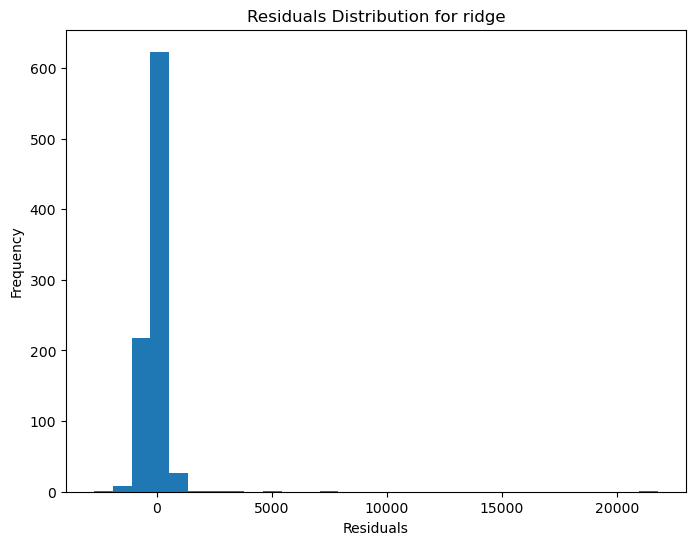

Average cross-validation score for ridge: -1009962.3197450942
RMSE for lasso: 890.2344577004129


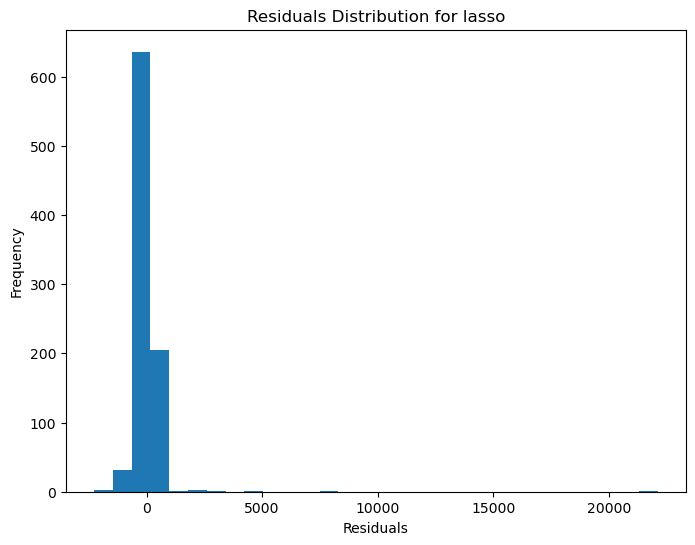

Average cross-validation score for lasso: -1011339.0956753433
RMSE for random_forest: 1203.0002344645534
Feature importance for random_forest: [4.27293118e-01 4.21074354e-01 3.82828613e-02 4.49428763e-05
 7.90301681e-08 0.00000000e+00 1.36872021e-09 3.24628800e-11
 6.52708201e-08 0.00000000e+00 2.36396228e-08 1.67200938e-10
 2.87415498e-02 4.31063717e-04 1.07255195e-05 2.12569344e-10
 2.23746406e-02 3.61927499e-03 3.00958596e-04 1.44184489e-08
 5.03951569e-10 8.89335097e-06 5.38448804e-07 2.48259515e-07
 3.34968604e-09 1.56605629e-07 2.43121679e-07 1.00627377e-06
 0.00000000e+00 1.48823620e-08 7.84119952e-10 1.23271444e-04
 5.74040018e-08 5.64432472e-11 2.39723519e-07 1.48981603e-08
 1.93588301e-09 3.68767036e-08 9.25215302e-09 1.65470817e-05
 2.09274702e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.56295270e-11 3.45740354e-07 1.30456976e-09 5.24181754e-06
 1.38136848e-07 2.68265347e-10 8.22354634e-08 5.92269814e-08
 7.08681944e-08 1.93797396e-06 1.66646593e-10 0.00000000e+00
 3.

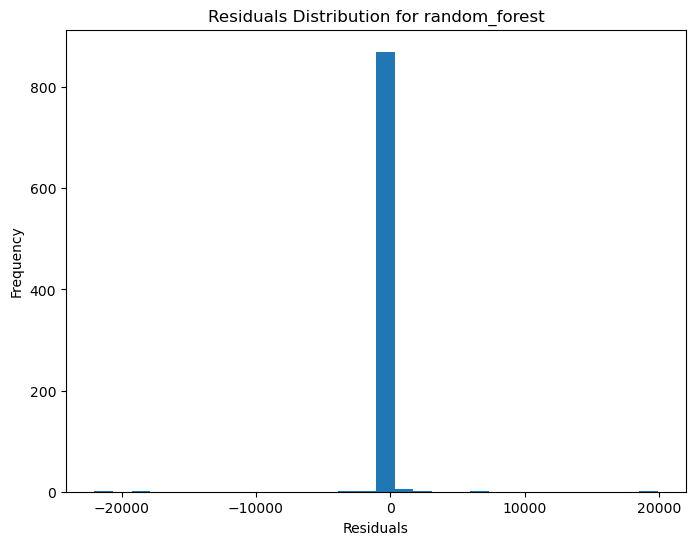

Average cross-validation score for random_forest: -542054.7740051755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 64
[LightGBM] [Info] Start training from score 104.496882
RMSE for lightgbm: 789.701177742404
Feature importance for lightgbm: [272 869 292  14   0   0   0   0   0   0   0   0 156  23   4   0 168  85
   8   0   0  10   0   0   0   0   0   0   0   0   0   5   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
   0   0   0  44   0   0   0   0   0   0   0   0   0   6   0  22   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 

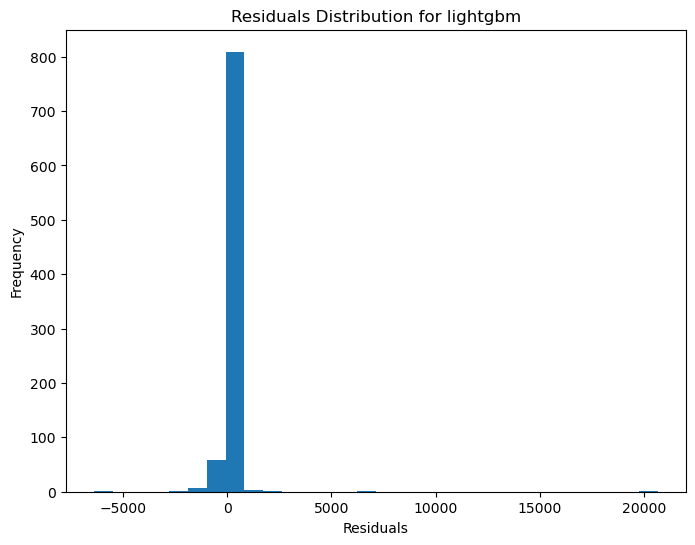

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2201
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 58
[LightGBM] [Info] Start training from score 107.041460
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 59
[LightGBM] [Info] Start training from score 103.427356
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 59
[LightGBM] [Info] Start training from score 103.427356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 59
[LightGBM] [Info] Start training from score 103.427356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 59
[LightGBM] [Info] Start training from score 103.427356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2236
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 60
[LightGBM] [Info] Start training from score 93.506908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2201
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 58
[LightGBM] [Info] Start training from score 107.041460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2181
[LightGBM] [Info] Number of data points in the train set: 2823, number of used features: 57
[LightGBM] [Info] Start training from score 112.343960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [101]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, Lasso
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Definir las columnas categóricas y numéricas para el preprocesamiento
categorical_features = ['Match Type', 'Bid Strategy', 'Status', 'Publisher Name']
numeric_features = ['Search Engine Bid', 'Impressions', 'Avg. Pos.']

# Seleccionar las características específicas para el modelo
selected_features = numeric_features + list(tfidf_vectorizer.get_feature_names_out())

# Preparar los datos para el modelado
X = df_train[selected_features]  # Selecciona solo las características específicas
y = df_train['Clicks']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)

# Modelos a entrenar
models = {
    'ridge': ridge_model,
    'lasso': lasso_model,
    'random_forest': rf_model,
    'lightgbm': lgbm_model
}

# Entrenamiento y evaluación de cada modelo por separado
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = model.predict(X_val)

    # Calcular y mostrar el RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f'RMSE for {name}: {rmse}')

    # Obtener importancia de características (solo para modelos que lo permiten)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        print(f'Feature importance for {name}: {feature_importance}')

    # Calcular residuos
    residuals = y_val - y_pred

    # Visualizar residuos (histograma)
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30)
    plt.title(f'Residuals Distribution for {name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_cv_score = np.mean(cv_scores)
    print(f'Average cross-validation score for {name}: {avg_cv_score}')

# Grid search para LightGBM
lgbm_param_grid = {
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7]
}

lgbm_pipeline = Pipeline([
    ('model', LGBMRegressor(random_state=42))
])

lgbm_grid_search = GridSearchCV(lgbm_pipeline, lgbm_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Entrenar el modelo con GridSearchCV
lgbm_grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Best parameters found for LightGBM:")
print(lgbm_grid_search.best_params_)




In [102]:
from sklearn.model_selection import cross_val_score

# Definir el modelo LightGBM con los mejores hiperparámetros
best_lgbm_model = LGBMRegressor(learning_rate=0.1, max_depth=3, n_estimators=300, random_state=42)

# Realizar validación cruzada
cv_scores = cross_val_score(best_lgbm_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el RMSE promedio
avg_rmse = np.sqrt(-cv_scores.mean())
print(f'Average RMSE for LightGBM with cross-validation: {avg_rmse}')

# Entrenar el modelo con todos los datos de entrenamiento
best_lgbm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = best_lgbm_model.predict(X_val)

# Calcular el RMSE en el conjunto de validación
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE for LightGBM on validation set: {rmse}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2201
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 58
[LightGBM] [Info] Start training from score 107.041460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2198
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 57
[LightGBM] [Info] Start training from score 106.165840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 3528, number of used features: 64
[LightGBM] [Info] Start training from score 104.496882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import catboost as cb

# Definir las características seleccionadas
selected_features = ['Search Engine Bid', 'Impressions', 'Avg. Pos.'] + list(tfidf_vectorizer.get_feature_names_out())

# Preparar los datos para el modelado
X = df_train[selected_features]
y = df_train['Clicks']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y evaluar el modelo XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
print(f'RMSE for XGBoost: {rmse_xgb}')

# Entrenar y evaluar el modelo CatBoost
cb_model = cb.CatBoostRegressor(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)
y_pred_cb = cb_model.predict(X_val)
rmse_cb = mean_squared_error(y_val, y_pred_cb, squared=False)
print(f'RMSE for CatBoost: {rmse_cb}')


C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE for XGBoost: 1204.7423339822933
RMSE for CatBoost: 822.2808856019539


C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [106]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
catboost_model = CatBoostRegressor()

# Definir la cuadrícula de parámetros a buscar
catboost_param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300]
}

# Inicializar GridSearchCV
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Entrenar el modelo con GridSearchCV
catboost_grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params_catboost = catboost_grid_search.best_params_
print("Best parameters found for CatBoost:", best_params_catboost)

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
xgb_model = XGBRegressor()

# Definir la cuadrícula de parámetros a buscar
xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Inicializar GridSearchCV
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Entrenar el modelo con GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params_xgb = xgb_grid_search.best_params_
print("Best parameters found for XGBoost:", best_params_xgb)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 968.1137266	total: 2.09ms	remaining: 207ms
1:	learn: 954.8245615	total: 4.06ms	remaining: 199ms
2:	learn: 938.3615370	total: 6.57ms	remaining: 213ms
3:	learn: 925.4267214	total: 8.6ms	remaining: 207ms
4:	learn: 912.1730131	total: 10ms	remaining: 191ms
5:	learn: 899.7212285	total: 11.9ms	remaining: 187ms
6:	learn: 886.4926619	total: 13.6ms	remaining: 180ms
7:	learn: 873.6399715	total: 15.4ms	remaining: 177ms
8:	learn: 862.1323636	total: 17ms	remaining: 172ms
9:	learn: 848.0057351	total: 18.8ms	remaining: 169ms
10:	learn: 837.5239560	total: 20.4ms	remaining: 165ms
11:	learn: 824.7611530	total: 22ms	remaining: 161ms
12:	learn: 813.1484786	total: 23.6ms	remaining: 158ms
13:	learn: 801.8210238	total: 25ms	remaining: 154ms
14:	learn: 790.8380566	total: 26.9ms	remaining: 152ms
15:	learn: 781.3583435	total: 28.2ms	remaining: 148ms
16:	learn: 768.6630864	total: 29.5ms	remaining: 144ms
17:	learn: 759.7784354	total: 30.8ms	re

54:	learn: 680.8790759	total: 54.8ms	remaining: 44.8ms
55:	learn: 675.5028474	total: 55.8ms	remaining: 43.8ms
56:	learn: 670.2267258	total: 56.8ms	remaining: 42.8ms
57:	learn: 666.1665674	total: 57.9ms	remaining: 41.9ms
58:	learn: 658.2018069	total: 58.9ms	remaining: 40.9ms
59:	learn: 655.1386722	total: 59.8ms	remaining: 39.9ms
60:	learn: 652.1145012	total: 60.8ms	remaining: 38.9ms
61:	learn: 645.8924683	total: 61.8ms	remaining: 37.9ms
62:	learn: 639.8033111	total: 62.8ms	remaining: 36.9ms
63:	learn: 634.8843739	total: 63.8ms	remaining: 35.9ms
64:	learn: 630.0943530	total: 64.8ms	remaining: 34.9ms
65:	learn: 627.1657194	total: 65.9ms	remaining: 34ms
66:	learn: 621.3665227	total: 67.1ms	remaining: 33ms
67:	learn: 615.2226758	total: 68.3ms	remaining: 32.1ms
68:	learn: 610.7268042	total: 69.3ms	remaining: 31.1ms
69:	learn: 606.3091426	total: 70.6ms	remaining: 30.3ms
70:	learn: 603.2706450	total: 71.7ms	remaining: 29.3ms
71:	learn: 598.9557767	total: 73ms	remaining: 28.4ms
72:	learn: 594.7

53:	learn: 604.5474798	total: 64.2ms	remaining: 54.7ms
54:	learn: 598.4425005	total: 65.8ms	remaining: 53.8ms
55:	learn: 593.2395320	total: 67ms	remaining: 52.6ms
56:	learn: 587.5135167	total: 68.1ms	remaining: 51.4ms
57:	learn: 580.5161728	total: 69.3ms	remaining: 50.2ms
58:	learn: 573.8213074	total: 70.4ms	remaining: 48.9ms
59:	learn: 568.4578158	total: 71.5ms	remaining: 47.7ms
60:	learn: 562.7894066	total: 72.9ms	remaining: 46.6ms
61:	learn: 555.7082198	total: 74ms	remaining: 45.4ms
62:	learn: 549.5717419	total: 75.1ms	remaining: 44.1ms
63:	learn: 545.1230263	total: 76.2ms	remaining: 42.8ms
64:	learn: 540.0601713	total: 77.5ms	remaining: 41.7ms
65:	learn: 534.6140522	total: 78.7ms	remaining: 40.5ms
66:	learn: 531.3833636	total: 79.8ms	remaining: 39.3ms
67:	learn: 527.4855283	total: 81ms	remaining: 38.1ms
68:	learn: 521.7970794	total: 82.3ms	remaining: 37ms
69:	learn: 517.0457760	total: 83.5ms	remaining: 35.8ms
70:	learn: 513.8505754	total: 84.5ms	remaining: 34.5ms
71:	learn: 509.916

34:	learn: 504.9129704	total: 51.4ms	remaining: 95.5ms
35:	learn: 498.1243229	total: 53.2ms	remaining: 94.5ms
36:	learn: 489.5246333	total: 54.5ms	remaining: 92.8ms
37:	learn: 479.3436331	total: 56ms	remaining: 91.3ms
38:	learn: 473.4946363	total: 57.8ms	remaining: 90.4ms
39:	learn: 465.3045096	total: 59.8ms	remaining: 89.7ms
40:	learn: 459.8496663	total: 61.5ms	remaining: 88.6ms
41:	learn: 450.9768044	total: 63ms	remaining: 87ms
42:	learn: 444.5134562	total: 64.4ms	remaining: 85.3ms
43:	learn: 436.2280638	total: 66.1ms	remaining: 84.1ms
44:	learn: 432.6156770	total: 67.5ms	remaining: 82.5ms
45:	learn: 425.5529485	total: 69.1ms	remaining: 81.1ms
46:	learn: 420.7189697	total: 70.7ms	remaining: 79.8ms
47:	learn: 417.4547962	total: 72.3ms	remaining: 78.3ms
48:	learn: 414.5104176	total: 74ms	remaining: 77ms
49:	learn: 411.3081759	total: 75.5ms	remaining: 75.5ms
50:	learn: 408.4688683	total: 77ms	remaining: 74ms
51:	learn: 403.9722963	total: 78.7ms	remaining: 72.7ms
52:	learn: 394.1221973	t

15:	learn: 676.5880896	total: 21.3ms	remaining: 112ms
16:	learn: 662.7119546	total: 23.1ms	remaining: 113ms
17:	learn: 649.4835033	total: 24.7ms	remaining: 113ms
18:	learn: 636.6563070	total: 26.3ms	remaining: 112ms
19:	learn: 624.0280252	total: 27.9ms	remaining: 111ms
20:	learn: 611.9780971	total: 29.1ms	remaining: 110ms
21:	learn: 606.7106603	total: 30.3ms	remaining: 107ms
22:	learn: 595.1715396	total: 31.8ms	remaining: 107ms
23:	learn: 584.0158024	total: 33ms	remaining: 105ms
24:	learn: 573.2082639	total: 34.2ms	remaining: 103ms
25:	learn: 562.6056988	total: 35.5ms	remaining: 101ms
26:	learn: 552.4697679	total: 36.9ms	remaining: 99.9ms
27:	learn: 535.4242977	total: 38ms	remaining: 97.7ms
28:	learn: 516.4244307	total: 39.8ms	remaining: 97.4ms
29:	learn: 507.1171863	total: 41.4ms	remaining: 96.6ms
30:	learn: 498.1436267	total: 42.9ms	remaining: 95.4ms
31:	learn: 483.0933973	total: 44.4ms	remaining: 94.3ms
32:	learn: 474.5872279	total: 45.6ms	remaining: 92.5ms
33:	learn: 466.3602369	to

0:	learn: 937.2687051	total: 1.41ms	remaining: 140ms
1:	learn: 899.5980289	total: 2.58ms	remaining: 126ms
2:	learn: 854.2236916	total: 3.59ms	remaining: 116ms
3:	learn: 820.8104684	total: 4.68ms	remaining: 112ms
4:	learn: 782.5314485	total: 5.73ms	remaining: 109ms
5:	learn: 753.2985582	total: 6.88ms	remaining: 108ms
6:	learn: 723.9383396	total: 11.1ms	remaining: 147ms
7:	learn: 697.1494624	total: 12.4ms	remaining: 143ms
8:	learn: 660.8130611	total: 13.5ms	remaining: 137ms
9:	learn: 627.1500942	total: 14.6ms	remaining: 131ms
10:	learn: 602.1838771	total: 15.8ms	remaining: 128ms
11:	learn: 579.2036550	total: 17.2ms	remaining: 126ms
12:	learn: 559.3800287	total: 18.1ms	remaining: 121ms
13:	learn: 542.2105176	total: 19.4ms	remaining: 119ms
14:	learn: 523.6057021	total: 20.7ms	remaining: 117ms
15:	learn: 509.3441673	total: 21.9ms	remaining: 115ms
16:	learn: 489.6396590	total: 23ms	remaining: 112ms
17:	learn: 480.8705960	total: 24.1ms	remaining: 110ms
18:	learn: 463.6839796	total: 25.2ms	rem

7:	learn: 874.8277070	total: 14.1ms	remaining: 162ms
8:	learn: 850.3391381	total: 15.7ms	remaining: 159ms
9:	learn: 821.4600131	total: 17.3ms	remaining: 155ms
10:	learn: 807.2469469	total: 18.7ms	remaining: 151ms
11:	learn: 785.7858969	total: 20.5ms	remaining: 150ms
12:	learn: 765.3855034	total: 22.2ms	remaining: 148ms
13:	learn: 745.9686777	total: 24.1ms	remaining: 148ms
14:	learn: 734.9729761	total: 25.7ms	remaining: 146ms
15:	learn: 717.1264411	total: 27.4ms	remaining: 144ms
16:	learn: 700.1909253	total: 29.5ms	remaining: 144ms
17:	learn: 682.7356159	total: 31.4ms	remaining: 143ms
18:	learn: 656.5444949	total: 33.1ms	remaining: 141ms
19:	learn: 640.7377424	total: 34.6ms	remaining: 139ms
20:	learn: 625.4653000	total: 36.3ms	remaining: 137ms
21:	learn: 616.6881821	total: 37.9ms	remaining: 134ms
22:	learn: 596.8444288	total: 39.4ms	remaining: 132ms
23:	learn: 584.3335845	total: 41ms	remaining: 130ms
24:	learn: 566.2329535	total: 42.4ms	remaining: 127ms
25:	learn: 554.9645940	total: 43.

6:	learn: 877.0319477	total: 8.31ms	remaining: 110ms
7:	learn: 840.9235628	total: 9.43ms	remaining: 108ms
8:	learn: 811.8783492	total: 10.6ms	remaining: 107ms
9:	learn: 785.2266854	total: 11.5ms	remaining: 104ms
10:	learn: 753.0832849	total: 12.7ms	remaining: 103ms
11:	learn: 729.1526039	total: 13.6ms	remaining: 99.6ms
12:	learn: 697.7419476	total: 14.5ms	remaining: 96.9ms
13:	learn: 677.2510945	total: 15.6ms	remaining: 96ms
14:	learn: 646.2443482	total: 16.8ms	remaining: 95.1ms
15:	learn: 632.8996949	total: 18.2ms	remaining: 95.7ms
16:	learn: 612.9529644	total: 19.3ms	remaining: 94.3ms
17:	learn: 595.5871773	total: 20.4ms	remaining: 92.9ms
18:	learn: 577.6561505	total: 21.6ms	remaining: 92.2ms
19:	learn: 561.1215147	total: 23ms	remaining: 91.8ms
20:	learn: 541.3230193	total: 24.2ms	remaining: 91.1ms
21:	learn: 525.3415108	total: 25.3ms	remaining: 89.8ms
22:	learn: 509.2994306	total: 26.4ms	remaining: 88.4ms
23:	learn: 498.5986194	total: 27.4ms	remaining: 86.9ms
24:	learn: 483.3056806	

154:	learn: 265.3309477	total: 204ms	remaining: 59.3ms
155:	learn: 263.8073250	total: 206ms	remaining: 58ms
156:	learn: 262.4584910	total: 207ms	remaining: 56.6ms
157:	learn: 262.0101971	total: 208ms	remaining: 55.3ms
158:	learn: 260.0631819	total: 209ms	remaining: 54ms
159:	learn: 257.9881610	total: 211ms	remaining: 52.7ms
160:	learn: 256.8708133	total: 212ms	remaining: 51.3ms
161:	learn: 255.7728000	total: 213ms	remaining: 50ms
162:	learn: 254.6859696	total: 214ms	remaining: 48.7ms
163:	learn: 252.9997135	total: 216ms	remaining: 47.5ms
164:	learn: 251.9547162	total: 218ms	remaining: 46.2ms
165:	learn: 251.1348320	total: 219ms	remaining: 44.9ms
166:	learn: 250.0001189	total: 221ms	remaining: 43.6ms
167:	learn: 248.8938932	total: 222ms	remaining: 42.3ms
168:	learn: 248.4832471	total: 224ms	remaining: 41ms
169:	learn: 246.9564861	total: 225ms	remaining: 39.8ms
170:	learn: 245.1242544	total: 227ms	remaining: 38.5ms
171:	learn: 243.6478394	total: 229ms	remaining: 37.2ms
172:	learn: 243.25

0:	learn: 1114.2743568	total: 1.29ms	remaining: 257ms
1:	learn: 1103.4769944	total: 2.76ms	remaining: 273ms
2:	learn: 1093.0794723	total: 4.39ms	remaining: 288ms
3:	learn: 1080.5755743	total: 5.77ms	remaining: 283ms
4:	learn: 1067.0057961	total: 7.42ms	remaining: 290ms
5:	learn: 1050.9352828	total: 8.65ms	remaining: 280ms
6:	learn: 1041.6762254	total: 9.96ms	remaining: 274ms
7:	learn: 1026.1531524	total: 11.9ms	remaining: 286ms
8:	learn: 1015.8530278	total: 13.2ms	remaining: 281ms
9:	learn: 1007.2452424	total: 14.5ms	remaining: 276ms
10:	learn: 998.8998887	total: 15.8ms	remaining: 272ms
11:	learn: 989.0929511	total: 17.3ms	remaining: 272ms
12:	learn: 978.6565657	total: 18.5ms	remaining: 266ms
13:	learn: 969.0837001	total: 19.9ms	remaining: 265ms
14:	learn: 961.4708706	total: 21.5ms	remaining: 265ms
15:	learn: 952.6540414	total: 22.7ms	remaining: 261ms
16:	learn: 943.8494302	total: 23.8ms	remaining: 257ms
17:	learn: 936.9227683	total: 25ms	remaining: 253ms
18:	learn: 927.9935091	total: 

168:	learn: 343.5532270	total: 207ms	remaining: 38ms
169:	learn: 342.3648006	total: 209ms	remaining: 36.9ms
170:	learn: 341.2596006	total: 210ms	remaining: 35.7ms
171:	learn: 339.3824158	total: 212ms	remaining: 34.5ms
172:	learn: 338.2411931	total: 213ms	remaining: 33.3ms
173:	learn: 336.3648053	total: 214ms	remaining: 32ms
174:	learn: 335.2464250	total: 216ms	remaining: 30.8ms
175:	learn: 334.1497095	total: 217ms	remaining: 29.6ms
176:	learn: 333.0797244	total: 218ms	remaining: 28.3ms
177:	learn: 331.6979406	total: 219ms	remaining: 27.1ms
178:	learn: 330.6709944	total: 221ms	remaining: 25.9ms
179:	learn: 328.6487024	total: 222ms	remaining: 24.6ms
180:	learn: 327.5395575	total: 223ms	remaining: 23.4ms
181:	learn: 326.4467805	total: 224ms	remaining: 22.2ms
182:	learn: 325.2489398	total: 225ms	remaining: 20.9ms
183:	learn: 323.7559929	total: 227ms	remaining: 19.7ms
184:	learn: 322.7801495	total: 228ms	remaining: 18.5ms
185:	learn: 320.6881449	total: 229ms	remaining: 17.3ms
186:	learn: 31

177:	learn: 234.2653833	total: 257ms	remaining: 31.8ms
178:	learn: 232.5005202	total: 259ms	remaining: 30.4ms
179:	learn: 230.7864237	total: 260ms	remaining: 28.9ms
180:	learn: 229.8408561	total: 261ms	remaining: 27.4ms
181:	learn: 229.0902837	total: 263ms	remaining: 26ms
182:	learn: 228.1629533	total: 264ms	remaining: 24.5ms
183:	learn: 226.5228732	total: 265ms	remaining: 23.1ms
184:	learn: 225.7409754	total: 266ms	remaining: 21.6ms
185:	learn: 224.4701250	total: 268ms	remaining: 20.2ms
186:	learn: 223.7204378	total: 269ms	remaining: 18.7ms
187:	learn: 223.1418333	total: 270ms	remaining: 17.3ms
188:	learn: 222.4861612	total: 272ms	remaining: 15.8ms
189:	learn: 221.2788771	total: 273ms	remaining: 14.4ms
190:	learn: 219.7562063	total: 274ms	remaining: 12.9ms
191:	learn: 218.2771374	total: 276ms	remaining: 11.5ms
192:	learn: 217.1203750	total: 277ms	remaining: 10ms
193:	learn: 215.9879638	total: 278ms	remaining: 8.6ms
194:	learn: 214.8794706	total: 279ms	remaining: 7.17ms
195:	learn: 213

0:	learn: 952.6402754	total: 1.65ms	remaining: 329ms
1:	learn: 926.7930669	total: 3.41ms	remaining: 338ms
2:	learn: 895.2160697	total: 4.95ms	remaining: 325ms
3:	learn: 871.1815256	total: 6.36ms	remaining: 312ms
4:	learn: 847.0413321	total: 7.62ms	remaining: 297ms
5:	learn: 825.0314927	total: 8.96ms	remaining: 290ms
6:	learn: 802.0283514	total: 10.4ms	remaining: 288ms
7:	learn: 780.3410260	total: 11.8ms	remaining: 283ms
8:	learn: 761.5908162	total: 13.2ms	remaining: 281ms
9:	learn: 734.4599207	total: 14.4ms	remaining: 274ms
10:	learn: 712.4669313	total: 15.8ms	remaining: 271ms
11:	learn: 692.2491558	total: 17.3ms	remaining: 271ms
12:	learn: 674.9036229	total: 18.6ms	remaining: 268ms
13:	learn: 654.2729360	total: 19.9ms	remaining: 265ms
14:	learn: 638.3702495	total: 21.1ms	remaining: 260ms
15:	learn: 624.5206450	total: 22.9ms	remaining: 264ms
16:	learn: 605.7618072	total: 24.2ms	remaining: 261ms
17:	learn: 590.4616993	total: 25.8ms	remaining: 261ms
18:	learn: 574.3348392	total: 27.2ms	r

41:	learn: 450.9768044	total: 62.8ms	remaining: 236ms
42:	learn: 444.5134562	total: 64.6ms	remaining: 236ms
43:	learn: 436.2280638	total: 66ms	remaining: 234ms
44:	learn: 432.6156770	total: 67.5ms	remaining: 232ms
45:	learn: 425.5529485	total: 68.9ms	remaining: 231ms
46:	learn: 420.7189697	total: 70.5ms	remaining: 230ms
47:	learn: 417.4547962	total: 71.9ms	remaining: 228ms
48:	learn: 414.5104176	total: 73.7ms	remaining: 227ms
49:	learn: 411.3081759	total: 75ms	remaining: 225ms
50:	learn: 408.4688683	total: 76.4ms	remaining: 223ms
51:	learn: 403.9722963	total: 77.6ms	remaining: 221ms
52:	learn: 394.1221973	total: 79.2ms	remaining: 220ms
53:	learn: 391.5766434	total: 80.8ms	remaining: 218ms
54:	learn: 387.3786727	total: 82.2ms	remaining: 217ms
55:	learn: 384.8170848	total: 83.5ms	remaining: 215ms
56:	learn: 378.3608858	total: 84.8ms	remaining: 213ms
57:	learn: 374.4996626	total: 86.5ms	remaining: 212ms
58:	learn: 370.7955634	total: 87.8ms	remaining: 210ms
59:	learn: 367.7465615	total: 89

93:	learn: 315.4961900	total: 102ms	remaining: 115ms
94:	learn: 313.2292713	total: 103ms	remaining: 114ms
95:	learn: 311.0619694	total: 105ms	remaining: 113ms
96:	learn: 308.6291590	total: 106ms	remaining: 112ms
97:	learn: 305.6835839	total: 107ms	remaining: 111ms
98:	learn: 303.5073778	total: 108ms	remaining: 110ms
99:	learn: 301.0706437	total: 109ms	remaining: 109ms
100:	learn: 299.1300073	total: 110ms	remaining: 108ms
101:	learn: 296.8846336	total: 111ms	remaining: 107ms
102:	learn: 294.8220006	total: 112ms	remaining: 106ms
103:	learn: 292.1456367	total: 113ms	remaining: 104ms
104:	learn: 290.3581906	total: 114ms	remaining: 103ms
105:	learn: 287.9713424	total: 115ms	remaining: 102ms
106:	learn: 285.5540444	total: 116ms	remaining: 101ms
107:	learn: 283.5071865	total: 117ms	remaining: 99.9ms
108:	learn: 281.8502962	total: 119ms	remaining: 99ms
109:	learn: 279.8434484	total: 120ms	remaining: 97.8ms
110:	learn: 277.8484355	total: 121ms	remaining: 96.7ms
111:	learn: 275.7004283	total: 12

194:	learn: 117.2317854	total: 220ms	remaining: 5.63ms
195:	learn: 116.8786506	total: 221ms	remaining: 4.51ms
196:	learn: 116.4066891	total: 222ms	remaining: 3.39ms
197:	learn: 116.3601194	total: 223ms	remaining: 2.26ms
198:	learn: 116.1565268	total: 225ms	remaining: 1.13ms
199:	learn: 115.6286610	total: 226ms	remaining: 0us
0:	learn: 1127.5346739	total: 1.42ms	remaining: 282ms
1:	learn: 1096.3616160	total: 2.66ms	remaining: 263ms
2:	learn: 1066.5423693	total: 3.96ms	remaining: 260ms
3:	learn: 1035.2626509	total: 5.27ms	remaining: 258ms
4:	learn: 1007.5677269	total: 6.44ms	remaining: 251ms
5:	learn: 980.8791665	total: 7.71ms	remaining: 249ms
6:	learn: 955.9298607	total: 8.82ms	remaining: 243ms
7:	learn: 931.6564101	total: 9.96ms	remaining: 239ms
8:	learn: 908.4950177	total: 11.1ms	remaining: 236ms
9:	learn: 882.8562378	total: 12.3ms	remaining: 234ms
10:	learn: 854.4163339	total: 13.4ms	remaining: 231ms
11:	learn: 834.5599449	total: 14.8ms	remaining: 231ms
12:	learn: 815.2882565	total: 

23:	learn: 408.9575487	total: 28.7ms	remaining: 210ms
24:	learn: 400.9386514	total: 29.7ms	remaining: 208ms
25:	learn: 392.3624110	total: 30.8ms	remaining: 206ms
26:	learn: 382.9065777	total: 31.9ms	remaining: 204ms
27:	learn: 373.8638023	total: 33.1ms	remaining: 203ms
28:	learn: 367.1893492	total: 34ms	remaining: 200ms
29:	learn: 354.8291127	total: 34.9ms	remaining: 198ms
30:	learn: 349.4339505	total: 35.8ms	remaining: 195ms
31:	learn: 344.1052861	total: 36.9ms	remaining: 194ms
32:	learn: 340.1748106	total: 38.1ms	remaining: 193ms
33:	learn: 335.4542817	total: 39.3ms	remaining: 192ms
34:	learn: 331.1046079	total: 40.4ms	remaining: 191ms
35:	learn: 325.1159577	total: 41.6ms	remaining: 190ms
36:	learn: 321.1923523	total: 42.8ms	remaining: 189ms
37:	learn: 317.6482949	total: 43.9ms	remaining: 187ms
38:	learn: 310.2660974	total: 45.1ms	remaining: 186ms
39:	learn: 304.2397825	total: 46.1ms	remaining: 184ms
40:	learn: 298.0621357	total: 47.3ms	remaining: 183ms
41:	learn: 292.4144198	total: 

196:	learn: 107.9839583	total: 221ms	remaining: 3.36ms
197:	learn: 107.6146027	total: 222ms	remaining: 2.24ms
198:	learn: 107.2329761	total: 223ms	remaining: 1.12ms
199:	learn: 107.1907355	total: 224ms	remaining: 0us
0:	learn: 983.3690657	total: 1.53ms	remaining: 305ms
1:	learn: 954.8083335	total: 2.77ms	remaining: 275ms
2:	learn: 907.6386977	total: 3.95ms	remaining: 259ms
3:	learn: 881.5543061	total: 4.9ms	remaining: 240ms
4:	learn: 857.0510025	total: 6.23ms	remaining: 243ms
5:	learn: 833.7360822	total: 7.61ms	remaining: 246ms
6:	learn: 811.5521188	total: 8.93ms	remaining: 246ms
7:	learn: 790.1881309	total: 10.4ms	remaining: 250ms
8:	learn: 770.1393633	total: 11.6ms	remaining: 246ms
9:	learn: 751.0878732	total: 12.8ms	remaining: 243ms
10:	learn: 724.5829946	total: 13.9ms	remaining: 239ms
11:	learn: 694.0916753	total: 15.4ms	remaining: 242ms
12:	learn: 677.7243373	total: 16.5ms	remaining: 238ms
13:	learn: 662.1981544	total: 17.9ms	remaining: 237ms
14:	learn: 637.6709909	total: 19.3ms	r

8:	learn: 850.3391381	total: 12.3ms	remaining: 261ms
9:	learn: 821.4600131	total: 13.5ms	remaining: 256ms
10:	learn: 807.2469469	total: 14.7ms	remaining: 252ms
11:	learn: 785.7858969	total: 16ms	remaining: 251ms
12:	learn: 765.3855034	total: 17.3ms	remaining: 249ms
13:	learn: 745.9686777	total: 18.7ms	remaining: 249ms
14:	learn: 734.9729761	total: 20.3ms	remaining: 250ms
15:	learn: 717.1264411	total: 21.6ms	remaining: 248ms
16:	learn: 700.1909253	total: 22.8ms	remaining: 245ms
17:	learn: 682.7356159	total: 24.1ms	remaining: 244ms
18:	learn: 656.5444949	total: 25.4ms	remaining: 242ms
19:	learn: 640.7377424	total: 26.5ms	remaining: 239ms
20:	learn: 625.4653000	total: 27.7ms	remaining: 236ms
21:	learn: 616.6881821	total: 29ms	remaining: 234ms
22:	learn: 596.8444288	total: 30.3ms	remaining: 233ms
23:	learn: 584.3335845	total: 31.4ms	remaining: 230ms
24:	learn: 566.2329535	total: 33ms	remaining: 231ms
25:	learn: 554.9645940	total: 34.4ms	remaining: 230ms
26:	learn: 543.7535185	total: 35.6ms

176:	learn: 131.3373038	total: 209ms	remaining: 27.1ms
177:	learn: 130.7755499	total: 210ms	remaining: 25.9ms
178:	learn: 129.9427828	total: 211ms	remaining: 24.7ms
179:	learn: 129.5799224	total: 212ms	remaining: 23.6ms
180:	learn: 129.2908087	total: 213ms	remaining: 22.4ms
181:	learn: 129.0742146	total: 214ms	remaining: 21.2ms
182:	learn: 128.4702851	total: 216ms	remaining: 20ms
183:	learn: 127.7572106	total: 217ms	remaining: 18.9ms
184:	learn: 127.1460612	total: 218ms	remaining: 17.7ms
185:	learn: 126.4445070	total: 220ms	remaining: 16.5ms
186:	learn: 126.3388838	total: 221ms	remaining: 15.3ms
187:	learn: 126.2427543	total: 222ms	remaining: 14.2ms
188:	learn: 126.0471100	total: 223ms	remaining: 13ms
189:	learn: 125.5058291	total: 224ms	remaining: 11.8ms
190:	learn: 125.1086998	total: 225ms	remaining: 10.6ms
191:	learn: 124.4519804	total: 226ms	remaining: 9.43ms
192:	learn: 123.6988536	total: 228ms	remaining: 8.25ms
193:	learn: 123.0815276	total: 229ms	remaining: 7.07ms
194:	learn: 12

44:	learn: 330.1809930	total: 47.1ms	remaining: 162ms
45:	learn: 323.2900829	total: 48.1ms	remaining: 161ms
46:	learn: 319.0330880	total: 49ms	remaining: 160ms
47:	learn: 312.0179267	total: 50.2ms	remaining: 159ms
48:	learn: 306.8144997	total: 51.2ms	remaining: 158ms
49:	learn: 304.6339661	total: 52.2ms	remaining: 157ms
50:	learn: 299.6669220	total: 53.4ms	remaining: 156ms
51:	learn: 294.9949184	total: 54.5ms	remaining: 155ms
52:	learn: 291.1186874	total: 55.6ms	remaining: 154ms
53:	learn: 287.8372940	total: 56.7ms	remaining: 153ms
54:	learn: 285.2117290	total: 57.7ms	remaining: 152ms
55:	learn: 281.0315108	total: 58.8ms	remaining: 151ms
56:	learn: 278.7435130	total: 59.7ms	remaining: 150ms
57:	learn: 275.0241357	total: 60.8ms	remaining: 149ms
58:	learn: 271.0178016	total: 61.9ms	remaining: 148ms
59:	learn: 267.3347982	total: 62.8ms	remaining: 147ms
60:	learn: 263.8522405	total: 63.9ms	remaining: 146ms
61:	learn: 260.5355212	total: 64.8ms	remaining: 144ms
62:	learn: 257.4295204	total: 

0:	learn: 968.1137266	total: 1.7ms	remaining: 507ms
1:	learn: 954.8245615	total: 3.88ms	remaining: 578ms
2:	learn: 938.3615370	total: 5.25ms	remaining: 520ms
3:	learn: 925.4267214	total: 6.81ms	remaining: 504ms
4:	learn: 912.1730131	total: 8.1ms	remaining: 478ms
5:	learn: 899.7212285	total: 9.36ms	remaining: 459ms
6:	learn: 886.4926619	total: 10.6ms	remaining: 444ms
7:	learn: 873.6399715	total: 11.9ms	remaining: 436ms
8:	learn: 862.1323636	total: 13.2ms	remaining: 425ms
9:	learn: 848.0057351	total: 14.5ms	remaining: 422ms
10:	learn: 837.5239560	total: 15.8ms	remaining: 415ms
11:	learn: 824.7611530	total: 17.3ms	remaining: 416ms
12:	learn: 813.1484786	total: 18.9ms	remaining: 417ms
13:	learn: 801.8210238	total: 30.3ms	remaining: 619ms
14:	learn: 790.8380566	total: 31.8ms	remaining: 604ms
15:	learn: 781.3583435	total: 33ms	remaining: 585ms
16:	learn: 768.6630864	total: 34.4ms	remaining: 572ms
17:	learn: 759.7784354	total: 36.2ms	remaining: 566ms
18:	learn: 747.6208047	total: 38ms	remaini

288:	learn: 181.9029093	total: 390ms	remaining: 14.8ms
289:	learn: 181.5134256	total: 391ms	remaining: 13.5ms
290:	learn: 181.3811867	total: 392ms	remaining: 12.1ms
291:	learn: 180.9591545	total: 394ms	remaining: 10.8ms
292:	learn: 180.8296927	total: 395ms	remaining: 9.43ms
293:	learn: 180.4550088	total: 396ms	remaining: 8.09ms
294:	learn: 180.3152138	total: 398ms	remaining: 6.74ms
295:	learn: 179.6122352	total: 399ms	remaining: 5.39ms
296:	learn: 179.2451678	total: 400ms	remaining: 4.04ms
297:	learn: 179.1278871	total: 402ms	remaining: 2.69ms
298:	learn: 178.7703349	total: 403ms	remaining: 1.35ms
299:	learn: 178.6445949	total: 404ms	remaining: 0us
0:	learn: 1006.4058782	total: 1.17ms	remaining: 349ms
1:	learn: 996.4946739	total: 2.44ms	remaining: 363ms
2:	learn: 986.5746795	total: 3.41ms	remaining: 337ms
3:	learn: 976.9715212	total: 4.57ms	remaining: 338ms
4:	learn: 967.5198906	total: 5.71ms	remaining: 337ms
5:	learn: 958.2208240	total: 6.68ms	remaining: 328ms
6:	learn: 949.0677709	to

286:	learn: 184.1269875	total: 332ms	remaining: 15.1ms
287:	learn: 183.7941497	total: 334ms	remaining: 13.9ms
288:	learn: 183.4845282	total: 335ms	remaining: 12.8ms
289:	learn: 183.1821968	total: 337ms	remaining: 11.6ms
290:	learn: 182.7345215	total: 338ms	remaining: 10.4ms
291:	learn: 182.3154185	total: 339ms	remaining: 9.29ms
292:	learn: 181.8880868	total: 340ms	remaining: 8.13ms
293:	learn: 181.4710840	total: 342ms	remaining: 6.98ms
294:	learn: 180.7193620	total: 343ms	remaining: 5.82ms
295:	learn: 179.7924312	total: 345ms	remaining: 4.66ms
296:	learn: 179.5183615	total: 346ms	remaining: 3.5ms
297:	learn: 179.1174034	total: 347ms	remaining: 2.33ms
298:	learn: 178.3901193	total: 349ms	remaining: 1.17ms
299:	learn: 177.6551559	total: 350ms	remaining: 0us
0:	learn: 1114.2743568	total: 1.52ms	remaining: 453ms
1:	learn: 1103.4769944	total: 3ms	remaining: 446ms
2:	learn: 1093.0794723	total: 4.28ms	remaining: 423ms
3:	learn: 1080.5755743	total: 5.58ms	remaining: 413ms
4:	learn: 1067.005796

259:	learn: 245.5841339	total: 308ms	remaining: 47.4ms
260:	learn: 245.0102987	total: 310ms	remaining: 46.3ms
261:	learn: 244.4623365	total: 311ms	remaining: 45.1ms
262:	learn: 243.7887906	total: 312ms	remaining: 43.9ms
263:	learn: 243.1503536	total: 313ms	remaining: 42.7ms
264:	learn: 242.3848951	total: 314ms	remaining: 41.5ms
265:	learn: 241.4536869	total: 316ms	remaining: 40.3ms
266:	learn: 240.9253850	total: 317ms	remaining: 39.1ms
267:	learn: 240.0133769	total: 318ms	remaining: 38ms
268:	learn: 239.2480268	total: 319ms	remaining: 36.8ms
269:	learn: 238.7229723	total: 320ms	remaining: 35.6ms
270:	learn: 237.8107188	total: 322ms	remaining: 34.4ms
271:	learn: 237.1890635	total: 323ms	remaining: 33.2ms
272:	learn: 236.2958718	total: 324ms	remaining: 32ms
273:	learn: 235.8075398	total: 325ms	remaining: 30.9ms
274:	learn: 234.6924569	total: 327ms	remaining: 29.7ms
275:	learn: 233.6426193	total: 328ms	remaining: 28.5ms
276:	learn: 232.9504713	total: 329ms	remaining: 27.3ms
277:	learn: 23

253:	learn: 164.9592740	total: 290ms	remaining: 52.5ms
254:	learn: 164.0588182	total: 291ms	remaining: 51.4ms
255:	learn: 163.3838187	total: 292ms	remaining: 50.2ms
256:	learn: 163.1590339	total: 294ms	remaining: 49.1ms
257:	learn: 162.3160861	total: 295ms	remaining: 48ms
258:	learn: 161.6565266	total: 296ms	remaining: 46.8ms
259:	learn: 160.8744798	total: 297ms	remaining: 45.7ms
260:	learn: 160.2296656	total: 298ms	remaining: 44.6ms
261:	learn: 159.4841574	total: 300ms	remaining: 43.4ms
262:	learn: 158.8549620	total: 301ms	remaining: 42.3ms
263:	learn: 158.2599572	total: 302ms	remaining: 41.2ms
264:	learn: 157.1220580	total: 303ms	remaining: 40ms
265:	learn: 156.9078282	total: 304ms	remaining: 38.9ms
266:	learn: 155.8399939	total: 305ms	remaining: 37.8ms
267:	learn: 155.3932716	total: 307ms	remaining: 36.6ms
268:	learn: 155.1895540	total: 308ms	remaining: 35.5ms
269:	learn: 154.6765619	total: 309ms	remaining: 34.3ms
270:	learn: 154.4819598	total: 310ms	remaining: 33.2ms
271:	learn: 15

205:	learn: 256.3075097	total: 273ms	remaining: 125ms
206:	learn: 255.2661549	total: 275ms	remaining: 123ms
207:	learn: 254.3486507	total: 276ms	remaining: 122ms
208:	learn: 253.4182584	total: 277ms	remaining: 121ms
209:	learn: 252.5167438	total: 278ms	remaining: 119ms
210:	learn: 250.9764568	total: 280ms	remaining: 118ms
211:	learn: 250.0893941	total: 281ms	remaining: 117ms
212:	learn: 249.2227898	total: 282ms	remaining: 115ms
213:	learn: 248.3744772	total: 284ms	remaining: 114ms
214:	learn: 246.6801898	total: 285ms	remaining: 113ms
215:	learn: 245.8434732	total: 286ms	remaining: 111ms
216:	learn: 244.7231403	total: 287ms	remaining: 110ms
217:	learn: 244.0634417	total: 289ms	remaining: 109ms
218:	learn: 243.2096587	total: 290ms	remaining: 107ms
219:	learn: 242.3847708	total: 291ms	remaining: 106ms
220:	learn: 241.4766764	total: 292ms	remaining: 104ms
221:	learn: 240.5901973	total: 293ms	remaining: 103ms
222:	learn: 239.8185275	total: 295ms	remaining: 102ms
223:	learn: 238.9710711	tota

173:	learn: 159.1526125	total: 209ms	remaining: 151ms
174:	learn: 158.6425620	total: 210ms	remaining: 150ms
175:	learn: 158.3212765	total: 212ms	remaining: 149ms
176:	learn: 158.1488317	total: 213ms	remaining: 148ms
177:	learn: 156.6771727	total: 214ms	remaining: 147ms
178:	learn: 156.5127817	total: 215ms	remaining: 145ms
179:	learn: 156.4351858	total: 217ms	remaining: 144ms
180:	learn: 156.1273451	total: 218ms	remaining: 143ms
181:	learn: 155.1078576	total: 219ms	remaining: 142ms
182:	learn: 154.6720509	total: 220ms	remaining: 141ms
183:	learn: 154.5324216	total: 222ms	remaining: 140ms
184:	learn: 154.2448713	total: 223ms	remaining: 139ms
185:	learn: 152.8409570	total: 224ms	remaining: 137ms
186:	learn: 152.7061946	total: 226ms	remaining: 136ms
187:	learn: 151.9289633	total: 227ms	remaining: 135ms
188:	learn: 151.0068076	total: 228ms	remaining: 134ms
189:	learn: 150.6193897	total: 229ms	remaining: 133ms
190:	learn: 150.4920199	total: 231ms	remaining: 132ms
191:	learn: 150.2312014	tota

166:	learn: 160.2246302	total: 208ms	remaining: 166ms
167:	learn: 159.4621460	total: 209ms	remaining: 165ms
168:	learn: 158.6548596	total: 211ms	remaining: 163ms
169:	learn: 157.4865442	total: 212ms	remaining: 162ms
170:	learn: 157.0803391	total: 213ms	remaining: 161ms
171:	learn: 155.9750708	total: 215ms	remaining: 160ms
172:	learn: 155.6035685	total: 216ms	remaining: 158ms
173:	learn: 155.2498596	total: 217ms	remaining: 157ms
174:	learn: 154.2052937	total: 219ms	remaining: 156ms
175:	learn: 153.2823123	total: 220ms	remaining: 155ms
176:	learn: 152.7778250	total: 221ms	remaining: 154ms
177:	learn: 152.4303516	total: 222ms	remaining: 152ms
178:	learn: 151.3214193	total: 224ms	remaining: 151ms
179:	learn: 150.4499048	total: 225ms	remaining: 150ms
180:	learn: 149.4729080	total: 227ms	remaining: 149ms
181:	learn: 148.9981453	total: 228ms	remaining: 148ms
182:	learn: 148.2964525	total: 229ms	remaining: 147ms
183:	learn: 147.8490980	total: 231ms	remaining: 146ms
184:	learn: 147.2379922	tota

179:	learn: 187.3462590	total: 207ms	remaining: 138ms
180:	learn: 186.7988290	total: 208ms	remaining: 137ms
181:	learn: 184.2462876	total: 209ms	remaining: 136ms
182:	learn: 183.3313622	total: 210ms	remaining: 134ms
183:	learn: 182.5533177	total: 211ms	remaining: 133ms
184:	learn: 181.6280686	total: 212ms	remaining: 132ms
185:	learn: 180.4128030	total: 214ms	remaining: 131ms
186:	learn: 179.5440972	total: 215ms	remaining: 130ms
187:	learn: 178.0178206	total: 216ms	remaining: 129ms
188:	learn: 177.1956953	total: 217ms	remaining: 128ms
189:	learn: 176.0764635	total: 218ms	remaining: 126ms
190:	learn: 175.4390276	total: 219ms	remaining: 125ms
191:	learn: 174.9590688	total: 220ms	remaining: 124ms
192:	learn: 174.0596140	total: 221ms	remaining: 123ms
193:	learn: 173.4146280	total: 223ms	remaining: 122ms
194:	learn: 171.8125491	total: 224ms	remaining: 120ms
195:	learn: 170.8195235	total: 225ms	remaining: 119ms
196:	learn: 169.7020329	total: 226ms	remaining: 118ms
197:	learn: 168.5630296	tota

144:	learn: 139.3680319	total: 207ms	remaining: 221ms
145:	learn: 139.0626004	total: 208ms	remaining: 219ms
146:	learn: 138.1154603	total: 209ms	remaining: 217ms
147:	learn: 137.3920223	total: 210ms	remaining: 216ms
148:	learn: 136.6322776	total: 211ms	remaining: 214ms
149:	learn: 135.8695946	total: 212ms	remaining: 212ms
150:	learn: 135.6700035	total: 214ms	remaining: 211ms
151:	learn: 135.3826211	total: 215ms	remaining: 209ms
152:	learn: 134.7263562	total: 216ms	remaining: 207ms
153:	learn: 133.9234542	total: 217ms	remaining: 206ms
154:	learn: 133.2527213	total: 219ms	remaining: 204ms
155:	learn: 132.4636673	total: 220ms	remaining: 203ms
156:	learn: 131.7673632	total: 222ms	remaining: 202ms
157:	learn: 131.1345704	total: 223ms	remaining: 201ms
158:	learn: 130.5150361	total: 225ms	remaining: 199ms
159:	learn: 129.4133687	total: 226ms	remaining: 198ms
160:	learn: 128.8201733	total: 228ms	remaining: 197ms
161:	learn: 128.1104971	total: 231ms	remaining: 196ms
162:	learn: 127.6524442	tota

120:	learn: 219.3937829	total: 127ms	remaining: 188ms
121:	learn: 218.3316890	total: 128ms	remaining: 187ms
122:	learn: 216.7627351	total: 129ms	remaining: 186ms
123:	learn: 215.7579576	total: 130ms	remaining: 185ms
124:	learn: 214.5853973	total: 132ms	remaining: 184ms
125:	learn: 213.6083678	total: 133ms	remaining: 183ms
126:	learn: 210.7526625	total: 134ms	remaining: 182ms
127:	learn: 209.8698407	total: 135ms	remaining: 181ms
128:	learn: 209.0259097	total: 136ms	remaining: 180ms
129:	learn: 208.1206016	total: 137ms	remaining: 179ms
130:	learn: 206.4474230	total: 138ms	remaining: 178ms
131:	learn: 205.6301624	total: 139ms	remaining: 177ms
132:	learn: 204.8113593	total: 140ms	remaining: 176ms
133:	learn: 204.0626500	total: 141ms	remaining: 174ms
134:	learn: 203.0420311	total: 142ms	remaining: 173ms
135:	learn: 201.5159980	total: 143ms	remaining: 172ms
136:	learn: 200.5813071	total: 144ms	remaining: 171ms
137:	learn: 199.8851534	total: 145ms	remaining: 170ms
138:	learn: 199.1511684	tota

0:	learn: 937.2687051	total: 1.46ms	remaining: 437ms
1:	learn: 899.5980289	total: 2.81ms	remaining: 419ms
2:	learn: 854.2236916	total: 4.02ms	remaining: 398ms
3:	learn: 820.8104684	total: 5.19ms	remaining: 384ms
4:	learn: 782.5314485	total: 6.26ms	remaining: 369ms
5:	learn: 753.2985582	total: 7.54ms	remaining: 369ms
6:	learn: 723.9383396	total: 8.66ms	remaining: 362ms
7:	learn: 697.1494624	total: 9.92ms	remaining: 362ms
8:	learn: 660.8130611	total: 11.1ms	remaining: 358ms
9:	learn: 627.1500942	total: 12.2ms	remaining: 354ms
10:	learn: 602.1838771	total: 13.4ms	remaining: 351ms
11:	learn: 579.2036550	total: 14.7ms	remaining: 354ms
12:	learn: 559.3800287	total: 16.2ms	remaining: 358ms
13:	learn: 542.2105176	total: 17.5ms	remaining: 358ms
14:	learn: 523.6057021	total: 19ms	remaining: 360ms
15:	learn: 509.3441673	total: 20.1ms	remaining: 357ms
16:	learn: 489.6396590	total: 21.2ms	remaining: 352ms
17:	learn: 480.8705960	total: 22.2ms	remaining: 348ms
18:	learn: 463.6839796	total: 23.3ms	rem

0:	learn: 983.3690657	total: 1.88ms	remaining: 561ms
1:	learn: 954.8083335	total: 3.81ms	remaining: 568ms
2:	learn: 907.6386977	total: 5.86ms	remaining: 580ms
3:	learn: 881.5543061	total: 7.74ms	remaining: 573ms
4:	learn: 857.0510025	total: 9.37ms	remaining: 553ms
5:	learn: 833.7360822	total: 11.1ms	remaining: 543ms
6:	learn: 811.5521188	total: 12.7ms	remaining: 530ms
7:	learn: 790.1881309	total: 14.1ms	remaining: 515ms
8:	learn: 770.1393633	total: 15.6ms	remaining: 505ms
9:	learn: 751.0878732	total: 17.3ms	remaining: 501ms
10:	learn: 724.5829946	total: 18.8ms	remaining: 494ms
11:	learn: 694.0916753	total: 20.4ms	remaining: 489ms
12:	learn: 677.7243373	total: 21.8ms	remaining: 480ms
13:	learn: 662.1981544	total: 23.2ms	remaining: 475ms
14:	learn: 637.6709909	total: 24.8ms	remaining: 471ms
15:	learn: 621.1058013	total: 26.3ms	remaining: 467ms
16:	learn: 598.0599690	total: 27.8ms	remaining: 462ms
17:	learn: 582.7272387	total: 29.4ms	remaining: 461ms
18:	learn: 573.8291019	total: 31.2ms	r

287:	learn: 74.9852334	total: 395ms	remaining: 16.5ms
288:	learn: 74.7466856	total: 397ms	remaining: 15.1ms
289:	learn: 74.3569668	total: 398ms	remaining: 13.7ms
290:	learn: 74.2658391	total: 400ms	remaining: 12.4ms
291:	learn: 74.0644021	total: 401ms	remaining: 11ms
292:	learn: 73.4194127	total: 402ms	remaining: 9.61ms
293:	learn: 73.2510579	total: 403ms	remaining: 8.23ms
294:	learn: 73.1721382	total: 405ms	remaining: 6.87ms
295:	learn: 72.8852405	total: 407ms	remaining: 5.5ms
296:	learn: 72.8404867	total: 408ms	remaining: 4.13ms
297:	learn: 72.5725623	total: 410ms	remaining: 2.75ms
298:	learn: 72.3276533	total: 411ms	remaining: 1.38ms
299:	learn: 71.9497973	total: 413ms	remaining: 0us
0:	learn: 1092.4677289	total: 1.57ms	remaining: 470ms
1:	learn: 1062.4095187	total: 2.95ms	remaining: 439ms
2:	learn: 1035.3163352	total: 4.21ms	remaining: 417ms
3:	learn: 1003.2133263	total: 5.47ms	remaining: 405ms
4:	learn: 969.2929726	total: 6.59ms	remaining: 389ms
5:	learn: 929.0280440	total: 8ms	re

248:	learn: 98.4259562	total: 310ms	remaining: 63.5ms
249:	learn: 98.2390683	total: 311ms	remaining: 62.3ms
250:	learn: 97.6507002	total: 313ms	remaining: 61ms
251:	learn: 97.5696232	total: 314ms	remaining: 59.8ms
252:	learn: 97.4944689	total: 315ms	remaining: 58.6ms
253:	learn: 97.2643001	total: 317ms	remaining: 57.3ms
254:	learn: 97.1941285	total: 318ms	remaining: 56.1ms
255:	learn: 96.6772847	total: 319ms	remaining: 54.8ms
256:	learn: 96.4655705	total: 321ms	remaining: 53.6ms
257:	learn: 95.4750186	total: 322ms	remaining: 52.4ms
258:	learn: 95.1220831	total: 323ms	remaining: 51.1ms
259:	learn: 94.5054530	total: 325ms	remaining: 49.9ms
260:	learn: 94.1526439	total: 326ms	remaining: 48.7ms
261:	learn: 94.0091449	total: 327ms	remaining: 47.5ms
262:	learn: 93.1166235	total: 329ms	remaining: 46.2ms
263:	learn: 92.5813419	total: 330ms	remaining: 45ms
264:	learn: 92.1537497	total: 331ms	remaining: 43.7ms
265:	learn: 91.5653188	total: 332ms	remaining: 42.5ms
266:	learn: 91.4132842	total: 33

251:	learn: 73.8158017	total: 262ms	remaining: 49.9ms
252:	learn: 73.5727422	total: 263ms	remaining: 48.9ms
253:	learn: 73.4454446	total: 264ms	remaining: 47.9ms
254:	learn: 73.4111440	total: 265ms	remaining: 46.8ms
255:	learn: 73.0482724	total: 267ms	remaining: 45.8ms
256:	learn: 72.9524862	total: 268ms	remaining: 44.8ms
257:	learn: 72.4702878	total: 269ms	remaining: 43.8ms
258:	learn: 72.3893020	total: 270ms	remaining: 42.7ms
259:	learn: 71.9705370	total: 271ms	remaining: 41.7ms
260:	learn: 71.8548928	total: 272ms	remaining: 40.7ms
261:	learn: 71.7078914	total: 273ms	remaining: 39.7ms
262:	learn: 71.4905890	total: 275ms	remaining: 38.6ms
263:	learn: 71.3831243	total: 276ms	remaining: 37.6ms
264:	learn: 71.2293451	total: 277ms	remaining: 36.5ms
265:	learn: 71.0009217	total: 278ms	remaining: 35.5ms
266:	learn: 70.6677926	total: 279ms	remaining: 34.5ms
267:	learn: 70.3580885	total: 280ms	remaining: 33.4ms
268:	learn: 70.3111984	total: 281ms	remaining: 32.4ms
269:	learn: 70.0153169	total

236:	learn: 95.1014648	total: 272ms	remaining: 72.3ms
237:	learn: 95.0523101	total: 273ms	remaining: 71.2ms
238:	learn: 94.7657803	total: 275ms	remaining: 70.1ms
239:	learn: 94.5691821	total: 276ms	remaining: 68.9ms
240:	learn: 94.0344123	total: 277ms	remaining: 67.8ms
241:	learn: 93.7282995	total: 278ms	remaining: 66.7ms
242:	learn: 93.1482099	total: 279ms	remaining: 65.6ms
243:	learn: 92.9731069	total: 281ms	remaining: 64.4ms
244:	learn: 92.3837805	total: 282ms	remaining: 63.3ms
245:	learn: 92.3315370	total: 283ms	remaining: 62.1ms
246:	learn: 92.1487310	total: 284ms	remaining: 61ms
247:	learn: 91.9095673	total: 286ms	remaining: 59.9ms
248:	learn: 91.7677696	total: 287ms	remaining: 58.7ms
249:	learn: 91.2994922	total: 288ms	remaining: 57.6ms
250:	learn: 91.2482290	total: 289ms	remaining: 56.4ms
251:	learn: 90.9469037	total: 290ms	remaining: 55.3ms
252:	learn: 90.4683730	total: 291ms	remaining: 54.1ms
253:	learn: 90.2549318	total: 292ms	remaining: 53ms
254:	learn: 89.9752504	total: 29

0:	learn: 1007.7853529	total: 3.12ms	remaining: 308ms
1:	learn: 997.6889385	total: 5.98ms	remaining: 293ms
2:	learn: 987.8143782	total: 8.81ms	remaining: 285ms
3:	learn: 978.1763536	total: 11.5ms	remaining: 277ms
4:	learn: 966.8926922	total: 13.9ms	remaining: 264ms
5:	learn: 957.4918443	total: 16.6ms	remaining: 260ms
6:	learn: 946.5404550	total: 19.1ms	remaining: 254ms
7:	learn: 937.4728268	total: 22.1ms	remaining: 254ms
8:	learn: 928.5465144	total: 24.4ms	remaining: 246ms
9:	learn: 918.4012741	total: 26.6ms	remaining: 240ms
10:	learn: 909.7418633	total: 28.9ms	remaining: 234ms
11:	learn: 901.2219822	total: 32ms	remaining: 234ms
12:	learn: 892.8409312	total: 34.3ms	remaining: 229ms
13:	learn: 884.5882521	total: 36.8ms	remaining: 226ms
14:	learn: 876.4719072	total: 39ms	remaining: 221ms
15:	learn: 868.4858048	total: 41.6ms	remaining: 218ms
16:	learn: 860.6316628	total: 44ms	remaining: 215ms
17:	learn: 852.9018079	total: 46.8ms	remaining: 213ms
18:	learn: 845.2992651	total: 49.5ms	remain

0:	learn: 954.1902980	total: 3.58ms	remaining: 355ms
1:	learn: 943.3630709	total: 6.92ms	remaining: 339ms
2:	learn: 932.6793156	total: 9.79ms	remaining: 317ms
3:	learn: 922.1216008	total: 12.8ms	remaining: 308ms
4:	learn: 911.4210912	total: 15.4ms	remaining: 293ms
5:	learn: 901.1980286	total: 18.1ms	remaining: 284ms
6:	learn: 890.8077729	total: 21.5ms	remaining: 285ms
7:	learn: 880.8766939	total: 24.1ms	remaining: 277ms
8:	learn: 870.9655514	total: 26.8ms	remaining: 271ms
9:	learn: 861.1656946	total: 29.8ms	remaining: 268ms
10:	learn: 851.6279603	total: 32.6ms	remaining: 264ms
11:	learn: 842.2304751	total: 34.5ms	remaining: 253ms
12:	learn: 832.9650119	total: 36.5ms	remaining: 244ms
13:	learn: 823.8063532	total: 38.4ms	remaining: 236ms
14:	learn: 814.7398836	total: 40.4ms	remaining: 229ms
15:	learn: 805.8700635	total: 42.8ms	remaining: 225ms
16:	learn: 797.1094535	total: 45.2ms	remaining: 221ms
17:	learn: 788.2341349	total: 47.5ms	remaining: 216ms
18:	learn: 779.7088962	total: 50.1ms	r

95:	learn: 388.6403629	total: 206ms	remaining: 8.58ms
96:	learn: 385.0347002	total: 208ms	remaining: 6.43ms
97:	learn: 381.8421504	total: 210ms	remaining: 4.29ms
98:	learn: 377.8402708	total: 212ms	remaining: 2.14ms
99:	learn: 375.1896819	total: 214ms	remaining: 0us
0:	learn: 953.5191009	total: 2.66ms	remaining: 263ms
1:	learn: 922.6175005	total: 5.09ms	remaining: 249ms
2:	learn: 896.6867145	total: 7.68ms	remaining: 248ms
3:	learn: 865.9474811	total: 10.3ms	remaining: 248ms
4:	learn: 837.4203156	total: 12.8ms	remaining: 243ms
5:	learn: 811.2914534	total: 15.1ms	remaining: 237ms
6:	learn: 790.1020826	total: 17.5ms	remaining: 232ms
7:	learn: 768.5218638	total: 20ms	remaining: 230ms
8:	learn: 750.4219432	total: 22.9ms	remaining: 231ms
9:	learn: 723.6816683	total: 25.7ms	remaining: 231ms
10:	learn: 701.0797216	total: 27.8ms	remaining: 225ms
11:	learn: 679.4898790	total: 30.7ms	remaining: 225ms
12:	learn: 664.5415727	total: 33.2ms	remaining: 222ms
13:	learn: 644.7743643	total: 34.9ms	remain

71:	learn: 282.4656693	total: 211ms	remaining: 82.2ms
72:	learn: 278.9629663	total: 215ms	remaining: 79.4ms
73:	learn: 274.6475872	total: 217ms	remaining: 76.4ms
74:	learn: 270.9553470	total: 221ms	remaining: 73.6ms
75:	learn: 266.0140254	total: 224ms	remaining: 70.6ms
76:	learn: 263.4619265	total: 227ms	remaining: 67.7ms
77:	learn: 261.8040580	total: 230ms	remaining: 64.8ms
78:	learn: 257.6745906	total: 233ms	remaining: 61.9ms
79:	learn: 253.2838345	total: 236ms	remaining: 59ms
80:	learn: 249.6906599	total: 239ms	remaining: 56ms
81:	learn: 247.7414846	total: 242ms	remaining: 53.1ms
82:	learn: 244.0931200	total: 245ms	remaining: 50.2ms
83:	learn: 242.2926106	total: 248ms	remaining: 47.3ms
84:	learn: 239.6205597	total: 251ms	remaining: 44.4ms
85:	learn: 238.2362917	total: 254ms	remaining: 41.4ms
86:	learn: 236.9464933	total: 257ms	remaining: 38.4ms
87:	learn: 233.3932649	total: 261ms	remaining: 35.5ms
88:	learn: 230.3804792	total: 263ms	remaining: 32.6ms
89:	learn: 228.8512940	total: 26

0:	learn: 1138.1679090	total: 2.38ms	remaining: 236ms
1:	learn: 1105.9463257	total: 4.5ms	remaining: 220ms
2:	learn: 1082.9555451	total: 6.57ms	remaining: 213ms
3:	learn: 1053.5676447	total: 8.6ms	remaining: 206ms
4:	learn: 1025.3889865	total: 10.8ms	remaining: 205ms
5:	learn: 995.1956238	total: 13.1ms	remaining: 205ms
6:	learn: 967.0916566	total: 15.4ms	remaining: 205ms
7:	learn: 948.1099674	total: 17.5ms	remaining: 202ms
8:	learn: 922.1654443	total: 19.7ms	remaining: 199ms
9:	learn: 902.3526732	total: 21.9ms	remaining: 197ms
10:	learn: 878.0289864	total: 24.1ms	remaining: 195ms
11:	learn: 854.5197697	total: 26.1ms	remaining: 192ms
12:	learn: 833.6388865	total: 28.7ms	remaining: 192ms
13:	learn: 810.4419283	total: 31ms	remaining: 190ms
14:	learn: 795.3540768	total: 33.3ms	remaining: 189ms
15:	learn: 774.4973669	total: 35.7ms	remaining: 188ms
16:	learn: 752.6381276	total: 38ms	remaining: 185ms
17:	learn: 739.4097756	total: 40.1ms	remaining: 183ms
18:	learn: 715.5728891	total: 42.1ms	re

54:	learn: 195.4488802	total: 131ms	remaining: 107ms
55:	learn: 191.1047078	total: 133ms	remaining: 105ms
56:	learn: 188.0249019	total: 135ms	remaining: 102ms
57:	learn: 184.7311892	total: 138ms	remaining: 99.7ms
58:	learn: 179.3648602	total: 140ms	remaining: 97.1ms
59:	learn: 176.3965946	total: 142ms	remaining: 94.7ms
60:	learn: 171.8951738	total: 144ms	remaining: 92.4ms
61:	learn: 169.6512887	total: 147ms	remaining: 90ms
62:	learn: 167.0763470	total: 149ms	remaining: 87.6ms
63:	learn: 164.8070255	total: 151ms	remaining: 85.2ms
64:	learn: 161.5019776	total: 154ms	remaining: 82.8ms
65:	learn: 159.3696629	total: 156ms	remaining: 80.5ms
66:	learn: 156.2536866	total: 159ms	remaining: 78.1ms
67:	learn: 153.9519861	total: 162ms	remaining: 76.1ms
68:	learn: 151.2965092	total: 164ms	remaining: 73.8ms
69:	learn: 148.7041031	total: 167ms	remaining: 71.4ms
70:	learn: 146.7374050	total: 169ms	remaining: 69ms
71:	learn: 144.9953539	total: 171ms	remaining: 66.5ms
72:	learn: 143.3778603	total: 173ms

44:	learn: 359.3666882	total: 89.6ms	remaining: 109ms
45:	learn: 352.1826218	total: 91.7ms	remaining: 108ms
46:	learn: 344.7973238	total: 93.8ms	remaining: 106ms
47:	learn: 336.7462623	total: 95.7ms	remaining: 104ms
48:	learn: 331.7232953	total: 97.6ms	remaining: 102ms
49:	learn: 326.8914020	total: 99.6ms	remaining: 99.6ms
50:	learn: 320.4459071	total: 102ms	remaining: 97.6ms
51:	learn: 315.7081201	total: 104ms	remaining: 95.9ms
52:	learn: 311.8162056	total: 122ms	remaining: 108ms
53:	learn: 305.8902871	total: 124ms	remaining: 106ms
54:	learn: 302.4284255	total: 126ms	remaining: 103ms
55:	learn: 297.0056332	total: 128ms	remaining: 101ms
56:	learn: 291.5972613	total: 130ms	remaining: 98.2ms
57:	learn: 286.6601218	total: 132ms	remaining: 95.6ms
58:	learn: 282.5387333	total: 134ms	remaining: 93.2ms
59:	learn: 278.7209650	total: 136ms	remaining: 90.8ms
60:	learn: 274.0729009	total: 138ms	remaining: 88.3ms
61:	learn: 266.4239973	total: 140ms	remaining: 86ms
62:	learn: 262.2525387	total: 142

98:	learn: 104.9861006	total: 207ms	remaining: 2.09ms
99:	learn: 103.7772449	total: 209ms	remaining: 0us
0:	learn: 1125.8044678	total: 2.78ms	remaining: 275ms
1:	learn: 1078.2849100	total: 5.29ms	remaining: 259ms
2:	learn: 1045.0614895	total: 8.4ms	remaining: 272ms
3:	learn: 1003.3689786	total: 10.4ms	remaining: 250ms
4:	learn: 964.3029881	total: 13ms	remaining: 247ms
5:	learn: 923.2151301	total: 15.4ms	remaining: 241ms
6:	learn: 885.4051720	total: 18.3ms	remaining: 243ms
7:	learn: 860.6512987	total: 20.9ms	remaining: 240ms
8:	learn: 827.2212645	total: 23.5ms	remaining: 237ms
9:	learn: 805.1307637	total: 26.1ms	remaining: 235ms
10:	learn: 772.9953190	total: 28.6ms	remaining: 231ms
11:	learn: 744.5113552	total: 31.4ms	remaining: 231ms
12:	learn: 719.8397703	total: 33.8ms	remaining: 226ms
13:	learn: 694.7009586	total: 36.5ms	remaining: 224ms
14:	learn: 678.8201966	total: 39.5ms	remaining: 224ms
15:	learn: 652.2057124	total: 42.2ms	remaining: 222ms
16:	learn: 630.9437378	total: 44.8ms	rem

82:	learn: 356.5707656	total: 235ms	remaining: 331ms
83:	learn: 352.2549565	total: 237ms	remaining: 328ms
84:	learn: 348.9362440	total: 239ms	remaining: 324ms
85:	learn: 345.7688401	total: 242ms	remaining: 321ms
86:	learn: 342.6527716	total: 245ms	remaining: 318ms
87:	learn: 338.9788277	total: 247ms	remaining: 314ms
88:	learn: 336.4349511	total: 250ms	remaining: 311ms
89:	learn: 333.5818655	total: 252ms	remaining: 308ms
90:	learn: 331.4185829	total: 255ms	remaining: 305ms
91:	learn: 327.9743023	total: 258ms	remaining: 302ms
92:	learn: 325.6161941	total: 261ms	remaining: 300ms
93:	learn: 323.7663208	total: 263ms	remaining: 296ms
94:	learn: 322.2771981	total: 266ms	remaining: 294ms
95:	learn: 319.1961692	total: 268ms	remaining: 291ms
96:	learn: 317.1780094	total: 271ms	remaining: 288ms
97:	learn: 314.8082410	total: 273ms	remaining: 285ms
98:	learn: 311.0205461	total: 276ms	remaining: 281ms
99:	learn: 308.5475424	total: 278ms	remaining: 278ms
100:	learn: 306.2376240	total: 281ms	remaining

92:	learn: 420.0333740	total: 228ms	remaining: 262ms
93:	learn: 417.7337023	total: 231ms	remaining: 260ms
94:	learn: 415.4780663	total: 234ms	remaining: 258ms
95:	learn: 410.1414147	total: 237ms	remaining: 256ms
96:	learn: 405.9166695	total: 239ms	remaining: 254ms
97:	learn: 403.9913808	total: 242ms	remaining: 252ms
98:	learn: 401.8354799	total: 245ms	remaining: 250ms
99:	learn: 397.1281428	total: 248ms	remaining: 248ms
100:	learn: 392.3392614	total: 252ms	remaining: 247ms
101:	learn: 390.6323112	total: 257ms	remaining: 247ms
102:	learn: 387.4164165	total: 259ms	remaining: 244ms
103:	learn: 385.4064955	total: 262ms	remaining: 242ms
104:	learn: 382.6356748	total: 265ms	remaining: 240ms
105:	learn: 381.0412596	total: 268ms	remaining: 238ms
106:	learn: 378.2770816	total: 271ms	remaining: 235ms
107:	learn: 373.9519823	total: 274ms	remaining: 233ms
108:	learn: 372.0783478	total: 277ms	remaining: 231ms
109:	learn: 370.5322368	total: 279ms	remaining: 229ms
110:	learn: 367.9443886	total: 282ms

116:	learn: 384.1502224	total: 253ms	remaining: 179ms
117:	learn: 382.0388541	total: 255ms	remaining: 177ms
118:	learn: 378.1301432	total: 257ms	remaining: 175ms
119:	learn: 375.7941336	total: 259ms	remaining: 173ms
120:	learn: 373.7335375	total: 261ms	remaining: 170ms
121:	learn: 371.7704794	total: 263ms	remaining: 168ms
122:	learn: 367.8106996	total: 265ms	remaining: 166ms
123:	learn: 365.9178416	total: 267ms	remaining: 164ms
124:	learn: 362.1095457	total: 269ms	remaining: 161ms
125:	learn: 359.7210507	total: 271ms	remaining: 159ms
126:	learn: 356.1685767	total: 273ms	remaining: 157ms
127:	learn: 354.4157533	total: 275ms	remaining: 155ms
128:	learn: 351.4448278	total: 277ms	remaining: 153ms
129:	learn: 349.7467100	total: 279ms	remaining: 150ms
130:	learn: 345.5807604	total: 282ms	remaining: 148ms
131:	learn: 343.9189052	total: 283ms	remaining: 146ms
132:	learn: 342.2946387	total: 285ms	remaining: 144ms
133:	learn: 340.8454436	total: 287ms	remaining: 141ms
134:	learn: 339.3989511	tota

97:	learn: 346.7478682	total: 206ms	remaining: 214ms
98:	learn: 344.2351557	total: 208ms	remaining: 212ms
99:	learn: 340.1700064	total: 210ms	remaining: 210ms
100:	learn: 338.0948494	total: 212ms	remaining: 208ms
101:	learn: 333.3514170	total: 215ms	remaining: 206ms
102:	learn: 330.6135362	total: 217ms	remaining: 204ms
103:	learn: 327.9553615	total: 219ms	remaining: 202ms
104:	learn: 324.4717198	total: 221ms	remaining: 200ms
105:	learn: 322.2362462	total: 223ms	remaining: 198ms
106:	learn: 318.3478347	total: 225ms	remaining: 196ms
107:	learn: 314.1702673	total: 227ms	remaining: 194ms
108:	learn: 311.9682718	total: 230ms	remaining: 192ms
109:	learn: 309.8245003	total: 232ms	remaining: 190ms
110:	learn: 305.7762687	total: 234ms	remaining: 188ms
111:	learn: 303.7202406	total: 236ms	remaining: 185ms
112:	learn: 302.7070225	total: 238ms	remaining: 183ms
113:	learn: 300.6637901	total: 240ms	remaining: 181ms
114:	learn: 298.9176594	total: 242ms	remaining: 179ms
115:	learn: 296.9382826	total: 

55:	learn: 579.9127775	total: 114ms	remaining: 294ms
56:	learn: 572.5362512	total: 116ms	remaining: 292ms
57:	learn: 567.2124442	total: 118ms	remaining: 290ms
58:	learn: 562.3031886	total: 121ms	remaining: 288ms
59:	learn: 553.8180764	total: 123ms	remaining: 287ms
60:	learn: 547.0902638	total: 125ms	remaining: 284ms
61:	learn: 541.5834073	total: 127ms	remaining: 282ms
62:	learn: 535.1732082	total: 129ms	remaining: 280ms
63:	learn: 530.1657121	total: 131ms	remaining: 277ms
64:	learn: 523.3560236	total: 133ms	remaining: 276ms
65:	learn: 518.1464306	total: 135ms	remaining: 274ms
66:	learn: 511.8243087	total: 137ms	remaining: 272ms
67:	learn: 507.9903452	total: 139ms	remaining: 270ms
68:	learn: 502.6600245	total: 141ms	remaining: 268ms
69:	learn: 498.9000747	total: 143ms	remaining: 266ms
70:	learn: 494.2016005	total: 146ms	remaining: 264ms
71:	learn: 488.2990795	total: 147ms	remaining: 262ms
72:	learn: 483.7748238	total: 149ms	remaining: 260ms
73:	learn: 477.3447141	total: 151ms	remaining:

80:	learn: 205.6170398	total: 207ms	remaining: 304ms
81:	learn: 202.2790214	total: 209ms	remaining: 301ms
82:	learn: 199.0675489	total: 211ms	remaining: 298ms
83:	learn: 196.1981229	total: 214ms	remaining: 295ms
84:	learn: 194.1138889	total: 216ms	remaining: 293ms
85:	learn: 191.3559689	total: 218ms	remaining: 290ms
86:	learn: 189.5510478	total: 221ms	remaining: 287ms
87:	learn: 186.2799365	total: 223ms	remaining: 283ms
88:	learn: 183.6082655	total: 225ms	remaining: 281ms
89:	learn: 181.0496872	total: 227ms	remaining: 278ms
90:	learn: 179.4804373	total: 230ms	remaining: 276ms
91:	learn: 177.0203046	total: 232ms	remaining: 273ms
92:	learn: 174.7074593	total: 235ms	remaining: 270ms
93:	learn: 173.0368625	total: 237ms	remaining: 267ms
94:	learn: 171.5671134	total: 240ms	remaining: 265ms
95:	learn: 167.9868461	total: 242ms	remaining: 262ms
96:	learn: 165.7946940	total: 244ms	remaining: 259ms
97:	learn: 163.9704429	total: 246ms	remaining: 256ms
98:	learn: 162.2876471	total: 249ms	remaining:

101:	learn: 204.9748029	total: 270ms	remaining: 260ms
102:	learn: 202.8276777	total: 273ms	remaining: 257ms
103:	learn: 200.8229782	total: 276ms	remaining: 255ms
104:	learn: 198.8910814	total: 278ms	remaining: 252ms
105:	learn: 196.9790729	total: 281ms	remaining: 250ms
106:	learn: 194.0273807	total: 284ms	remaining: 247ms
107:	learn: 191.4918744	total: 286ms	remaining: 244ms
108:	learn: 188.4227803	total: 289ms	remaining: 241ms
109:	learn: 187.1215437	total: 292ms	remaining: 239ms
110:	learn: 185.8077863	total: 294ms	remaining: 236ms
111:	learn: 183.6337543	total: 297ms	remaining: 234ms
112:	learn: 181.7620274	total: 300ms	remaining: 231ms
113:	learn: 180.8345958	total: 303ms	remaining: 228ms
114:	learn: 179.0870152	total: 305ms	remaining: 226ms
115:	learn: 178.0145663	total: 308ms	remaining: 223ms
116:	learn: 175.6004331	total: 310ms	remaining: 220ms
117:	learn: 174.7288557	total: 313ms	remaining: 218ms
118:	learn: 173.2593903	total: 315ms	remaining: 215ms
119:	learn: 171.8572136	tota

122:	learn: 200.8171051	total: 284ms	remaining: 178ms
123:	learn: 198.3921464	total: 286ms	remaining: 176ms
124:	learn: 197.6044534	total: 289ms	remaining: 173ms
125:	learn: 195.1688915	total: 291ms	remaining: 171ms
126:	learn: 193.4086783	total: 301ms	remaining: 173ms
127:	learn: 192.6803277	total: 303ms	remaining: 170ms
128:	learn: 190.4193246	total: 305ms	remaining: 168ms
129:	learn: 188.8903675	total: 307ms	remaining: 165ms
130:	learn: 187.4308041	total: 309ms	remaining: 163ms
131:	learn: 185.2169125	total: 312ms	remaining: 161ms
132:	learn: 183.0736031	total: 314ms	remaining: 158ms
133:	learn: 181.5366116	total: 316ms	remaining: 156ms
134:	learn: 180.8960698	total: 318ms	remaining: 153ms
135:	learn: 178.8744926	total: 320ms	remaining: 151ms
136:	learn: 177.5156862	total: 322ms	remaining: 148ms
137:	learn: 174.9673955	total: 324ms	remaining: 146ms
138:	learn: 173.0397392	total: 326ms	remaining: 143ms
139:	learn: 171.8222074	total: 328ms	remaining: 141ms
140:	learn: 169.2751316	tota

89:	learn: 187.2964431	total: 202ms	remaining: 247ms
90:	learn: 185.3030222	total: 205ms	remaining: 245ms
91:	learn: 182.7442296	total: 207ms	remaining: 243ms
92:	learn: 181.1179052	total: 209ms	remaining: 240ms
93:	learn: 179.5576430	total: 211ms	remaining: 238ms
94:	learn: 177.2143246	total: 213ms	remaining: 236ms
95:	learn: 174.9671247	total: 215ms	remaining: 233ms
96:	learn: 172.7276098	total: 218ms	remaining: 231ms
97:	learn: 170.0419523	total: 220ms	remaining: 229ms
98:	learn: 168.7664528	total: 222ms	remaining: 226ms
99:	learn: 166.5945942	total: 224ms	remaining: 224ms
100:	learn: 165.4456111	total: 226ms	remaining: 222ms
101:	learn: 164.1499774	total: 228ms	remaining: 219ms
102:	learn: 161.6398056	total: 231ms	remaining: 217ms
103:	learn: 160.6336443	total: 233ms	remaining: 215ms
104:	learn: 159.5154522	total: 235ms	remaining: 213ms
105:	learn: 157.2119098	total: 237ms	remaining: 210ms
106:	learn: 156.2872442	total: 239ms	remaining: 208ms
107:	learn: 154.6628360	total: 242ms	re

141:	learn: 140.4912627	total: 293ms	remaining: 120ms
142:	learn: 138.8487342	total: 295ms	remaining: 118ms
143:	learn: 138.3281749	total: 297ms	remaining: 116ms
144:	learn: 137.8505206	total: 299ms	remaining: 114ms
145:	learn: 136.9162481	total: 301ms	remaining: 111ms
146:	learn: 135.3616154	total: 304ms	remaining: 109ms
147:	learn: 134.9420927	total: 306ms	remaining: 107ms
148:	learn: 134.0735020	total: 308ms	remaining: 106ms
149:	learn: 132.8251625	total: 310ms	remaining: 103ms
150:	learn: 132.4349165	total: 313ms	remaining: 101ms
151:	learn: 131.6307605	total: 315ms	remaining: 99.4ms
152:	learn: 130.5785937	total: 317ms	remaining: 97.3ms
153:	learn: 130.0526822	total: 319ms	remaining: 95.3ms
154:	learn: 129.7048419	total: 321ms	remaining: 93.2ms
155:	learn: 128.6968531	total: 323ms	remaining: 91.2ms
156:	learn: 128.3618566	total: 325ms	remaining: 89.1ms
157:	learn: 126.6367207	total: 328ms	remaining: 87.1ms
158:	learn: 126.2335494	total: 330ms	remaining: 85.1ms
159:	learn: 125.9198

163:	learn: 69.0028961	total: 418ms	remaining: 91.8ms
164:	learn: 68.5555450	total: 421ms	remaining: 89.3ms
165:	learn: 68.0006811	total: 423ms	remaining: 86.7ms
166:	learn: 67.9511745	total: 426ms	remaining: 84.2ms
167:	learn: 67.3230754	total: 428ms	remaining: 81.6ms
168:	learn: 67.2764874	total: 431ms	remaining: 79ms
169:	learn: 67.0630675	total: 433ms	remaining: 76.4ms
170:	learn: 66.6186270	total: 436ms	remaining: 73.9ms
171:	learn: 66.0979108	total: 438ms	remaining: 71.3ms
172:	learn: 65.8575618	total: 441ms	remaining: 68.8ms
173:	learn: 65.4598490	total: 443ms	remaining: 66.2ms
174:	learn: 64.6908571	total: 446ms	remaining: 63.7ms
175:	learn: 64.6392405	total: 448ms	remaining: 61.1ms
176:	learn: 64.2479626	total: 451ms	remaining: 58.6ms
177:	learn: 64.1476488	total: 454ms	remaining: 56.1ms
178:	learn: 63.5829407	total: 456ms	remaining: 53.5ms
179:	learn: 62.7226071	total: 459ms	remaining: 51ms
180:	learn: 62.6721793	total: 461ms	remaining: 48.4ms
181:	learn: 62.4453457	total: 46

174:	learn: 76.7278190	total: 442ms	remaining: 63.2ms
175:	learn: 76.0932591	total: 445ms	remaining: 60.7ms
176:	learn: 75.6740733	total: 449ms	remaining: 58.3ms
177:	learn: 74.8560047	total: 452ms	remaining: 55.8ms
178:	learn: 74.7874048	total: 455ms	remaining: 53.3ms
179:	learn: 74.5260834	total: 458ms	remaining: 50.9ms
180:	learn: 73.9238038	total: 461ms	remaining: 48.3ms
181:	learn: 73.1519245	total: 463ms	remaining: 45.8ms
182:	learn: 73.0816060	total: 467ms	remaining: 43.4ms
183:	learn: 72.7135561	total: 470ms	remaining: 40.9ms
184:	learn: 72.2827896	total: 473ms	remaining: 38.3ms
185:	learn: 72.1282219	total: 476ms	remaining: 35.8ms
186:	learn: 71.8638862	total: 479ms	remaining: 33.3ms
187:	learn: 71.5819881	total: 483ms	remaining: 30.8ms
188:	learn: 71.3421513	total: 485ms	remaining: 28.3ms
189:	learn: 71.2695764	total: 488ms	remaining: 25.7ms
190:	learn: 70.7276223	total: 491ms	remaining: 23.1ms
191:	learn: 70.5495556	total: 494ms	remaining: 20.6ms
192:	learn: 70.3226513	total

127:	learn: 112.3923618	total: 258ms	remaining: 145ms
128:	learn: 111.0951493	total: 260ms	remaining: 143ms
129:	learn: 110.3942936	total: 262ms	remaining: 141ms
130:	learn: 108.9653785	total: 264ms	remaining: 139ms
131:	learn: 107.1562577	total: 266ms	remaining: 137ms
132:	learn: 106.7845661	total: 269ms	remaining: 135ms
133:	learn: 105.6298862	total: 271ms	remaining: 133ms
134:	learn: 105.1668112	total: 273ms	remaining: 131ms
135:	learn: 104.0475890	total: 275ms	remaining: 130ms
136:	learn: 103.0230177	total: 278ms	remaining: 128ms
137:	learn: 102.5793546	total: 280ms	remaining: 126ms
138:	learn: 101.4087167	total: 282ms	remaining: 124ms
139:	learn: 99.3314431	total: 284ms	remaining: 122ms
140:	learn: 98.8897695	total: 286ms	remaining: 120ms
141:	learn: 97.2730261	total: 288ms	remaining: 118ms
142:	learn: 96.8665020	total: 290ms	remaining: 116ms
143:	learn: 96.5847989	total: 292ms	remaining: 114ms
144:	learn: 96.3285499	total: 294ms	remaining: 112ms
145:	learn: 95.5496089	total: 297m

93:	learn: 111.6380668	total: 206ms	remaining: 233ms
94:	learn: 110.5809598	total: 209ms	remaining: 231ms
95:	learn: 109.1261253	total: 211ms	remaining: 229ms
96:	learn: 107.6324357	total: 213ms	remaining: 226ms
97:	learn: 106.1298492	total: 215ms	remaining: 224ms
98:	learn: 104.9861006	total: 218ms	remaining: 222ms
99:	learn: 103.7772449	total: 220ms	remaining: 220ms
100:	learn: 102.6823410	total: 222ms	remaining: 218ms
101:	learn: 101.8423142	total: 224ms	remaining: 216ms
102:	learn: 101.4435712	total: 227ms	remaining: 213ms
103:	learn: 100.4512108	total: 229ms	remaining: 211ms
104:	learn: 99.6996527	total: 231ms	remaining: 209ms
105:	learn: 98.5355528	total: 233ms	remaining: 207ms
106:	learn: 98.2957046	total: 235ms	remaining: 204ms
107:	learn: 97.0819917	total: 238ms	remaining: 202ms
108:	learn: 95.0689590	total: 240ms	remaining: 200ms
109:	learn: 94.9050574	total: 242ms	remaining: 198ms
110:	learn: 93.5133568	total: 244ms	remaining: 196ms
111:	learn: 93.0319940	total: 246ms	remain

137:	learn: 84.4861628	total: 286ms	remaining: 129ms
138:	learn: 83.9036353	total: 288ms	remaining: 127ms
139:	learn: 83.6834601	total: 290ms	remaining: 124ms
140:	learn: 83.3954884	total: 292ms	remaining: 122ms
141:	learn: 82.4257501	total: 294ms	remaining: 120ms
142:	learn: 81.4350578	total: 296ms	remaining: 118ms
143:	learn: 81.1630300	total: 298ms	remaining: 116ms
144:	learn: 80.8482358	total: 300ms	remaining: 114ms
145:	learn: 80.1328200	total: 302ms	remaining: 112ms
146:	learn: 79.8532155	total: 304ms	remaining: 109ms
147:	learn: 79.6055239	total: 306ms	remaining: 107ms
148:	learn: 79.2571391	total: 308ms	remaining: 105ms
149:	learn: 79.0268213	total: 310ms	remaining: 103ms
150:	learn: 78.5782089	total: 312ms	remaining: 101ms
151:	learn: 78.3351977	total: 314ms	remaining: 99.1ms
152:	learn: 77.5381267	total: 316ms	remaining: 97ms
153:	learn: 77.4367561	total: 318ms	remaining: 94.9ms
154:	learn: 76.7921596	total: 320ms	remaining: 92.8ms
155:	learn: 75.5743706	total: 322ms	remainin

93:	learn: 323.7663208	total: 233ms	remaining: 511ms
94:	learn: 322.2771981	total: 236ms	remaining: 509ms
95:	learn: 319.1961692	total: 238ms	remaining: 506ms
96:	learn: 317.1780094	total: 241ms	remaining: 504ms
97:	learn: 314.8082410	total: 243ms	remaining: 501ms
98:	learn: 311.0205461	total: 246ms	remaining: 499ms
99:	learn: 308.5475424	total: 248ms	remaining: 496ms
100:	learn: 306.2376240	total: 251ms	remaining: 494ms
101:	learn: 304.6281294	total: 253ms	remaining: 491ms
102:	learn: 301.9749138	total: 256ms	remaining: 489ms
103:	learn: 300.1407223	total: 258ms	remaining: 486ms
104:	learn: 297.3489096	total: 261ms	remaining: 484ms
105:	learn: 295.2291069	total: 263ms	remaining: 481ms
106:	learn: 294.1284518	total: 265ms	remaining: 479ms
107:	learn: 292.4344719	total: 268ms	remaining: 476ms
108:	learn: 290.8319677	total: 271ms	remaining: 475ms
109:	learn: 288.0622490	total: 274ms	remaining: 472ms
110:	learn: 286.3021224	total: 276ms	remaining: 470ms
111:	learn: 284.3365818	total: 278m

257:	learn: 124.9608390	total: 641ms	remaining: 104ms
258:	learn: 124.3266590	total: 644ms	remaining: 102ms
259:	learn: 124.2166928	total: 647ms	remaining: 99.5ms
260:	learn: 123.1875236	total: 662ms	remaining: 98.9ms
261:	learn: 122.7441443	total: 665ms	remaining: 96.5ms
262:	learn: 122.1318733	total: 668ms	remaining: 94ms
263:	learn: 122.0112105	total: 670ms	remaining: 91.4ms
264:	learn: 121.1771248	total: 673ms	remaining: 88.9ms
265:	learn: 120.9672423	total: 676ms	remaining: 86.4ms
266:	learn: 120.8516029	total: 678ms	remaining: 83.8ms
267:	learn: 120.0947477	total: 681ms	remaining: 81.3ms
268:	learn: 119.9512506	total: 684ms	remaining: 78.8ms
269:	learn: 119.3695889	total: 686ms	remaining: 76.2ms
270:	learn: 119.2725661	total: 689ms	remaining: 73.7ms
271:	learn: 118.3544949	total: 691ms	remaining: 71.2ms
272:	learn: 117.8999307	total: 694ms	remaining: 68.7ms
273:	learn: 117.8073679	total: 697ms	remaining: 66.1ms
274:	learn: 117.3718618	total: 700ms	remaining: 63.6ms
275:	learn: 11

162:	learn: 250.5477329	total: 413ms	remaining: 347ms
163:	learn: 248.8128392	total: 416ms	remaining: 345ms
164:	learn: 247.5383101	total: 419ms	remaining: 343ms
165:	learn: 245.9892249	total: 422ms	remaining: 340ms
166:	learn: 244.0354505	total: 424ms	remaining: 338ms
167:	learn: 241.8697503	total: 427ms	remaining: 335ms
168:	learn: 240.6375272	total: 429ms	remaining: 333ms
169:	learn: 240.0211771	total: 432ms	remaining: 330ms
170:	learn: 238.7231024	total: 434ms	remaining: 328ms
171:	learn: 237.7779303	total: 437ms	remaining: 325ms
172:	learn: 236.4092769	total: 440ms	remaining: 323ms
173:	learn: 235.3823245	total: 442ms	remaining: 320ms
174:	learn: 234.0791455	total: 445ms	remaining: 318ms
175:	learn: 232.8202214	total: 448ms	remaining: 315ms
176:	learn: 231.9460362	total: 450ms	remaining: 313ms
177:	learn: 230.8862736	total: 453ms	remaining: 311ms
178:	learn: 229.6057083	total: 456ms	remaining: 308ms
179:	learn: 228.7501520	total: 458ms	remaining: 305ms
180:	learn: 227.3890110	tota

98:	learn: 449.0001438	total: 199ms	remaining: 404ms
99:	learn: 443.4219986	total: 201ms	remaining: 402ms
100:	learn: 441.0887527	total: 203ms	remaining: 400ms
101:	learn: 436.2339324	total: 205ms	remaining: 398ms
102:	learn: 432.5273948	total: 207ms	remaining: 397ms
103:	learn: 430.0930740	total: 210ms	remaining: 396ms
104:	learn: 425.7166338	total: 212ms	remaining: 394ms
105:	learn: 421.0661709	total: 214ms	remaining: 392ms
106:	learn: 417.4142470	total: 216ms	remaining: 390ms
107:	learn: 414.8527667	total: 218ms	remaining: 388ms
108:	learn: 412.3855294	total: 220ms	remaining: 386ms
109:	learn: 409.9626594	total: 223ms	remaining: 384ms
110:	learn: 405.5377501	total: 224ms	remaining: 382ms
111:	learn: 401.2283722	total: 226ms	remaining: 380ms
112:	learn: 398.9242863	total: 228ms	remaining: 378ms
113:	learn: 396.3045592	total: 230ms	remaining: 376ms
114:	learn: 392.1602037	total: 232ms	remaining: 374ms
115:	learn: 388.0817778	total: 234ms	remaining: 372ms
116:	learn: 384.1502224	total:

278:	learn: 163.5184894	total: 592ms	remaining: 44.5ms
279:	learn: 162.5683165	total: 594ms	remaining: 42.4ms
280:	learn: 161.8843869	total: 596ms	remaining: 40.3ms
281:	learn: 161.5607975	total: 599ms	remaining: 38.2ms
282:	learn: 160.5052895	total: 601ms	remaining: 36.1ms
283:	learn: 159.8644801	total: 603ms	remaining: 34ms
284:	learn: 159.1613224	total: 605ms	remaining: 31.9ms
285:	learn: 158.4735802	total: 607ms	remaining: 29.7ms
286:	learn: 157.4524737	total: 610ms	remaining: 27.6ms
287:	learn: 156.7845400	total: 612ms	remaining: 25.5ms
288:	learn: 156.1312815	total: 615ms	remaining: 23.4ms
289:	learn: 155.5554089	total: 617ms	remaining: 21.3ms
290:	learn: 154.9186225	total: 620ms	remaining: 19.2ms
291:	learn: 154.2959303	total: 622ms	remaining: 17ms
292:	learn: 153.4549735	total: 624ms	remaining: 14.9ms
293:	learn: 152.8440001	total: 626ms	remaining: 12.8ms
294:	learn: 152.1962548	total: 628ms	remaining: 10.6ms
295:	learn: 151.5991107	total: 631ms	remaining: 8.52ms
296:	learn: 15

141:	learn: 240.8524362	total: 285ms	remaining: 317ms
142:	learn: 238.5624509	total: 287ms	remaining: 315ms
143:	learn: 236.9132340	total: 289ms	remaining: 313ms
144:	learn: 235.6309613	total: 291ms	remaining: 311ms
145:	learn: 234.2929965	total: 293ms	remaining: 309ms
146:	learn: 232.2397782	total: 295ms	remaining: 307ms
147:	learn: 230.4274242	total: 297ms	remaining: 305ms
148:	learn: 229.2086528	total: 299ms	remaining: 303ms
149:	learn: 226.9700951	total: 301ms	remaining: 301ms
150:	learn: 224.9887615	total: 303ms	remaining: 299ms
151:	learn: 223.2779848	total: 305ms	remaining: 297ms
152:	learn: 222.1433658	total: 307ms	remaining: 295ms
153:	learn: 220.9600893	total: 309ms	remaining: 293ms
154:	learn: 219.7079935	total: 311ms	remaining: 291ms
155:	learn: 218.1215088	total: 314ms	remaining: 290ms
156:	learn: 216.3724218	total: 316ms	remaining: 288ms
157:	learn: 214.6415443	total: 318ms	remaining: 285ms
158:	learn: 213.5975539	total: 320ms	remaining: 283ms
159:	learn: 212.4934304	tota

0:	learn: 1150.5629945	total: 2.69ms	remaining: 803ms
1:	learn: 1134.1820870	total: 4.98ms	remaining: 742ms
2:	learn: 1122.2592895	total: 7.28ms	remaining: 721ms
3:	learn: 1106.7454053	total: 9.51ms	remaining: 704ms
4:	learn: 1091.5364041	total: 11.4ms	remaining: 672ms
5:	learn: 1074.8998750	total: 13.2ms	remaining: 647ms
6:	learn: 1060.3634887	total: 15.4ms	remaining: 643ms
7:	learn: 1049.5101137	total: 17.5ms	remaining: 637ms
8:	learn: 1035.2060987	total: 19.4ms	remaining: 626ms
9:	learn: 1023.6304272	total: 21.7ms	remaining: 629ms
10:	learn: 1009.8941032	total: 23.8ms	remaining: 626ms
11:	learn: 995.3803921	total: 25.7ms	remaining: 618ms
12:	learn: 982.1920783	total: 27.7ms	remaining: 612ms
13:	learn: 967.2714028	total: 29.6ms	remaining: 606ms
14:	learn: 957.4893251	total: 31.6ms	remaining: 600ms
15:	learn: 944.1673713	total: 33.6ms	remaining: 596ms
16:	learn: 932.1785145	total: 35.7ms	remaining: 595ms
17:	learn: 923.0001793	total: 37.5ms	remaining: 588ms
18:	learn: 911.3005586	tota

189:	learn: 204.6325309	total: 397ms	remaining: 230ms
190:	learn: 203.5121506	total: 399ms	remaining: 228ms
191:	learn: 202.4062595	total: 401ms	remaining: 226ms
192:	learn: 201.3139219	total: 403ms	remaining: 224ms
193:	learn: 200.3627945	total: 406ms	remaining: 222ms
194:	learn: 199.1298170	total: 408ms	remaining: 220ms
195:	learn: 198.1280418	total: 410ms	remaining: 218ms
196:	learn: 197.0996702	total: 412ms	remaining: 215ms
197:	learn: 196.1981392	total: 414ms	remaining: 213ms
198:	learn: 194.3986707	total: 416ms	remaining: 211ms
199:	learn: 193.2325486	total: 419ms	remaining: 209ms
200:	learn: 192.3058035	total: 421ms	remaining: 207ms
201:	learn: 191.4314472	total: 423ms	remaining: 205ms
202:	learn: 190.4901779	total: 425ms	remaining: 203ms
203:	learn: 189.3456585	total: 427ms	remaining: 201ms
204:	learn: 188.3726357	total: 430ms	remaining: 199ms
205:	learn: 186.9146432	total: 432ms	remaining: 197ms
206:	learn: 185.8701524	total: 434ms	remaining: 195ms
207:	learn: 185.0096428	tota

111:	learn: 138.1571528	total: 286ms	remaining: 479ms
112:	learn: 136.3551953	total: 288ms	remaining: 477ms
113:	learn: 135.9855341	total: 291ms	remaining: 474ms
114:	learn: 134.6031794	total: 293ms	remaining: 472ms
115:	learn: 133.4120734	total: 296ms	remaining: 469ms
116:	learn: 132.3450610	total: 299ms	remaining: 467ms
117:	learn: 132.0654037	total: 301ms	remaining: 465ms
118:	learn: 130.8474737	total: 304ms	remaining: 462ms
119:	learn: 130.5029969	total: 306ms	remaining: 460ms
120:	learn: 129.4331915	total: 309ms	remaining: 457ms
121:	learn: 129.1280423	total: 311ms	remaining: 454ms
122:	learn: 128.3570627	total: 314ms	remaining: 452ms
123:	learn: 128.1120883	total: 317ms	remaining: 449ms
124:	learn: 127.8367980	total: 319ms	remaining: 447ms
125:	learn: 126.8804050	total: 322ms	remaining: 444ms
126:	learn: 125.2309635	total: 324ms	remaining: 442ms
127:	learn: 124.9687420	total: 327ms	remaining: 439ms
128:	learn: 124.2616690	total: 330ms	remaining: 437ms
129:	learn: 122.9553751	tota

10:	learn: 812.5633526	total: 33.7ms	remaining: 884ms
11:	learn: 798.2251805	total: 36.6ms	remaining: 878ms
12:	learn: 784.3618328	total: 40.2ms	remaining: 888ms
13:	learn: 770.9432159	total: 43.2ms	remaining: 883ms
14:	learn: 750.0494458	total: 46.2ms	remaining: 877ms
15:	learn: 737.4919554	total: 49.4ms	remaining: 877ms
16:	learn: 725.3610633	total: 52.5ms	remaining: 874ms
17:	learn: 713.6345757	total: 55.5ms	remaining: 870ms
18:	learn: 694.5859624	total: 58.5ms	remaining: 866ms
19:	learn: 681.1396535	total: 61.8ms	remaining: 865ms
20:	learn: 670.5888691	total: 64.6ms	remaining: 859ms
21:	learn: 654.0530441	total: 67.7ms	remaining: 856ms
22:	learn: 643.9319988	total: 70.6ms	remaining: 851ms
23:	learn: 634.3472220	total: 73.6ms	remaining: 847ms
24:	learn: 619.5917363	total: 76.9ms	remaining: 846ms
25:	learn: 607.7738065	total: 79.8ms	remaining: 841ms
26:	learn: 593.0392791	total: 82.5ms	remaining: 834ms
27:	learn: 584.6038489	total: 85.6ms	remaining: 832ms
28:	learn: 571.2764263	total

220:	learn: 93.0971905	total: 649ms	remaining: 232ms
221:	learn: 92.8335357	total: 653ms	remaining: 229ms
222:	learn: 92.2126420	total: 656ms	remaining: 226ms
223:	learn: 91.8108455	total: 659ms	remaining: 224ms
224:	learn: 91.6323259	total: 663ms	remaining: 221ms
225:	learn: 91.4724068	total: 665ms	remaining: 218ms
226:	learn: 91.1581390	total: 669ms	remaining: 215ms
227:	learn: 91.0213815	total: 672ms	remaining: 212ms
228:	learn: 90.7328956	total: 675ms	remaining: 209ms
229:	learn: 89.8823458	total: 678ms	remaining: 206ms
230:	learn: 89.6622626	total: 681ms	remaining: 203ms
231:	learn: 89.3909943	total: 684ms	remaining: 200ms
232:	learn: 89.2236791	total: 686ms	remaining: 197ms
233:	learn: 89.0715002	total: 689ms	remaining: 194ms
234:	learn: 88.4108476	total: 692ms	remaining: 191ms
235:	learn: 88.1519854	total: 695ms	remaining: 188ms
236:	learn: 88.0096128	total: 698ms	remaining: 185ms
237:	learn: 87.7653742	total: 700ms	remaining: 182ms
238:	learn: 87.4280678	total: 703ms	remaining:

145:	learn: 161.6770056	total: 319ms	remaining: 337ms
146:	learn: 160.4772764	total: 321ms	remaining: 334ms
147:	learn: 159.0407915	total: 324ms	remaining: 332ms
148:	learn: 158.2173408	total: 326ms	remaining: 330ms
149:	learn: 157.4378793	total: 328ms	remaining: 328ms
150:	learn: 155.8177173	total: 330ms	remaining: 326ms
151:	learn: 155.0729709	total: 332ms	remaining: 324ms
152:	learn: 153.4983358	total: 335ms	remaining: 322ms
153:	learn: 152.7864425	total: 337ms	remaining: 320ms
154:	learn: 152.3113151	total: 339ms	remaining: 317ms
155:	learn: 151.8475001	total: 341ms	remaining: 315ms
156:	learn: 150.5715231	total: 343ms	remaining: 313ms
157:	learn: 148.4431462	total: 345ms	remaining: 310ms
158:	learn: 147.7298511	total: 348ms	remaining: 308ms
159:	learn: 145.7846493	total: 350ms	remaining: 306ms
160:	learn: 144.0966878	total: 352ms	remaining: 304ms
161:	learn: 143.3904195	total: 354ms	remaining: 302ms
162:	learn: 142.3735874	total: 356ms	remaining: 300ms
163:	learn: 140.4271510	tota

0:	learn: 943.2024862	total: 2.26ms	remaining: 677ms
1:	learn: 921.8740890	total: 4.66ms	remaining: 694ms
2:	learn: 901.1322684	total: 7ms	remaining: 693ms
3:	learn: 880.9250233	total: 8.92ms	remaining: 660ms
4:	learn: 860.7483097	total: 10.9ms	remaining: 641ms
5:	learn: 841.7521540	total: 12.9ms	remaining: 631ms
6:	learn: 822.7479165	total: 15ms	remaining: 626ms
7:	learn: 804.8351269	total: 17.1ms	remaining: 625ms
8:	learn: 787.1754915	total: 19.2ms	remaining: 621ms
9:	learn: 769.9765452	total: 21.5ms	remaining: 622ms
10:	learn: 753.4460972	total: 23.9ms	remaining: 629ms
11:	learn: 737.4678748	total: 25.8ms	remaining: 619ms
12:	learn: 721.9504471	total: 27.7ms	remaining: 611ms
13:	learn: 706.8259650	total: 29.5ms	remaining: 604ms
14:	learn: 692.0660297	total: 31.5ms	remaining: 598ms
15:	learn: 677.8917991	total: 34.1ms	remaining: 605ms
16:	learn: 664.0772304	total: 36.2ms	remaining: 602ms
17:	learn: 650.3563714	total: 38.3ms	remaining: 600ms
18:	learn: 637.3516770	total: 40.5ms	remain

179:	learn: 88.1312000	total: 403ms	remaining: 269ms
180:	learn: 87.9928439	total: 406ms	remaining: 267ms
181:	learn: 87.8767942	total: 408ms	remaining: 264ms
182:	learn: 87.4867271	total: 410ms	remaining: 262ms
183:	learn: 87.3404340	total: 412ms	remaining: 260ms
184:	learn: 86.5893513	total: 415ms	remaining: 258ms
185:	learn: 85.7787993	total: 417ms	remaining: 256ms
186:	learn: 85.6986836	total: 420ms	remaining: 253ms
187:	learn: 85.6240493	total: 422ms	remaining: 251ms
188:	learn: 84.6556267	total: 424ms	remaining: 249ms
189:	learn: 84.2440879	total: 426ms	remaining: 247ms
190:	learn: 83.8487599	total: 428ms	remaining: 245ms
191:	learn: 83.5009468	total: 431ms	remaining: 242ms
192:	learn: 82.9601280	total: 433ms	remaining: 240ms
193:	learn: 82.7874130	total: 436ms	remaining: 238ms
194:	learn: 82.4468041	total: 438ms	remaining: 236ms
195:	learn: 82.0366790	total: 440ms	remaining: 233ms
196:	learn: 81.7291191	total: 442ms	remaining: 231ms
197:	learn: 81.4083654	total: 445ms	remaining:

39:	learn: 445.7249807	total: 82.6ms	remaining: 537ms
40:	learn: 438.2371735	total: 84.5ms	remaining: 534ms
41:	learn: 429.7452261	total: 86.8ms	remaining: 533ms
42:	learn: 420.9287673	total: 89.1ms	remaining: 532ms
43:	learn: 414.5032333	total: 91.4ms	remaining: 532ms
44:	learn: 406.4902221	total: 93.7ms	remaining: 531ms
45:	learn: 399.8651285	total: 95.6ms	remaining: 528ms
46:	learn: 393.1373473	total: 97.6ms	remaining: 526ms
47:	learn: 384.3457878	total: 99.5ms	remaining: 523ms
48:	learn: 378.0201474	total: 102ms	remaining: 522ms
49:	learn: 370.6708484	total: 104ms	remaining: 521ms
50:	learn: 362.2836912	total: 106ms	remaining: 518ms
51:	learn: 355.2800045	total: 108ms	remaining: 515ms
52:	learn: 347.8922125	total: 110ms	remaining: 513ms
53:	learn: 340.6567580	total: 112ms	remaining: 510ms
54:	learn: 334.7176245	total: 114ms	remaining: 508ms
55:	learn: 331.1498610	total: 116ms	remaining: 505ms
56:	learn: 325.8504266	total: 118ms	remaining: 503ms
57:	learn: 321.4659035	total: 120ms	r

237:	learn: 83.9261479	total: 479ms	remaining: 125ms
238:	learn: 83.7350141	total: 482ms	remaining: 123ms
239:	learn: 83.2801276	total: 484ms	remaining: 121ms
240:	learn: 82.4833934	total: 486ms	remaining: 119ms
241:	learn: 82.3802520	total: 488ms	remaining: 117ms
242:	learn: 82.2380936	total: 490ms	remaining: 115ms
243:	learn: 82.0017010	total: 492ms	remaining: 113ms
244:	learn: 81.8208721	total: 494ms	remaining: 111ms
245:	learn: 81.6991169	total: 496ms	remaining: 109ms
246:	learn: 81.6409043	total: 499ms	remaining: 107ms
247:	learn: 81.0386203	total: 501ms	remaining: 105ms
248:	learn: 80.6469966	total: 503ms	remaining: 103ms
249:	learn: 80.4319683	total: 505ms	remaining: 101ms
250:	learn: 79.9453449	total: 507ms	remaining: 99ms
251:	learn: 79.8282204	total: 509ms	remaining: 97ms
252:	learn: 79.5664273	total: 512ms	remaining: 95ms
253:	learn: 79.4946369	total: 514ms	remaining: 93ms
254:	learn: 79.3187811	total: 516ms	remaining: 91ms
255:	learn: 79.1267152	total: 518ms	remaining: 89ms

151:	learn: 73.1669423	total: 400ms	remaining: 390ms
152:	learn: 73.1129910	total: 403ms	remaining: 387ms
153:	learn: 72.9395723	total: 405ms	remaining: 384ms
154:	learn: 71.9954052	total: 407ms	remaining: 381ms
155:	learn: 71.4544903	total: 410ms	remaining: 378ms
156:	learn: 71.0071217	total: 412ms	remaining: 376ms
157:	learn: 70.9238362	total: 415ms	remaining: 373ms
158:	learn: 70.4776623	total: 418ms	remaining: 370ms
159:	learn: 70.3583083	total: 420ms	remaining: 368ms
160:	learn: 70.0103066	total: 423ms	remaining: 365ms
161:	learn: 69.3761927	total: 425ms	remaining: 362ms
162:	learn: 69.2882378	total: 428ms	remaining: 360ms
163:	learn: 69.0028961	total: 430ms	remaining: 357ms
164:	learn: 68.5555450	total: 433ms	remaining: 354ms
165:	learn: 68.0006811	total: 436ms	remaining: 352ms
166:	learn: 67.9511745	total: 438ms	remaining: 349ms
167:	learn: 67.3230754	total: 441ms	remaining: 346ms
168:	learn: 67.2764874	total: 443ms	remaining: 344ms
169:	learn: 67.0630675	total: 446ms	remaining:

84:	learn: 152.6168469	total: 210ms	remaining: 531ms
85:	learn: 150.0230657	total: 212ms	remaining: 529ms
86:	learn: 149.0204204	total: 215ms	remaining: 526ms
87:	learn: 148.1055251	total: 218ms	remaining: 525ms
88:	learn: 146.6459387	total: 221ms	remaining: 523ms
89:	learn: 143.9174428	total: 223ms	remaining: 521ms
90:	learn: 142.0644827	total: 226ms	remaining: 519ms
91:	learn: 139.9021744	total: 229ms	remaining: 517ms
92:	learn: 138.5312474	total: 231ms	remaining: 514ms
93:	learn: 134.5688151	total: 234ms	remaining: 512ms
94:	learn: 133.7298673	total: 236ms	remaining: 510ms
95:	learn: 132.0872992	total: 239ms	remaining: 508ms
96:	learn: 131.3859819	total: 242ms	remaining: 505ms
97:	learn: 130.7452643	total: 244ms	remaining: 503ms
98:	learn: 129.4875528	total: 247ms	remaining: 501ms
99:	learn: 127.9001390	total: 249ms	remaining: 499ms
100:	learn: 127.2792903	total: 252ms	remaining: 497ms
101:	learn: 126.7027942	total: 255ms	remaining: 495ms
102:	learn: 125.5281806	total: 258ms	remaini

0:	learn: 1079.8610648	total: 3.14ms	remaining: 939ms
1:	learn: 1046.5135628	total: 7.37ms	remaining: 1.1s
2:	learn: 1017.7445115	total: 11.6ms	remaining: 1.15s
3:	learn: 972.0149422	total: 15.2ms	remaining: 1.13s
4:	learn: 943.1885354	total: 19.6ms	remaining: 1.16s
5:	learn: 915.8143075	total: 22ms	remaining: 1.08s
6:	learn: 889.9408715	total: 24.6ms	remaining: 1.03s
7:	learn: 859.9954839	total: 26.9ms	remaining: 982ms
8:	learn: 837.2656572	total: 29.4ms	remaining: 949ms
9:	learn: 815.4579030	total: 31.9ms	remaining: 924ms
10:	learn: 797.5730297	total: 34.3ms	remaining: 901ms
11:	learn: 775.6512521	total: 37ms	remaining: 888ms
12:	learn: 762.0558828	total: 39.5ms	remaining: 873ms
13:	learn: 747.6049686	total: 42.1ms	remaining: 860ms
14:	learn: 718.6803065	total: 44.5ms	remaining: 845ms
15:	learn: 696.0189280	total: 47ms	remaining: 834ms
16:	learn: 678.2829562	total: 49.3ms	remaining: 820ms
17:	learn: 663.2102681	total: 51.8ms	remaining: 811ms
18:	learn: 651.7544492	total: 54.2ms	remai

188:	learn: 71.3515741	total: 400ms	remaining: 235ms
189:	learn: 71.2264192	total: 402ms	remaining: 233ms
190:	learn: 70.2325342	total: 404ms	remaining: 231ms
191:	learn: 69.7998759	total: 407ms	remaining: 229ms
192:	learn: 69.3752357	total: 409ms	remaining: 227ms
193:	learn: 68.4593427	total: 411ms	remaining: 224ms
194:	learn: 68.1525296	total: 413ms	remaining: 222ms
195:	learn: 67.6722715	total: 415ms	remaining: 220ms
196:	learn: 66.9977623	total: 417ms	remaining: 218ms
197:	learn: 66.5942091	total: 419ms	remaining: 216ms
198:	learn: 66.3440519	total: 422ms	remaining: 214ms
199:	learn: 66.0298863	total: 424ms	remaining: 212ms
200:	learn: 65.7623262	total: 426ms	remaining: 210ms
201:	learn: 65.1612694	total: 428ms	remaining: 208ms
202:	learn: 64.9784837	total: 430ms	remaining: 206ms
203:	learn: 64.6090431	total: 432ms	remaining: 203ms
204:	learn: 64.2229233	total: 434ms	remaining: 201ms
205:	learn: 64.0505709	total: 437ms	remaining: 199ms
206:	learn: 63.5345030	total: 439ms	remaining:

123:	learn: 84.6817539	total: 292ms	remaining: 414ms
124:	learn: 84.0979162	total: 294ms	remaining: 411ms
125:	learn: 83.5722696	total: 296ms	remaining: 409ms
126:	learn: 82.3073252	total: 299ms	remaining: 407ms
127:	learn: 82.1270612	total: 301ms	remaining: 405ms
128:	learn: 81.6454131	total: 304ms	remaining: 403ms
129:	learn: 80.7496105	total: 306ms	remaining: 400ms
130:	learn: 79.9253076	total: 308ms	remaining: 397ms
131:	learn: 79.4688850	total: 310ms	remaining: 395ms
132:	learn: 79.0748946	total: 313ms	remaining: 393ms
133:	learn: 78.1104835	total: 315ms	remaining: 391ms
134:	learn: 77.9463131	total: 318ms	remaining: 388ms
135:	learn: 77.6604506	total: 320ms	remaining: 386ms
136:	learn: 77.2264548	total: 322ms	remaining: 383ms
137:	learn: 77.1012243	total: 324ms	remaining: 381ms
138:	learn: 76.9846788	total: 326ms	remaining: 378ms
139:	learn: 76.7350810	total: 329ms	remaining: 375ms
140:	learn: 76.5165898	total: 331ms	remaining: 373ms
141:	learn: 76.3862526	total: 333ms	remaining:

0:	learn: 1125.8044678	total: 2.45ms	remaining: 734ms
1:	learn: 1078.2849100	total: 4.5ms	remaining: 671ms
2:	learn: 1045.0614895	total: 6.82ms	remaining: 675ms
3:	learn: 1003.3689786	total: 9.19ms	remaining: 680ms
4:	learn: 964.3029881	total: 11.3ms	remaining: 669ms
5:	learn: 923.2151301	total: 13.4ms	remaining: 655ms
6:	learn: 885.4051720	total: 15.4ms	remaining: 643ms
7:	learn: 860.6512987	total: 17.4ms	remaining: 635ms
8:	learn: 827.2212645	total: 19.3ms	remaining: 624ms
9:	learn: 805.1307637	total: 21.3ms	remaining: 617ms
10:	learn: 772.9953190	total: 23.2ms	remaining: 610ms
11:	learn: 744.5113552	total: 25.2ms	remaining: 606ms
12:	learn: 719.8397703	total: 27.2ms	remaining: 601ms
13:	learn: 694.7009586	total: 29.1ms	remaining: 594ms
14:	learn: 678.8201966	total: 31.1ms	remaining: 590ms
15:	learn: 652.2057124	total: 33.2ms	remaining: 590ms
16:	learn: 630.9437378	total: 35.1ms	remaining: 584ms
17:	learn: 616.6383734	total: 37.1ms	remaining: 581ms
18:	learn: 588.9599354	total: 39ms	

212:	learn: 57.0400383	total: 419ms	remaining: 171ms
213:	learn: 56.9980623	total: 421ms	remaining: 169ms
214:	learn: 56.5283233	total: 423ms	remaining: 167ms
215:	learn: 56.3494383	total: 425ms	remaining: 165ms
216:	learn: 56.3079123	total: 427ms	remaining: 163ms
217:	learn: 55.9007980	total: 429ms	remaining: 161ms
218:	learn: 55.5781720	total: 431ms	remaining: 160ms
219:	learn: 55.4612768	total: 433ms	remaining: 158ms
220:	learn: 55.3973028	total: 436ms	remaining: 156ms
221:	learn: 55.3263617	total: 438ms	remaining: 154ms
222:	learn: 55.2260097	total: 440ms	remaining: 152ms
223:	learn: 55.0560715	total: 442ms	remaining: 150ms
224:	learn: 54.7696467	total: 444ms	remaining: 148ms
225:	learn: 54.2276381	total: 446ms	remaining: 146ms
226:	learn: 53.9108733	total: 448ms	remaining: 144ms
227:	learn: 53.7791747	total: 451ms	remaining: 142ms
228:	learn: 53.7421157	total: 453ms	remaining: 140ms
229:	learn: 53.6720350	total: 455ms	remaining: 138ms
230:	learn: 53.6364918	total: 457ms	remaining:

73:	learn: 367.0054520	total: 435ms	remaining: 153ms
74:	learn: 361.8437108	total: 440ms	remaining: 147ms
75:	learn: 357.2983733	total: 445ms	remaining: 141ms
76:	learn: 354.3260817	total: 451ms	remaining: 135ms
77:	learn: 351.1468389	total: 458ms	remaining: 129ms
78:	learn: 346.5955015	total: 463ms	remaining: 123ms
79:	learn: 343.6352250	total: 470ms	remaining: 117ms
80:	learn: 339.2913101	total: 475ms	remaining: 111ms
81:	learn: 336.2674136	total: 482ms	remaining: 106ms
82:	learn: 332.7745337	total: 487ms	remaining: 99.8ms
83:	learn: 329.4908257	total: 494ms	remaining: 94ms
84:	learn: 326.1852701	total: 496ms	remaining: 87.5ms
85:	learn: 324.7322230	total: 497ms	remaining: 81ms
86:	learn: 320.8528636	total: 503ms	remaining: 75.2ms
87:	learn: 318.4732054	total: 509ms	remaining: 69.4ms
88:	learn: 316.2916118	total: 515ms	remaining: 63.7ms
89:	learn: 312.8397893	total: 521ms	remaining: 57.9ms
90:	learn: 309.6078251	total: 527ms	remaining: 52.2ms
91:	learn: 308.3160562	total: 534ms	remai

43:	learn: 684.9732072	total: 213ms	remaining: 272ms
44:	learn: 675.6556194	total: 218ms	remaining: 267ms
45:	learn: 667.5157752	total: 223ms	remaining: 262ms
46:	learn: 661.9738958	total: 228ms	remaining: 257ms
47:	learn: 653.0412839	total: 233ms	remaining: 252ms
48:	learn: 647.5357329	total: 237ms	remaining: 247ms
49:	learn: 641.9653510	total: 242ms	remaining: 242ms
50:	learn: 636.5596622	total: 247ms	remaining: 237ms
51:	learn: 627.8119295	total: 251ms	remaining: 232ms
52:	learn: 618.9501934	total: 254ms	remaining: 226ms
53:	learn: 611.4907250	total: 259ms	remaining: 221ms
54:	learn: 602.9067252	total: 264ms	remaining: 216ms
55:	learn: 596.1939599	total: 266ms	remaining: 209ms
56:	learn: 592.3217480	total: 270ms	remaining: 204ms
57:	learn: 585.1580617	total: 275ms	remaining: 199ms
58:	learn: 580.6024393	total: 280ms	remaining: 194ms
59:	learn: 575.8743686	total: 284ms	remaining: 189ms
60:	learn: 569.6223105	total: 289ms	remaining: 185ms
61:	learn: 565.0542784	total: 293ms	remaining:

3:	learn: 1101.4195445	total: 20.8ms	remaining: 499ms
4:	learn: 1085.9993041	total: 25.6ms	remaining: 487ms
5:	learn: 1070.0774410	total: 30.5ms	remaining: 479ms
6:	learn: 1055.3215216	total: 35.8ms	remaining: 476ms
7:	learn: 1044.5262526	total: 41.7ms	remaining: 479ms
8:	learn: 1030.3573938	total: 46.4ms	remaining: 470ms
9:	learn: 1014.4128700	total: 51.5ms	remaining: 464ms
10:	learn: 999.7878689	total: 57.1ms	remaining: 462ms
11:	learn: 985.0547656	total: 61.9ms	remaining: 454ms
12:	learn: 971.5451951	total: 67.3ms	remaining: 450ms
13:	learn: 961.5765136	total: 72.1ms	remaining: 443ms
14:	learn: 948.7937754	total: 76.8ms	remaining: 435ms
15:	learn: 935.6227642	total: 81.1ms	remaining: 426ms
16:	learn: 922.7632036	total: 86.2ms	remaining: 421ms
17:	learn: 912.7923911	total: 91ms	remaining: 415ms
18:	learn: 899.9246432	total: 96.1ms	remaining: 410ms
19:	learn: 886.6371806	total: 101ms	remaining: 403ms
20:	learn: 875.6461884	total: 106ms	remaining: 397ms
21:	learn: 864.8298399	total: 11

90:	learn: 156.7834251	total: 505ms	remaining: 50ms
91:	learn: 153.0464423	total: 512ms	remaining: 44.5ms
92:	learn: 151.4797549	total: 518ms	remaining: 39ms
93:	learn: 149.0489128	total: 524ms	remaining: 33.5ms
94:	learn: 146.9045412	total: 531ms	remaining: 27.9ms
95:	learn: 145.0530528	total: 537ms	remaining: 22.4ms
96:	learn: 142.7508260	total: 543ms	remaining: 16.8ms
97:	learn: 139.9467087	total: 548ms	remaining: 11.2ms
98:	learn: 136.9546251	total: 554ms	remaining: 5.6ms
99:	learn: 134.1509320	total: 560ms	remaining: 0us
0:	learn: 997.5852214	total: 7.49ms	remaining: 742ms
1:	learn: 978.0457781	total: 14.1ms	remaining: 690ms
2:	learn: 959.1275524	total: 21.4ms	remaining: 692ms
3:	learn: 940.6450798	total: 29.4ms	remaining: 706ms
4:	learn: 922.8143087	total: 36.7ms	remaining: 697ms
5:	learn: 902.6049790	total: 43.5ms	remaining: 682ms
6:	learn: 880.3258451	total: 51.8ms	remaining: 688ms
7:	learn: 864.0519076	total: 58.4ms	remaining: 672ms
8:	learn: 848.3501415	total: 64.5ms	remainin

45:	learn: 409.3854672	total: 217ms	remaining: 255ms
46:	learn: 403.3880502	total: 222ms	remaining: 251ms
47:	learn: 394.8156910	total: 228ms	remaining: 247ms
48:	learn: 384.2143402	total: 233ms	remaining: 242ms
49:	learn: 375.6667738	total: 237ms	remaining: 237ms
50:	learn: 369.1861316	total: 242ms	remaining: 233ms
51:	learn: 359.8098791	total: 247ms	remaining: 228ms
52:	learn: 351.1565401	total: 252ms	remaining: 224ms
53:	learn: 347.0289824	total: 257ms	remaining: 219ms
54:	learn: 341.1778256	total: 262ms	remaining: 215ms
55:	learn: 336.8870160	total: 267ms	remaining: 210ms
56:	learn: 329.8796190	total: 272ms	remaining: 205ms
57:	learn: 322.8628348	total: 277ms	remaining: 201ms
58:	learn: 318.8258172	total: 282ms	remaining: 196ms
59:	learn: 312.8682942	total: 287ms	remaining: 191ms
60:	learn: 308.4823752	total: 291ms	remaining: 186ms
61:	learn: 304.8829933	total: 296ms	remaining: 181ms
62:	learn: 299.2555400	total: 301ms	remaining: 177ms
63:	learn: 293.1814801	total: 306ms	remaining:

99:	learn: 143.3150151	total: 495ms	remaining: 0us
0:	learn: 1138.1614322	total: 5.7ms	remaining: 564ms
1:	learn: 1102.9437008	total: 10.6ms	remaining: 521ms
2:	learn: 1072.9379488	total: 16.1ms	remaining: 520ms
3:	learn: 1043.9225341	total: 20.7ms	remaining: 497ms
4:	learn: 1015.5545283	total: 25.8ms	remaining: 490ms
5:	learn: 986.5825538	total: 30.8ms	remaining: 482ms
6:	learn: 960.5981880	total: 35.6ms	remaining: 473ms
7:	learn: 941.8294012	total: 40.2ms	remaining: 462ms
8:	learn: 915.5512141	total: 45.4ms	remaining: 459ms
9:	learn: 888.1303289	total: 50.4ms	remaining: 454ms
10:	learn: 862.1038108	total: 55.6ms	remaining: 450ms
11:	learn: 838.9991049	total: 60.5ms	remaining: 444ms
12:	learn: 817.5672999	total: 65.7ms	remaining: 440ms
13:	learn: 801.8771592	total: 70.5ms	remaining: 433ms
14:	learn: 784.3269071	total: 75.5ms	remaining: 428ms
15:	learn: 761.5064632	total: 80.3ms	remaining: 422ms
16:	learn: 742.2109499	total: 85.1ms	remaining: 415ms
17:	learn: 727.2759143	total: 89.9ms	

74:	learn: 115.1357799	total: 420ms	remaining: 140ms
75:	learn: 113.4742274	total: 425ms	remaining: 134ms
76:	learn: 111.6149414	total: 431ms	remaining: 129ms
77:	learn: 108.8900176	total: 436ms	remaining: 123ms
78:	learn: 108.1296917	total: 442ms	remaining: 118ms
79:	learn: 107.4650235	total: 448ms	remaining: 112ms
80:	learn: 105.7748731	total: 453ms	remaining: 106ms
81:	learn: 104.6319571	total: 459ms	remaining: 101ms
82:	learn: 102.7963167	total: 464ms	remaining: 95.1ms
83:	learn: 101.2556978	total: 470ms	remaining: 89.5ms
84:	learn: 99.2368639	total: 475ms	remaining: 83.9ms
85:	learn: 98.6007542	total: 481ms	remaining: 78.3ms
86:	learn: 96.4597268	total: 486ms	remaining: 72.7ms
87:	learn: 96.0628676	total: 492ms	remaining: 67.1ms
88:	learn: 94.6623787	total: 498ms	remaining: 61.5ms
89:	learn: 93.3594231	total: 504ms	remaining: 56ms
90:	learn: 93.0439227	total: 510ms	remaining: 50.4ms
91:	learn: 92.7553849	total: 516ms	remaining: 44.9ms
92:	learn: 90.9384676	total: 521ms	remaining: 

44:	learn: 282.0638943	total: 216ms	remaining: 263ms
45:	learn: 277.6792012	total: 221ms	remaining: 259ms
46:	learn: 274.0725898	total: 225ms	remaining: 254ms
47:	learn: 267.0974485	total: 230ms	remaining: 249ms
48:	learn: 259.9638472	total: 235ms	remaining: 244ms
49:	learn: 251.6933489	total: 239ms	remaining: 239ms
50:	learn: 243.3779166	total: 244ms	remaining: 235ms
51:	learn: 240.6062362	total: 249ms	remaining: 230ms
52:	learn: 234.6650100	total: 253ms	remaining: 225ms
53:	learn: 230.2908533	total: 258ms	remaining: 220ms
54:	learn: 226.4132120	total: 263ms	remaining: 215ms
55:	learn: 219.6024239	total: 267ms	remaining: 210ms
56:	learn: 215.4735138	total: 272ms	remaining: 205ms
57:	learn: 211.5508921	total: 277ms	remaining: 200ms
58:	learn: 207.9320149	total: 281ms	remaining: 195ms
59:	learn: 204.1642482	total: 286ms	remaining: 191ms
60:	learn: 201.6673027	total: 290ms	remaining: 186ms
61:	learn: 195.0702667	total: 295ms	remaining: 181ms
62:	learn: 189.6930338	total: 300ms	remaining:

0:	learn: 1125.7947855	total: 5.21ms	remaining: 516ms
1:	learn: 1073.8853802	total: 10.1ms	remaining: 496ms
2:	learn: 1030.6862285	total: 14.3ms	remaining: 463ms
3:	learn: 989.8393025	total: 18.6ms	remaining: 447ms
4:	learn: 950.8088318	total: 23.1ms	remaining: 439ms
5:	learn: 911.3389610	total: 27.8ms	remaining: 436ms
6:	learn: 873.7967604	total: 32.6ms	remaining: 433ms
7:	learn: 849.3600051	total: 37ms	remaining: 426ms
8:	learn: 815.8310607	total: 41.8ms	remaining: 422ms
9:	learn: 780.9658992	total: 46.4ms	remaining: 418ms
10:	learn: 747.9765176	total: 51.2ms	remaining: 414ms
11:	learn: 718.1340647	total: 55.6ms	remaining: 407ms
12:	learn: 692.7219569	total: 60ms	remaining: 402ms
13:	learn: 674.1895475	total: 64.4ms	remaining: 395ms
14:	learn: 654.5350589	total: 68.8ms	remaining: 390ms
15:	learn: 626.0070482	total: 74.1ms	remaining: 389ms
16:	learn: 604.7859853	total: 78.4ms	remaining: 383ms
17:	learn: 588.3446773	total: 82.7ms	remaining: 377ms
18:	learn: 566.8812199	total: 87ms	rema

57:	learn: 443.1255544	total: 304ms	remaining: 745ms
58:	learn: 438.4064582	total: 310ms	remaining: 742ms
59:	learn: 433.5267536	total: 316ms	remaining: 737ms
60:	learn: 427.5461883	total: 320ms	remaining: 728ms
61:	learn: 422.9873614	total: 325ms	remaining: 724ms
62:	learn: 418.2220050	total: 331ms	remaining: 719ms
63:	learn: 412.0590407	total: 336ms	remaining: 715ms
64:	learn: 407.9796929	total: 342ms	remaining: 709ms
65:	learn: 403.8472440	total: 348ms	remaining: 706ms
66:	learn: 400.3689425	total: 353ms	remaining: 702ms
67:	learn: 394.8508970	total: 359ms	remaining: 697ms
68:	learn: 391.0819129	total: 365ms	remaining: 693ms
69:	learn: 388.2018233	total: 371ms	remaining: 688ms
70:	learn: 382.6364708	total: 377ms	remaining: 684ms
71:	learn: 378.1238431	total: 382ms	remaining: 679ms
72:	learn: 372.4433206	total: 387ms	remaining: 674ms
73:	learn: 367.0054520	total: 393ms	remaining: 668ms
74:	learn: 361.8437108	total: 398ms	remaining: 663ms
75:	learn: 357.2983733	total: 404ms	remaining:

34:	learn: 716.4631419	total: 213ms	remaining: 1s
35:	learn: 710.5552956	total: 220ms	remaining: 1s
36:	learn: 703.4851845	total: 226ms	remaining: 998ms
37:	learn: 697.7708816	total: 233ms	remaining: 992ms
38:	learn: 692.1476794	total: 239ms	remaining: 988ms
39:	learn: 684.8147082	total: 245ms	remaining: 982ms
40:	learn: 679.2717338	total: 252ms	remaining: 978ms
41:	learn: 670.7056028	total: 259ms	remaining: 973ms
42:	learn: 662.0063925	total: 265ms	remaining: 967ms
43:	learn: 654.3778492	total: 271ms	remaining: 960ms
44:	learn: 649.2323695	total: 277ms	remaining: 954ms
45:	learn: 644.1716921	total: 283ms	remaining: 948ms
46:	learn: 636.6998103	total: 291ms	remaining: 947ms
47:	learn: 630.6274726	total: 297ms	remaining: 939ms
48:	learn: 624.6629622	total: 303ms	remaining: 934ms
49:	learn: 619.7484702	total: 309ms	remaining: 926ms
50:	learn: 611.5789953	total: 314ms	remaining: 918ms
51:	learn: 605.8488085	total: 321ms	remaining: 912ms
52:	learn: 598.8933146	total: 327ms	remaining: 907ms

0:	learn: 1106.7900345	total: 5.68ms	remaining: 1.13s
1:	learn: 1089.1256055	total: 10.5ms	remaining: 1.04s
2:	learn: 1074.0977557	total: 15.5ms	remaining: 1.02s
3:	learn: 1063.1409430	total: 20.3ms	remaining: 997ms
4:	learn: 1049.5088663	total: 25.1ms	remaining: 981ms
5:	learn: 1038.0835625	total: 29.8ms	remaining: 965ms
6:	learn: 1027.5664920	total: 34.9ms	remaining: 963ms
7:	learn: 1016.0958835	total: 39.5ms	remaining: 948ms
8:	learn: 1005.0831086	total: 44.2ms	remaining: 938ms
9:	learn: 994.9782751	total: 48.7ms	remaining: 926ms
10:	learn: 981.7582059	total: 53.4ms	remaining: 918ms
11:	learn: 972.8652246	total: 57.8ms	remaining: 905ms
12:	learn: 963.6748450	total: 62.1ms	remaining: 893ms
13:	learn: 953.7221164	total: 67.6ms	remaining: 898ms
14:	learn: 945.1383514	total: 72.4ms	remaining: 893ms
15:	learn: 935.9146699	total: 77.7ms	remaining: 893ms
16:	learn: 920.9717949	total: 82.1ms	remaining: 884ms
17:	learn: 912.0356062	total: 86.8ms	remaining: 878ms
18:	learn: 903.2869417	total:

174:	learn: 222.8223690	total: 816ms	remaining: 117ms
175:	learn: 221.8065380	total: 821ms	remaining: 112ms
176:	learn: 221.0480286	total: 826ms	remaining: 107ms
177:	learn: 219.9120316	total: 830ms	remaining: 103ms
178:	learn: 219.1721227	total: 835ms	remaining: 97.9ms
179:	learn: 218.3015520	total: 839ms	remaining: 93.3ms
180:	learn: 217.5983326	total: 844ms	remaining: 88.6ms
181:	learn: 216.9095514	total: 849ms	remaining: 84ms
182:	learn: 215.8970322	total: 854ms	remaining: 79.4ms
183:	learn: 214.5818823	total: 859ms	remaining: 74.7ms
184:	learn: 213.2865819	total: 864ms	remaining: 70ms
185:	learn: 211.9388124	total: 869ms	remaining: 65.4ms
186:	learn: 210.8564791	total: 873ms	remaining: 60.7ms
187:	learn: 210.0381142	total: 878ms	remaining: 56.1ms
188:	learn: 209.4101491	total: 883ms	remaining: 51.4ms
189:	learn: 208.2682892	total: 888ms	remaining: 46.7ms
190:	learn: 207.6586967	total: 893ms	remaining: 42.1ms
191:	learn: 206.4071651	total: 897ms	remaining: 37.4ms
192:	learn: 205.49

133:	learn: 237.7506516	total: 627ms	remaining: 309ms
134:	learn: 235.5283962	total: 632ms	remaining: 304ms
135:	learn: 234.1069233	total: 637ms	remaining: 300ms
136:	learn: 232.6226195	total: 642ms	remaining: 295ms
137:	learn: 229.7853886	total: 647ms	remaining: 291ms
138:	learn: 226.9013454	total: 652ms	remaining: 286ms
139:	learn: 225.3055941	total: 656ms	remaining: 281ms
140:	learn: 223.9625686	total: 661ms	remaining: 277ms
141:	learn: 221.7808236	total: 666ms	remaining: 272ms
142:	learn: 220.2002571	total: 670ms	remaining: 267ms
143:	learn: 218.9533458	total: 675ms	remaining: 263ms
144:	learn: 217.4248370	total: 680ms	remaining: 258ms
145:	learn: 215.3373075	total: 685ms	remaining: 253ms
146:	learn: 214.1300612	total: 689ms	remaining: 249ms
147:	learn: 212.9531182	total: 694ms	remaining: 244ms
148:	learn: 210.5432070	total: 699ms	remaining: 239ms
149:	learn: 207.5799957	total: 703ms	remaining: 234ms
150:	learn: 206.3436607	total: 708ms	remaining: 230ms
151:	learn: 205.2113115	tota

92:	learn: 375.7069311	total: 425ms	remaining: 489ms
93:	learn: 371.7005213	total: 430ms	remaining: 485ms
94:	learn: 367.0866508	total: 435ms	remaining: 480ms
95:	learn: 362.9527873	total: 439ms	remaining: 476ms
96:	learn: 360.1230610	total: 444ms	remaining: 471ms
97:	learn: 355.8155258	total: 448ms	remaining: 467ms
98:	learn: 350.9161811	total: 453ms	remaining: 462ms
99:	learn: 347.4816702	total: 458ms	remaining: 458ms
100:	learn: 344.1243667	total: 462ms	remaining: 453ms
101:	learn: 339.7109751	total: 467ms	remaining: 449ms
102:	learn: 336.7609318	total: 470ms	remaining: 443ms
103:	learn: 332.2557007	total: 475ms	remaining: 438ms
104:	learn: 329.4644854	total: 479ms	remaining: 434ms
105:	learn: 325.6648216	total: 484ms	remaining: 429ms
106:	learn: 322.2169232	total: 489ms	remaining: 425ms
107:	learn: 320.1647457	total: 493ms	remaining: 420ms
108:	learn: 316.6214424	total: 498ms	remaining: 416ms
109:	learn: 313.1363960	total: 503ms	remaining: 412ms
110:	learn: 309.8543641	total: 508ms

50:	learn: 283.1116659	total: 275ms	remaining: 804ms
51:	learn: 277.4324259	total: 281ms	remaining: 799ms
52:	learn: 272.6935247	total: 287ms	remaining: 795ms
53:	learn: 267.8513366	total: 292ms	remaining: 790ms
54:	learn: 264.0352678	total: 298ms	remaining: 786ms
55:	learn: 260.0144843	total: 304ms	remaining: 781ms
56:	learn: 257.2556423	total: 310ms	remaining: 777ms
57:	learn: 254.3863053	total: 315ms	remaining: 771ms
58:	learn: 251.6255173	total: 320ms	remaining: 765ms
59:	learn: 248.3353843	total: 326ms	remaining: 761ms
60:	learn: 246.9625416	total: 332ms	remaining: 756ms
61:	learn: 243.0291683	total: 337ms	remaining: 751ms
62:	learn: 240.1242433	total: 342ms	remaining: 744ms
63:	learn: 235.6468842	total: 348ms	remaining: 739ms
64:	learn: 232.9643438	total: 353ms	remaining: 733ms
65:	learn: 231.0951378	total: 358ms	remaining: 727ms
66:	learn: 228.0160019	total: 363ms	remaining: 721ms
67:	learn: 226.8268114	total: 369ms	remaining: 715ms
68:	learn: 223.3439434	total: 375ms	remaining:

24:	learn: 620.0464427	total: 144ms	remaining: 1.01s
25:	learn: 608.6763012	total: 151ms	remaining: 1.01s
26:	learn: 597.2003898	total: 157ms	remaining: 1s
27:	learn: 582.0271359	total: 163ms	remaining: 1s
28:	learn: 571.0486739	total: 170ms	remaining: 1s
29:	learn: 557.8316679	total: 176ms	remaining: 997ms
30:	learn: 547.6902042	total: 182ms	remaining: 991ms
31:	learn: 537.8544239	total: 188ms	remaining: 985ms
32:	learn: 528.4596422	total: 194ms	remaining: 980ms
33:	learn: 517.3851574	total: 199ms	remaining: 974ms
34:	learn: 500.7210837	total: 205ms	remaining: 968ms
35:	learn: 491.8886315	total: 212ms	remaining: 964ms
36:	learn: 481.3693129	total: 217ms	remaining: 958ms
37:	learn: 475.0353140	total: 224ms	remaining: 954ms
38:	learn: 462.1004582	total: 230ms	remaining: 948ms
39:	learn: 453.9279866	total: 236ms	remaining: 942ms
40:	learn: 448.0261652	total: 241ms	remaining: 936ms
41:	learn: 438.9166930	total: 248ms	remaining: 932ms
42:	learn: 428.5563891	total: 254ms	remaining: 926ms
43

191:	learn: 69.0445381	total: 1.18s	remaining: 49.1ms
192:	learn: 68.4678024	total: 1.18s	remaining: 43ms
193:	learn: 67.8512709	total: 1.19s	remaining: 36.8ms
194:	learn: 67.7248381	total: 1.2s	remaining: 30.7ms
195:	learn: 67.4151206	total: 1.2s	remaining: 24.6ms
196:	learn: 67.1658846	total: 1.21s	remaining: 18.4ms
197:	learn: 67.0545664	total: 1.22s	remaining: 12.3ms
198:	learn: 66.1280059	total: 1.22s	remaining: 6.14ms
199:	learn: 65.9527252	total: 1.23s	remaining: 0us
0:	learn: 1088.3175635	total: 5.5ms	remaining: 1.09s
1:	learn: 1053.7913381	total: 10.4ms	remaining: 1.03s
2:	learn: 1024.9908181	total: 15.6ms	remaining: 1.02s
3:	learn: 1004.3427400	total: 20.1ms	remaining: 984ms
4:	learn: 979.2934491	total: 25.2ms	remaining: 983ms
5:	learn: 959.0188108	total: 29.5ms	remaining: 955ms
6:	learn: 940.1073668	total: 34.2ms	remaining: 942ms
7:	learn: 920.2886198	total: 38.8ms	remaining: 932ms
8:	learn: 900.8024105	total: 43.5ms	remaining: 924ms
9:	learn: 883.3865373	total: 48ms	remaini

154:	learn: 98.2669817	total: 719ms	remaining: 209ms
155:	learn: 97.6104923	total: 724ms	remaining: 204ms
156:	learn: 96.3305005	total: 729ms	remaining: 200ms
157:	learn: 95.7458878	total: 734ms	remaining: 195ms
158:	learn: 94.7008939	total: 739ms	remaining: 191ms
159:	learn: 94.1465276	total: 744ms	remaining: 186ms
160:	learn: 93.5784009	total: 749ms	remaining: 181ms
161:	learn: 92.4692298	total: 754ms	remaining: 177ms
162:	learn: 91.9138263	total: 758ms	remaining: 172ms
163:	learn: 91.4212236	total: 763ms	remaining: 168ms
164:	learn: 90.4415961	total: 768ms	remaining: 163ms
165:	learn: 89.5609352	total: 773ms	remaining: 158ms
166:	learn: 89.1733574	total: 778ms	remaining: 154ms
167:	learn: 88.4169288	total: 782ms	remaining: 149ms
168:	learn: 87.8074858	total: 787ms	remaining: 144ms
169:	learn: 87.2112066	total: 792ms	remaining: 140ms
170:	learn: 86.5191043	total: 797ms	remaining: 135ms
171:	learn: 85.7607214	total: 802ms	remaining: 131ms
172:	learn: 84.5736638	total: 806ms	remaining:

119:	learn: 109.6521156	total: 558ms	remaining: 372ms
120:	learn: 108.7689607	total: 563ms	remaining: 367ms
121:	learn: 108.3548342	total: 568ms	remaining: 363ms
122:	learn: 107.5568633	total: 572ms	remaining: 358ms
123:	learn: 106.3397536	total: 577ms	remaining: 354ms
124:	learn: 105.2169365	total: 582ms	remaining: 349ms
125:	learn: 104.2231303	total: 584ms	remaining: 343ms
126:	learn: 103.5754925	total: 589ms	remaining: 338ms
127:	learn: 101.8384947	total: 593ms	remaining: 334ms
128:	learn: 100.1776782	total: 598ms	remaining: 329ms
129:	learn: 99.5122679	total: 602ms	remaining: 324ms
130:	learn: 97.8076985	total: 607ms	remaining: 320ms
131:	learn: 97.0046992	total: 609ms	remaining: 314ms
132:	learn: 95.2822072	total: 614ms	remaining: 309ms
133:	learn: 94.7362273	total: 618ms	remaining: 305ms
134:	learn: 94.0292889	total: 623ms	remaining: 300ms
135:	learn: 93.6850254	total: 628ms	remaining: 295ms
136:	learn: 91.8551851	total: 632ms	remaining: 291ms
137:	learn: 90.8688351	total: 637ms	

88:	learn: 175.9555075	total: 414ms	remaining: 516ms
89:	learn: 171.5352945	total: 419ms	remaining: 512ms
90:	learn: 170.0547244	total: 424ms	remaining: 508ms
91:	learn: 167.4160554	total: 429ms	remaining: 503ms
92:	learn: 165.0050532	total: 434ms	remaining: 499ms
93:	learn: 162.5833568	total: 439ms	remaining: 495ms
94:	learn: 160.0724210	total: 444ms	remaining: 491ms
95:	learn: 158.8885263	total: 449ms	remaining: 487ms
96:	learn: 157.3372169	total: 454ms	remaining: 482ms
97:	learn: 155.0808997	total: 459ms	remaining: 478ms
98:	learn: 152.3348161	total: 464ms	remaining: 473ms
99:	learn: 150.4619893	total: 469ms	remaining: 469ms
100:	learn: 147.6260250	total: 474ms	remaining: 465ms
101:	learn: 145.6473243	total: 479ms	remaining: 460ms
102:	learn: 142.4996329	total: 484ms	remaining: 456ms
103:	learn: 140.6910320	total: 489ms	remaining: 452ms
104:	learn: 139.2636539	total: 494ms	remaining: 447ms
105:	learn: 136.9770717	total: 499ms	remaining: 442ms
106:	learn: 134.0483962	total: 504ms	rem

69:	learn: 126.8803071	total: 411ms	remaining: 764ms
70:	learn: 122.7441935	total: 418ms	remaining: 760ms
71:	learn: 120.6044231	total: 425ms	remaining: 755ms
72:	learn: 118.6030438	total: 431ms	remaining: 750ms
73:	learn: 116.7971614	total: 437ms	remaining: 743ms
74:	learn: 115.1357799	total: 442ms	remaining: 737ms
75:	learn: 113.4742274	total: 448ms	remaining: 731ms
76:	learn: 111.6149414	total: 454ms	remaining: 725ms
77:	learn: 108.8900176	total: 460ms	remaining: 719ms
78:	learn: 108.1296917	total: 466ms	remaining: 713ms
79:	learn: 107.4650235	total: 472ms	remaining: 708ms
80:	learn: 105.7748731	total: 478ms	remaining: 702ms
81:	learn: 104.6319571	total: 485ms	remaining: 697ms
82:	learn: 102.7963167	total: 491ms	remaining: 692ms
83:	learn: 101.2556978	total: 497ms	remaining: 687ms
84:	learn: 99.2368639	total: 503ms	remaining: 681ms
85:	learn: 98.6007542	total: 510ms	remaining: 676ms
86:	learn: 96.4597268	total: 516ms	remaining: 671ms
87:	learn: 96.0628676	total: 522ms	remaining: 665

33:	learn: 354.5535584	total: 211ms	remaining: 1.03s
34:	learn: 347.0843132	total: 217ms	remaining: 1.02s
35:	learn: 341.3494290	total: 224ms	remaining: 1.02s
36:	learn: 329.0601776	total: 232ms	remaining: 1.02s
37:	learn: 322.0377615	total: 239ms	remaining: 1.02s
38:	learn: 317.5915692	total: 245ms	remaining: 1.01s
39:	learn: 306.3478186	total: 253ms	remaining: 1.01s
40:	learn: 299.6827124	total: 259ms	remaining: 1.01s
41:	learn: 291.8286268	total: 267ms	remaining: 1s
42:	learn: 283.6178424	total: 273ms	remaining: 998ms
43:	learn: 279.7215386	total: 281ms	remaining: 996ms
44:	learn: 276.0920331	total: 287ms	remaining: 989ms
45:	learn: 267.9780105	total: 294ms	remaining: 984ms
46:	learn: 259.4061995	total: 296ms	remaining: 962ms
47:	learn: 253.2245444	total: 303ms	remaining: 959ms
48:	learn: 247.7780691	total: 310ms	remaining: 955ms
49:	learn: 242.9059287	total: 317ms	remaining: 950ms
50:	learn: 234.5636424	total: 321ms	remaining: 938ms
51:	learn: 229.1947928	total: 328ms	remaining: 93

13:	learn: 680.0394370	total: 71ms	remaining: 943ms
14:	learn: 653.0963028	total: 76.2ms	remaining: 940ms
15:	learn: 637.5048663	total: 81.8ms	remaining: 940ms
16:	learn: 611.7273938	total: 86.8ms	remaining: 935ms
17:	learn: 597.7402193	total: 92.7ms	remaining: 937ms
18:	learn: 584.5218352	total: 98ms	remaining: 934ms
19:	learn: 568.0555610	total: 103ms	remaining: 926ms
20:	learn: 553.8831567	total: 108ms	remaining: 921ms
21:	learn: 530.5090638	total: 113ms	remaining: 917ms
22:	learn: 514.0193683	total: 119ms	remaining: 915ms
23:	learn: 492.6196576	total: 124ms	remaining: 909ms
24:	learn: 475.9242343	total: 129ms	remaining: 906ms
25:	learn: 463.9713531	total: 135ms	remaining: 902ms
26:	learn: 454.8601626	total: 140ms	remaining: 896ms
27:	learn: 441.8668147	total: 144ms	remaining: 887ms
28:	learn: 424.8689771	total: 149ms	remaining: 881ms
29:	learn: 416.9093295	total: 154ms	remaining: 875ms
30:	learn: 403.7950621	total: 159ms	remaining: 867ms
31:	learn: 387.2368032	total: 164ms	remainin

171:	learn: 53.1121971	total: 887ms	remaining: 144ms
172:	learn: 52.8394702	total: 892ms	remaining: 139ms
173:	learn: 52.3859015	total: 898ms	remaining: 134ms
174:	learn: 51.8846693	total: 903ms	remaining: 129ms
175:	learn: 51.0641417	total: 909ms	remaining: 124ms
176:	learn: 50.9069031	total: 914ms	remaining: 119ms
177:	learn: 50.7215667	total: 919ms	remaining: 114ms
178:	learn: 50.3387641	total: 925ms	remaining: 108ms
179:	learn: 49.9552815	total: 930ms	remaining: 103ms
180:	learn: 49.8373451	total: 935ms	remaining: 98.1ms
181:	learn: 49.7785837	total: 940ms	remaining: 93ms
182:	learn: 49.1599784	total: 946ms	remaining: 87.8ms
183:	learn: 48.6660450	total: 951ms	remaining: 82.7ms
184:	learn: 48.2542610	total: 957ms	remaining: 77.6ms
185:	learn: 48.1718645	total: 962ms	remaining: 72.4ms
186:	learn: 48.0425731	total: 967ms	remaining: 67.2ms
187:	learn: 47.8959437	total: 972ms	remaining: 62ms
188:	learn: 47.4748037	total: 977ms	remaining: 56.9ms
189:	learn: 47.4068148	total: 983ms	remai

161:	learn: 45.3409353	total: 832ms	remaining: 195ms
162:	learn: 45.2570230	total: 837ms	remaining: 190ms
163:	learn: 44.8850778	total: 842ms	remaining: 185ms
164:	learn: 44.3519592	total: 848ms	remaining: 180ms
165:	learn: 44.1991547	total: 853ms	remaining: 175ms
166:	learn: 44.0716138	total: 859ms	remaining: 170ms
167:	learn: 43.4757080	total: 864ms	remaining: 165ms
168:	learn: 43.2565927	total: 870ms	remaining: 160ms
169:	learn: 43.2051439	total: 875ms	remaining: 154ms
170:	learn: 42.9366471	total: 880ms	remaining: 149ms
171:	learn: 42.4146868	total: 885ms	remaining: 144ms
172:	learn: 42.3676333	total: 890ms	remaining: 139ms
173:	learn: 42.1809147	total: 896ms	remaining: 134ms
174:	learn: 42.1291659	total: 901ms	remaining: 129ms
175:	learn: 41.8197692	total: 906ms	remaining: 124ms
176:	learn: 41.2731273	total: 911ms	remaining: 118ms
177:	learn: 40.6629826	total: 916ms	remaining: 113ms
178:	learn: 40.5292564	total: 921ms	remaining: 108ms
179:	learn: 40.1304910	total: 926ms	remaining:

124:	learn: 64.5085299	total: 632ms	remaining: 379ms
125:	learn: 64.1872246	total: 637ms	remaining: 374ms
126:	learn: 63.9890382	total: 642ms	remaining: 369ms
127:	learn: 63.7904364	total: 647ms	remaining: 364ms
128:	learn: 63.3976820	total: 652ms	remaining: 359ms
129:	learn: 63.1917543	total: 658ms	remaining: 354ms
130:	learn: 62.3386760	total: 663ms	remaining: 349ms
131:	learn: 62.0839921	total: 668ms	remaining: 344ms
132:	learn: 61.8099111	total: 673ms	remaining: 339ms
133:	learn: 61.2745518	total: 677ms	remaining: 334ms
134:	learn: 60.9657911	total: 682ms	remaining: 328ms
135:	learn: 60.5610232	total: 687ms	remaining: 323ms
136:	learn: 60.3333768	total: 692ms	remaining: 318ms
137:	learn: 60.1991278	total: 697ms	remaining: 313ms
138:	learn: 60.0562361	total: 703ms	remaining: 308ms
139:	learn: 59.3270587	total: 709ms	remaining: 304ms
140:	learn: 59.1931928	total: 714ms	remaining: 299ms
141:	learn: 58.3417415	total: 719ms	remaining: 294ms
142:	learn: 58.1437045	total: 724ms	remaining:

110:	learn: 260.4025425	total: 631ms	remaining: 1.07s
111:	learn: 257.9828222	total: 638ms	remaining: 1.07s
112:	learn: 256.5867444	total: 644ms	remaining: 1.06s
113:	learn: 254.2862180	total: 649ms	remaining: 1.06s
114:	learn: 252.3776575	total: 656ms	remaining: 1.05s
115:	learn: 249.9346412	total: 659ms	remaining: 1.04s
116:	learn: 247.5923429	total: 665ms	remaining: 1.04s
117:	learn: 245.2349347	total: 672ms	remaining: 1.04s
118:	learn: 243.1006556	total: 678ms	remaining: 1.03s
119:	learn: 240.9944273	total: 684ms	remaining: 1.02s
120:	learn: 238.8456463	total: 690ms	remaining: 1.02s
121:	learn: 236.7990957	total: 697ms	remaining: 1.02s
122:	learn: 234.8536481	total: 703ms	remaining: 1.01s
123:	learn: 233.6135072	total: 707ms	remaining: 1s
124:	learn: 231.5147830	total: 713ms	remaining: 998ms
125:	learn: 229.4230808	total: 715ms	remaining: 988ms
126:	learn: 227.6393695	total: 721ms	remaining: 983ms
127:	learn: 225.9397982	total: 728ms	remaining: 978ms
128:	learn: 224.1668569	total: 

279:	learn: 82.5292761	total: 1.65s	remaining: 118ms
280:	learn: 82.3628971	total: 1.66s	remaining: 112ms
281:	learn: 82.2026399	total: 1.66s	remaining: 106ms
282:	learn: 81.7223660	total: 1.67s	remaining: 100ms
283:	learn: 81.1699542	total: 1.67s	remaining: 94.4ms
284:	learn: 80.7492464	total: 1.68s	remaining: 88.5ms
285:	learn: 80.6837690	total: 1.69s	remaining: 82.6ms
286:	learn: 80.3263638	total: 1.69s	remaining: 76.7ms
287:	learn: 79.8279837	total: 1.7s	remaining: 70.8ms
288:	learn: 79.4187416	total: 1.71s	remaining: 64.9ms
289:	learn: 78.8587855	total: 1.71s	remaining: 59ms
290:	learn: 78.3278391	total: 1.72s	remaining: 53.1ms
291:	learn: 77.8250753	total: 1.72s	remaining: 47.2ms
292:	learn: 77.4634017	total: 1.73s	remaining: 41.3ms
293:	learn: 77.0035250	total: 1.74s	remaining: 35.4ms
294:	learn: 76.5808676	total: 1.74s	remaining: 29.5ms
295:	learn: 76.3311052	total: 1.75s	remaining: 23.6ms
296:	learn: 76.2124144	total: 1.75s	remaining: 17.7ms
297:	learn: 76.1045746	total: 1.76s

154:	learn: 235.0351203	total: 1.02s	remaining: 955ms
155:	learn: 233.7177013	total: 1.03s	remaining: 949ms
156:	learn: 231.2552643	total: 1.04s	remaining: 945ms
157:	learn: 229.0213478	total: 1.05s	remaining: 940ms
158:	learn: 227.7545720	total: 1.05s	remaining: 935ms
159:	learn: 225.1346955	total: 1.06s	remaining: 930ms
160:	learn: 223.2027727	total: 1.07s	remaining: 924ms
161:	learn: 222.0237800	total: 1.08s	remaining: 918ms
162:	learn: 219.5089589	total: 1.08s	remaining: 911ms
163:	learn: 217.0792744	total: 1.09s	remaining: 905ms
164:	learn: 215.4017629	total: 1.1s	remaining: 898ms
165:	learn: 213.2430392	total: 1.1s	remaining: 891ms
166:	learn: 211.2115931	total: 1.11s	remaining: 885ms
167:	learn: 209.4263016	total: 1.12s	remaining: 879ms
168:	learn: 207.3656237	total: 1.13s	remaining: 872ms
169:	learn: 206.1398807	total: 1.13s	remaining: 866ms
170:	learn: 205.0609606	total: 1.14s	remaining: 859ms
171:	learn: 202.8850959	total: 1.15s	remaining: 853ms
172:	learn: 200.7633680	total:

24:	learn: 838.1208018	total: 128ms	remaining: 1.41s
25:	learn: 830.2702685	total: 133ms	remaining: 1.4s
26:	learn: 822.0167752	total: 139ms	remaining: 1.4s
27:	learn: 810.1330870	total: 144ms	remaining: 1.4s
28:	learn: 799.2444724	total: 149ms	remaining: 1.39s
29:	learn: 791.8756499	total: 155ms	remaining: 1.39s
30:	learn: 784.6022814	total: 160ms	remaining: 1.38s
31:	learn: 779.0283651	total: 165ms	remaining: 1.38s
32:	learn: 771.9537801	total: 171ms	remaining: 1.38s
33:	learn: 765.0702918	total: 176ms	remaining: 1.37s
34:	learn: 756.5983586	total: 181ms	remaining: 1.37s
35:	learn: 747.4127968	total: 185ms	remaining: 1.36s
36:	learn: 739.3266318	total: 190ms	remaining: 1.35s
37:	learn: 732.8446855	total: 195ms	remaining: 1.34s
38:	learn: 725.4678844	total: 200ms	remaining: 1.34s
39:	learn: 717.1259346	total: 205ms	remaining: 1.33s
40:	learn: 711.2900527	total: 210ms	remaining: 1.32s
41:	learn: 701.6189904	total: 215ms	remaining: 1.32s
42:	learn: 692.8735107	total: 220ms	remaining: 1.

189:	learn: 208.2682892	total: 957ms	remaining: 554ms
190:	learn: 207.6586967	total: 963ms	remaining: 549ms
191:	learn: 206.4071651	total: 968ms	remaining: 545ms
192:	learn: 205.4992794	total: 973ms	remaining: 539ms
193:	learn: 204.4115097	total: 979ms	remaining: 535ms
194:	learn: 203.5452228	total: 984ms	remaining: 530ms
195:	learn: 202.5344403	total: 989ms	remaining: 525ms
196:	learn: 201.4775009	total: 995ms	remaining: 520ms
197:	learn: 200.6615182	total: 1s	remaining: 515ms
198:	learn: 199.8644854	total: 1s	remaining: 510ms
199:	learn: 199.3040256	total: 1.01s	remaining: 505ms
200:	learn: 198.7558489	total: 1.01s	remaining: 500ms
201:	learn: 196.8693852	total: 1.02s	remaining: 495ms
202:	learn: 196.1588384	total: 1.03s	remaining: 490ms
203:	learn: 194.4377822	total: 1.03s	remaining: 486ms
204:	learn: 193.9171778	total: 1.04s	remaining: 481ms
205:	learn: 193.4139937	total: 1.04s	remaining: 476ms
206:	learn: 191.7719702	total: 1.05s	remaining: 471ms
207:	learn: 191.0148407	total: 1.0

83:	learn: 394.8138279	total: 421ms	remaining: 1.08s
84:	learn: 391.0977497	total: 426ms	remaining: 1.08s
85:	learn: 385.7524600	total: 432ms	remaining: 1.07s
86:	learn: 380.7399379	total: 437ms	remaining: 1.07s
87:	learn: 376.3266524	total: 442ms	remaining: 1.06s
88:	learn: 373.3362842	total: 447ms	remaining: 1.06s
89:	learn: 368.6071701	total: 452ms	remaining: 1.05s
90:	learn: 363.9868831	total: 457ms	remaining: 1.05s
91:	learn: 361.1334694	total: 462ms	remaining: 1.04s
92:	learn: 356.9338252	total: 467ms	remaining: 1.04s
93:	learn: 352.1478871	total: 473ms	remaining: 1.03s
94:	learn: 347.6890089	total: 477ms	remaining: 1.03s
95:	learn: 343.7226576	total: 482ms	remaining: 1.02s
96:	learn: 339.8091006	total: 488ms	remaining: 1.02s
97:	learn: 335.5081934	total: 493ms	remaining: 1.02s
98:	learn: 332.8790441	total: 498ms	remaining: 1.01s
99:	learn: 330.2340510	total: 503ms	remaining: 1.01s
100:	learn: 327.6587571	total: 508ms	remaining: 1s
101:	learn: 325.1986909	total: 513ms	remaining: 

242:	learn: 104.6094289	total: 1.22s	remaining: 287ms
243:	learn: 103.5577876	total: 1.23s	remaining: 282ms
244:	learn: 102.9962883	total: 1.23s	remaining: 277ms
245:	learn: 102.4996102	total: 1.24s	remaining: 272ms
246:	learn: 102.1670256	total: 1.24s	remaining: 267ms
247:	learn: 101.8452613	total: 1.25s	remaining: 262ms
248:	learn: 101.2101959	total: 1.25s	remaining: 257ms
249:	learn: 100.9026486	total: 1.26s	remaining: 252ms
250:	learn: 100.7172974	total: 1.26s	remaining: 247ms
251:	learn: 100.4591229	total: 1.27s	remaining: 242ms
252:	learn: 99.5215858	total: 1.27s	remaining: 237ms
253:	learn: 99.0939923	total: 1.28s	remaining: 232ms
254:	learn: 98.3844021	total: 1.28s	remaining: 227ms
255:	learn: 97.9729868	total: 1.29s	remaining: 222ms
256:	learn: 97.6965845	total: 1.3s	remaining: 217ms
257:	learn: 97.2156039	total: 1.3s	remaining: 212ms
258:	learn: 96.6455706	total: 1.3s	remaining: 207ms
259:	learn: 96.1833947	total: 1.31s	remaining: 202ms
260:	learn: 95.9604031	total: 1.31s	rem

129:	learn: 258.1851804	total: 651ms	remaining: 852ms
130:	learn: 255.6193124	total: 657ms	remaining: 847ms
131:	learn: 253.9779452	total: 662ms	remaining: 843ms
132:	learn: 251.5393397	total: 667ms	remaining: 838ms
133:	learn: 248.5047466	total: 672ms	remaining: 833ms
134:	learn: 245.9284903	total: 678ms	remaining: 829ms
135:	learn: 242.9591782	total: 684ms	remaining: 824ms
136:	learn: 240.3536680	total: 689ms	remaining: 819ms
137:	learn: 238.4751629	total: 694ms	remaining: 814ms
138:	learn: 236.5467947	total: 698ms	remaining: 809ms
139:	learn: 235.1225791	total: 704ms	remaining: 804ms
140:	learn: 233.4225027	total: 709ms	remaining: 799ms
141:	learn: 231.1077984	total: 715ms	remaining: 795ms
142:	learn: 229.8400710	total: 720ms	remaining: 790ms
143:	learn: 226.8877320	total: 724ms	remaining: 785ms
144:	learn: 224.9792299	total: 730ms	remaining: 780ms
145:	learn: 223.7518027	total: 735ms	remaining: 775ms
146:	learn: 221.4193949	total: 740ms	remaining: 770ms
147:	learn: 219.6968862	tota

284:	learn: 88.4417758	total: 1.45s	remaining: 76.1ms
285:	learn: 87.9358242	total: 1.45s	remaining: 71ms
286:	learn: 87.6805569	total: 1.46s	remaining: 66ms
287:	learn: 87.4319927	total: 1.46s	remaining: 60.9ms
288:	learn: 86.9645173	total: 1.47s	remaining: 55.8ms
289:	learn: 86.7224411	total: 1.47s	remaining: 50.7ms
290:	learn: 86.4870839	total: 1.48s	remaining: 45.7ms
291:	learn: 86.2582493	total: 1.48s	remaining: 40.6ms
292:	learn: 85.7860268	total: 1.49s	remaining: 35.5ms
293:	learn: 85.2997355	total: 1.49s	remaining: 30.4ms
294:	learn: 84.7734870	total: 1.5s	remaining: 25.4ms
295:	learn: 84.5501033	total: 1.5s	remaining: 20.3ms
296:	learn: 84.3444653	total: 1.51s	remaining: 15.2ms
297:	learn: 83.7569843	total: 1.51s	remaining: 10.1ms
298:	learn: 83.3418780	total: 1.52s	remaining: 5.08ms
299:	learn: 82.8376879	total: 1.52s	remaining: 0us
0:	learn: 952.5352234	total: 6.63ms	remaining: 1.98s
1:	learn: 925.9086793	total: 11.9ms	remaining: 1.77s
2:	learn: 896.4990355	total: 17.8ms	rem

143:	learn: 84.1225634	total: 902ms	remaining: 977ms
144:	learn: 83.2335005	total: 908ms	remaining: 971ms
145:	learn: 82.8115393	total: 915ms	remaining: 965ms
146:	learn: 82.0926300	total: 921ms	remaining: 959ms
147:	learn: 81.8209194	total: 928ms	remaining: 953ms
148:	learn: 81.1917062	total: 933ms	remaining: 946ms
149:	learn: 80.3273992	total: 940ms	remaining: 940ms
150:	learn: 80.1312153	total: 946ms	remaining: 934ms
151:	learn: 79.9780402	total: 952ms	remaining: 927ms
152:	learn: 78.9030034	total: 958ms	remaining: 921ms
153:	learn: 78.1023074	total: 964ms	remaining: 914ms
154:	learn: 77.3937276	total: 971ms	remaining: 908ms
155:	learn: 76.5320794	total: 977ms	remaining: 902ms
156:	learn: 75.6595127	total: 983ms	remaining: 895ms
157:	learn: 74.9152078	total: 989ms	remaining: 889ms
158:	learn: 74.7855154	total: 995ms	remaining: 882ms
159:	learn: 74.6623900	total: 1s	remaining: 875ms
160:	learn: 74.0155330	total: 1.01s	remaining: 869ms
161:	learn: 73.9000406	total: 1.01s	remaining: 86

1:	learn: 978.0457781	total: 12.2ms	remaining: 1.82s
2:	learn: 959.1275524	total: 19.1ms	remaining: 1.89s
3:	learn: 940.6450798	total: 25ms	remaining: 1.85s
4:	learn: 922.8143087	total: 31ms	remaining: 1.83s
5:	learn: 902.6049790	total: 37.2ms	remaining: 1.82s
6:	learn: 880.3258451	total: 43.1ms	remaining: 1.8s
7:	learn: 864.0519076	total: 49.1ms	remaining: 1.79s
8:	learn: 848.3501415	total: 55.1ms	remaining: 1.78s
9:	learn: 829.5026063	total: 61.2ms	remaining: 1.77s
10:	learn: 814.6840671	total: 67.6ms	remaining: 1.78s
11:	learn: 800.6963145	total: 71.1ms	remaining: 1.71s
12:	learn: 783.2161853	total: 76.8ms	remaining: 1.7s
13:	learn: 766.4514518	total: 82.8ms	remaining: 1.69s
14:	learn: 753.3626854	total: 89.1ms	remaining: 1.69s
15:	learn: 738.0140310	total: 95.1ms	remaining: 1.69s
16:	learn: 725.7428202	total: 106ms	remaining: 1.76s
17:	learn: 708.8282006	total: 113ms	remaining: 1.77s
18:	learn: 691.7429784	total: 119ms	remaining: 1.76s
19:	learn: 678.3454543	total: 125ms	remaining:

158:	learn: 85.0607143	total: 1.04s	remaining: 921ms
159:	learn: 84.5346365	total: 1.04s	remaining: 914ms
160:	learn: 83.8311450	total: 1.05s	remaining: 908ms
161:	learn: 83.1396294	total: 1.06s	remaining: 901ms
162:	learn: 82.6626205	total: 1.06s	remaining: 895ms
163:	learn: 82.5228284	total: 1.07s	remaining: 888ms
164:	learn: 81.5598315	total: 1.08s	remaining: 881ms
165:	learn: 81.0765944	total: 1.08s	remaining: 875ms
166:	learn: 80.5464569	total: 1.09s	remaining: 868ms
167:	learn: 79.4158613	total: 1.1s	remaining: 862ms
168:	learn: 78.9907795	total: 1.1s	remaining: 856ms
169:	learn: 78.1191105	total: 1.11s	remaining: 849ms
170:	learn: 77.6108142	total: 1.12s	remaining: 843ms
171:	learn: 77.4528198	total: 1.12s	remaining: 836ms
172:	learn: 76.6378107	total: 1.13s	remaining: 830ms
173:	learn: 76.2050883	total: 1.14s	remaining: 823ms
174:	learn: 76.0955144	total: 1.14s	remaining: 817ms
175:	learn: 75.7432633	total: 1.15s	remaining: 810ms
176:	learn: 75.4385001	total: 1.16s	remaining: 8

42:	learn: 437.3250570	total: 216ms	remaining: 1.29s
43:	learn: 428.0887234	total: 222ms	remaining: 1.29s
44:	learn: 418.5785001	total: 228ms	remaining: 1.29s
45:	learn: 409.3854672	total: 236ms	remaining: 1.3s
46:	learn: 403.3880502	total: 242ms	remaining: 1.3s
47:	learn: 394.8156910	total: 249ms	remaining: 1.3s
48:	learn: 384.2143402	total: 254ms	remaining: 1.3s
49:	learn: 375.6667738	total: 259ms	remaining: 1.3s
50:	learn: 369.1861316	total: 264ms	remaining: 1.29s
51:	learn: 359.8098791	total: 270ms	remaining: 1.29s
52:	learn: 351.1565401	total: 275ms	remaining: 1.28s
53:	learn: 347.0289824	total: 280ms	remaining: 1.27s
54:	learn: 341.1778256	total: 285ms	remaining: 1.27s
55:	learn: 336.8870160	total: 290ms	remaining: 1.26s
56:	learn: 329.8796190	total: 295ms	remaining: 1.26s
57:	learn: 322.8628348	total: 300ms	remaining: 1.25s
58:	learn: 318.8258172	total: 305ms	remaining: 1.25s
59:	learn: 312.8682942	total: 310ms	remaining: 1.24s
60:	learn: 308.4823752	total: 315ms	remaining: 1.23

199:	learn: 69.9644471	total: 1.04s	remaining: 519ms
200:	learn: 69.3577432	total: 1.04s	remaining: 514ms
201:	learn: 68.4721522	total: 1.05s	remaining: 508ms
202:	learn: 67.9778735	total: 1.05s	remaining: 503ms
203:	learn: 67.5049667	total: 1.06s	remaining: 498ms
204:	learn: 67.1487745	total: 1.06s	remaining: 493ms
205:	learn: 66.7968055	total: 1.07s	remaining: 488ms
206:	learn: 66.6707168	total: 1.07s	remaining: 483ms
207:	learn: 66.1275436	total: 1.08s	remaining: 478ms
208:	learn: 65.4873977	total: 1.08s	remaining: 473ms
209:	learn: 65.3081704	total: 1.09s	remaining: 468ms
210:	learn: 65.1386775	total: 1.1s	remaining: 462ms
211:	learn: 64.9016201	total: 1.1s	remaining: 457ms
212:	learn: 64.6016973	total: 1.11s	remaining: 452ms
213:	learn: 64.4293962	total: 1.11s	remaining: 447ms
214:	learn: 64.1808971	total: 1.12s	remaining: 442ms
215:	learn: 63.5958021	total: 1.12s	remaining: 437ms
216:	learn: 63.4352315	total: 1.13s	remaining: 432ms
217:	learn: 63.3392920	total: 1.13s	remaining: 4

82:	learn: 186.7678460	total: 421ms	remaining: 1.1s
83:	learn: 183.1123882	total: 426ms	remaining: 1.1s
84:	learn: 180.1740550	total: 432ms	remaining: 1.09s
85:	learn: 177.8654522	total: 437ms	remaining: 1.09s
86:	learn: 173.1158775	total: 443ms	remaining: 1.08s
87:	learn: 171.0369592	total: 449ms	remaining: 1.08s
88:	learn: 169.1596576	total: 454ms	remaining: 1.07s
89:	learn: 165.5114475	total: 459ms	remaining: 1.07s
90:	learn: 163.8167048	total: 464ms	remaining: 1.06s
91:	learn: 160.4340515	total: 469ms	remaining: 1.06s
92:	learn: 158.6799311	total: 474ms	remaining: 1.06s
93:	learn: 156.6887127	total: 480ms	remaining: 1.05s
94:	learn: 155.1688426	total: 485ms	remaining: 1.05s
95:	learn: 152.0226306	total: 490ms	remaining: 1.04s
96:	learn: 149.1297391	total: 495ms	remaining: 1.04s
97:	learn: 147.0926637	total: 501ms	remaining: 1.03s
98:	learn: 144.5362890	total: 506ms	remaining: 1.03s
99:	learn: 143.3150151	total: 511ms	remaining: 1.02s
100:	learn: 142.2430955	total: 517ms	remaining: 

241:	learn: 44.5305335	total: 1.25s	remaining: 299ms
242:	learn: 44.4404738	total: 1.25s	remaining: 294ms
243:	learn: 44.0509662	total: 1.26s	remaining: 289ms
244:	learn: 43.9977982	total: 1.26s	remaining: 284ms
245:	learn: 43.4126188	total: 1.27s	remaining: 279ms
246:	learn: 42.9850263	total: 1.27s	remaining: 274ms
247:	learn: 42.5225039	total: 1.28s	remaining: 269ms
248:	learn: 42.4397797	total: 1.28s	remaining: 263ms
249:	learn: 42.3796791	total: 1.29s	remaining: 258ms
250:	learn: 42.3144525	total: 1.29s	remaining: 253ms
251:	learn: 42.1977934	total: 1.3s	remaining: 248ms
252:	learn: 41.9377417	total: 1.3s	remaining: 242ms
253:	learn: 41.8271085	total: 1.31s	remaining: 237ms
254:	learn: 41.7356031	total: 1.32s	remaining: 232ms
255:	learn: 41.4807415	total: 1.32s	remaining: 227ms
256:	learn: 41.2066444	total: 1.33s	remaining: 222ms
257:	learn: 40.9082345	total: 1.33s	remaining: 217ms
258:	learn: 40.5293067	total: 1.34s	remaining: 212ms
259:	learn: 40.2023514	total: 1.34s	remaining: 2

130:	learn: 97.2842243	total: 661ms	remaining: 852ms
131:	learn: 96.7242861	total: 666ms	remaining: 848ms
132:	learn: 95.6439024	total: 672ms	remaining: 843ms
133:	learn: 95.1209469	total: 677ms	remaining: 839ms
134:	learn: 94.6167335	total: 683ms	remaining: 834ms
135:	learn: 94.0280802	total: 688ms	remaining: 829ms
136:	learn: 92.8561128	total: 693ms	remaining: 824ms
137:	learn: 92.4300551	total: 698ms	remaining: 819ms
138:	learn: 91.4656056	total: 703ms	remaining: 814ms
139:	learn: 90.9548959	total: 708ms	remaining: 809ms
140:	learn: 90.2685229	total: 713ms	remaining: 804ms
141:	learn: 89.8823278	total: 717ms	remaining: 798ms
142:	learn: 88.6285436	total: 722ms	remaining: 793ms
143:	learn: 86.9965470	total: 727ms	remaining: 788ms
144:	learn: 86.6264692	total: 732ms	remaining: 783ms
145:	learn: 86.2722254	total: 737ms	remaining: 778ms
146:	learn: 85.9794323	total: 742ms	remaining: 773ms
147:	learn: 84.8942639	total: 748ms	remaining: 768ms
148:	learn: 83.8747994	total: 753ms	remaining:

285:	learn: 43.6088743	total: 1.45s	remaining: 71.2ms
286:	learn: 43.5206201	total: 1.46s	remaining: 66.1ms
287:	learn: 43.2416583	total: 1.46s	remaining: 61ms
288:	learn: 43.1312429	total: 1.47s	remaining: 55.9ms
289:	learn: 43.0399809	total: 1.47s	remaining: 50.8ms
290:	learn: 42.7313282	total: 1.48s	remaining: 45.7ms
291:	learn: 42.6880101	total: 1.48s	remaining: 40.7ms
292:	learn: 42.6213924	total: 1.49s	remaining: 35.6ms
293:	learn: 42.5326169	total: 1.49s	remaining: 30.5ms
294:	learn: 42.4720742	total: 1.5s	remaining: 25.4ms
295:	learn: 42.3920632	total: 1.5s	remaining: 20.3ms
296:	learn: 42.3051913	total: 1.51s	remaining: 15.2ms
297:	learn: 42.0485653	total: 1.51s	remaining: 10.2ms
298:	learn: 41.9872064	total: 1.52s	remaining: 5.08ms
299:	learn: 41.9281537	total: 1.52s	remaining: 0us
0:	learn: 937.0711303	total: 6.55ms	remaining: 1.96s
1:	learn: 898.2120510	total: 11.9ms	remaining: 1.78s
2:	learn: 856.1331914	total: 17.5ms	remaining: 1.73s
3:	learn: 816.7451805	total: 22.6ms	re

152:	learn: 56.3007074	total: 907ms	remaining: 871ms
153:	learn: 56.2228792	total: 913ms	remaining: 866ms
154:	learn: 55.4820388	total: 919ms	remaining: 860ms
155:	learn: 55.2420769	total: 926ms	remaining: 854ms
156:	learn: 54.9416864	total: 933ms	remaining: 850ms
157:	learn: 54.8950596	total: 939ms	remaining: 844ms
158:	learn: 54.5940128	total: 945ms	remaining: 838ms
159:	learn: 54.1507795	total: 951ms	remaining: 832ms
160:	learn: 53.9000966	total: 958ms	remaining: 827ms
161:	learn: 53.8265135	total: 964ms	remaining: 822ms
162:	learn: 53.4470324	total: 971ms	remaining: 816ms
163:	learn: 53.2251334	total: 977ms	remaining: 810ms
164:	learn: 52.8109916	total: 983ms	remaining: 805ms
165:	learn: 52.0079881	total: 989ms	remaining: 799ms
166:	learn: 51.9593475	total: 995ms	remaining: 793ms
167:	learn: 51.5301127	total: 1s	remaining: 787ms
168:	learn: 51.4621423	total: 1.01s	remaining: 781ms
169:	learn: 50.9592974	total: 1.01s	remaining: 776ms
170:	learn: 50.9216084	total: 1.02s	remaining: 77

13:	learn: 660.9148964	total: 86.6ms	remaining: 1.77s
14:	learn: 641.6675759	total: 93.5ms	remaining: 1.78s
15:	learn: 626.6103055	total: 99.3ms	remaining: 1.76s
16:	learn: 612.3519697	total: 107ms	remaining: 1.78s
17:	learn: 591.8097099	total: 113ms	remaining: 1.77s
18:	learn: 575.6839734	total: 119ms	remaining: 1.76s
19:	learn: 560.3766627	total: 126ms	remaining: 1.77s
20:	learn: 545.7534849	total: 132ms	remaining: 1.76s
21:	learn: 521.1083007	total: 139ms	remaining: 1.75s
22:	learn: 496.6971351	total: 145ms	remaining: 1.75s
23:	learn: 483.7304673	total: 152ms	remaining: 1.75s
24:	learn: 467.9786684	total: 159ms	remaining: 1.75s
25:	learn: 451.6390279	total: 161ms	remaining: 1.7s
26:	learn: 434.3594019	total: 168ms	remaining: 1.7s
27:	learn: 416.7562960	total: 174ms	remaining: 1.69s
28:	learn: 406.1411971	total: 181ms	remaining: 1.69s
29:	learn: 395.5096538	total: 188ms	remaining: 1.69s
30:	learn: 388.1305524	total: 192ms	remaining: 1.66s
31:	learn: 375.2633739	total: 198ms	remaining

196:	learn: 42.4706322	total: 1.32s	remaining: 689ms
197:	learn: 42.1586149	total: 1.32s	remaining: 682ms
198:	learn: 42.0231329	total: 1.33s	remaining: 675ms
199:	learn: 41.9896349	total: 1.34s	remaining: 669ms
200:	learn: 41.8726367	total: 1.34s	remaining: 662ms
201:	learn: 41.7680113	total: 1.35s	remaining: 655ms
202:	learn: 41.6733036	total: 1.36s	remaining: 649ms
203:	learn: 41.5616102	total: 1.36s	remaining: 642ms
204:	learn: 41.0107597	total: 1.37s	remaining: 635ms
205:	learn: 40.6254788	total: 1.38s	remaining: 629ms
206:	learn: 40.5526929	total: 1.38s	remaining: 622ms
207:	learn: 40.4825419	total: 1.39s	remaining: 615ms
208:	learn: 40.4519700	total: 1.4s	remaining: 609ms
209:	learn: 40.0487800	total: 1.41s	remaining: 602ms
210:	learn: 39.7846154	total: 1.41s	remaining: 595ms
211:	learn: 39.5392577	total: 1.42s	remaining: 588ms
212:	learn: 39.1159436	total: 1.42s	remaining: 582ms
213:	learn: 38.7745900	total: 1.43s	remaining: 575ms
214:	learn: 38.7095465	total: 1.44s	remaining: 

57:	learn: 211.5508921	total: 294ms	remaining: 1.23s
58:	learn: 207.9320149	total: 300ms	remaining: 1.23s
59:	learn: 204.1642482	total: 305ms	remaining: 1.22s
60:	learn: 201.6673027	total: 310ms	remaining: 1.21s
61:	learn: 195.0702667	total: 315ms	remaining: 1.21s
62:	learn: 189.6930338	total: 321ms	remaining: 1.21s
63:	learn: 184.0658734	total: 326ms	remaining: 1.2s
64:	learn: 180.1043413	total: 331ms	remaining: 1.2s
65:	learn: 175.5577734	total: 336ms	remaining: 1.19s
66:	learn: 172.1229023	total: 341ms	remaining: 1.19s
67:	learn: 169.3558870	total: 346ms	remaining: 1.18s
68:	learn: 165.4501487	total: 352ms	remaining: 1.18s
69:	learn: 163.1232812	total: 357ms	remaining: 1.17s
70:	learn: 159.4534591	total: 362ms	remaining: 1.17s
71:	learn: 155.4009572	total: 367ms	remaining: 1.16s
72:	learn: 152.2469336	total: 373ms	remaining: 1.16s
73:	learn: 150.1798786	total: 377ms	remaining: 1.15s
74:	learn: 147.3408699	total: 382ms	remaining: 1.15s
75:	learn: 144.4878940	total: 387ms	remaining: 1

215:	learn: 41.8196880	total: 1.12s	remaining: 437ms
216:	learn: 41.6777884	total: 1.13s	remaining: 432ms
217:	learn: 41.3094103	total: 1.13s	remaining: 426ms
218:	learn: 41.0125668	total: 1.14s	remaining: 421ms
219:	learn: 40.7083559	total: 1.14s	remaining: 416ms
220:	learn: 40.6507482	total: 1.15s	remaining: 411ms
221:	learn: 40.2638833	total: 1.15s	remaining: 405ms
222:	learn: 40.0565622	total: 1.16s	remaining: 400ms
223:	learn: 39.7781012	total: 1.16s	remaining: 395ms
224:	learn: 39.4414939	total: 1.17s	remaining: 390ms
225:	learn: 39.1367115	total: 1.17s	remaining: 385ms
226:	learn: 39.0114707	total: 1.18s	remaining: 379ms
227:	learn: 38.7183379	total: 1.18s	remaining: 374ms
228:	learn: 38.5422158	total: 1.19s	remaining: 369ms
229:	learn: 38.2704390	total: 1.2s	remaining: 364ms
230:	learn: 37.9988827	total: 1.2s	remaining: 359ms
231:	learn: 37.8793969	total: 1.21s	remaining: 354ms
232:	learn: 37.7402176	total: 1.21s	remaining: 348ms
233:	learn: 37.4828926	total: 1.22s	remaining: 3

96:	learn: 85.1452693	total: 504ms	remaining: 1.05s
97:	learn: 83.6826917	total: 509ms	remaining: 1.05s
98:	learn: 82.3269277	total: 515ms	remaining: 1.04s
99:	learn: 80.7866032	total: 520ms	remaining: 1.04s
100:	learn: 80.2779263	total: 525ms	remaining: 1.03s
101:	learn: 79.7354715	total: 531ms	remaining: 1.03s
102:	learn: 78.1025270	total: 536ms	remaining: 1.02s
103:	learn: 76.9121425	total: 541ms	remaining: 1.02s
104:	learn: 75.4134570	total: 546ms	remaining: 1.01s
105:	learn: 74.2684322	total: 552ms	remaining: 1.01s
106:	learn: 73.5069580	total: 557ms	remaining: 1s
107:	learn: 72.6865059	total: 563ms	remaining: 1s
108:	learn: 71.9260781	total: 568ms	remaining: 996ms
109:	learn: 71.1189055	total: 574ms	remaining: 991ms
110:	learn: 70.5961766	total: 578ms	remaining: 985ms
111:	learn: 69.5934738	total: 584ms	remaining: 980ms
112:	learn: 68.7548504	total: 589ms	remaining: 974ms
113:	learn: 67.3117495	total: 594ms	remaining: 970ms
114:	learn: 66.2142025	total: 600ms	remaining: 966ms
115

279:	learn: 24.3634975	total: 1.5s	remaining: 107ms
280:	learn: 24.3472454	total: 1.5s	remaining: 102ms
281:	learn: 24.2819486	total: 1.51s	remaining: 96.4ms
282:	learn: 24.2412424	total: 1.51s	remaining: 91ms
283:	learn: 24.2140897	total: 1.52s	remaining: 85.7ms
284:	learn: 24.1796997	total: 1.53s	remaining: 80.3ms
285:	learn: 24.0658086	total: 1.53s	remaining: 75ms
286:	learn: 23.9969160	total: 1.54s	remaining: 69.6ms
287:	learn: 23.9481914	total: 1.54s	remaining: 64.3ms
288:	learn: 23.8314528	total: 1.55s	remaining: 58.9ms
289:	learn: 23.6123493	total: 1.55s	remaining: 53.6ms
290:	learn: 23.5968253	total: 1.56s	remaining: 48.2ms
291:	learn: 23.5042864	total: 1.56s	remaining: 42.9ms
292:	learn: 23.4240710	total: 1.57s	remaining: 37.5ms
293:	learn: 23.4106208	total: 1.57s	remaining: 32.1ms
294:	learn: 23.2843678	total: 1.58s	remaining: 26.8ms
295:	learn: 23.2520121	total: 1.58s	remaining: 21.4ms
296:	learn: 23.1761473	total: 1.59s	remaining: 16.1ms
297:	learn: 22.9546998	total: 1.6s	r

169:	learn: 49.3635440	total: 882ms	remaining: 675ms
170:	learn: 49.2965033	total: 888ms	remaining: 670ms
171:	learn: 48.9712562	total: 893ms	remaining: 664ms
172:	learn: 48.5949822	total: 898ms	remaining: 659ms
173:	learn: 48.5372837	total: 903ms	remaining: 654ms
174:	learn: 48.3219722	total: 909ms	remaining: 649ms
175:	learn: 48.0658012	total: 914ms	remaining: 644ms
176:	learn: 48.0125095	total: 919ms	remaining: 639ms
177:	learn: 47.8216355	total: 924ms	remaining: 633ms
178:	learn: 47.3494986	total: 929ms	remaining: 628ms
179:	learn: 47.2639113	total: 935ms	remaining: 623ms
180:	learn: 47.1765264	total: 940ms	remaining: 618ms
181:	learn: 46.4594673	total: 945ms	remaining: 613ms
182:	learn: 46.3815084	total: 950ms	remaining: 607ms
183:	learn: 46.2535607	total: 955ms	remaining: 602ms
184:	learn: 46.0612832	total: 960ms	remaining: 597ms
185:	learn: 45.9072657	total: 965ms	remaining: 592ms
186:	learn: 45.7808401	total: 970ms	remaining: 586ms
187:	learn: 45.4758483	total: 976ms	remaining:

50:	learn: 235.1436546	total: 306ms	remaining: 1.5s
51:	learn: 230.0168135	total: 312ms	remaining: 1.49s
52:	learn: 224.5207951	total: 318ms	remaining: 1.48s
53:	learn: 220.7590567	total: 325ms	remaining: 1.48s
54:	learn: 216.8037418	total: 330ms	remaining: 1.47s
55:	learn: 214.3611001	total: 336ms	remaining: 1.46s
56:	learn: 209.4409164	total: 342ms	remaining: 1.46s
57:	learn: 205.4096102	total: 348ms	remaining: 1.45s
58:	learn: 201.3882208	total: 353ms	remaining: 1.44s
59:	learn: 198.2143451	total: 359ms	remaining: 1.44s
60:	learn: 194.5267271	total: 365ms	remaining: 1.43s
61:	learn: 191.9429520	total: 371ms	remaining: 1.42s
62:	learn: 186.7400725	total: 376ms	remaining: 1.42s
63:	learn: 183.6151159	total: 382ms	remaining: 1.41s
64:	learn: 181.0091545	total: 388ms	remaining: 1.4s
65:	learn: 177.9385045	total: 393ms	remaining: 1.39s
66:	learn: 173.1990392	total: 399ms	remaining: 1.39s
67:	learn: 170.2964948	total: 404ms	remaining: 1.38s
68:	learn: 167.5358094	total: 409ms	remaining: 1

223:	learn: 41.9695959	total: 1.31s	remaining: 444ms
224:	learn: 41.5172829	total: 1.31s	remaining: 438ms
225:	learn: 41.4862415	total: 1.32s	remaining: 432ms
226:	learn: 41.4601395	total: 1.32s	remaining: 426ms
227:	learn: 41.2173201	total: 1.33s	remaining: 420ms
228:	learn: 41.1932522	total: 1.34s	remaining: 415ms
229:	learn: 40.7885189	total: 1.34s	remaining: 409ms
230:	learn: 40.5337882	total: 1.35s	remaining: 403ms
231:	learn: 40.3831302	total: 1.35s	remaining: 397ms
232:	learn: 39.9254846	total: 1.36s	remaining: 391ms
233:	learn: 39.7657352	total: 1.36s	remaining: 385ms
234:	learn: 39.3718051	total: 1.37s	remaining: 379ms
235:	learn: 39.3214050	total: 1.38s	remaining: 373ms
236:	learn: 39.0206156	total: 1.38s	remaining: 367ms
237:	learn: 38.7470824	total: 1.39s	remaining: 361ms
238:	learn: 38.6473048	total: 1.39s	remaining: 356ms
239:	learn: 38.4446740	total: 1.4s	remaining: 350ms
240:	learn: 38.3813942	total: 1.4s	remaining: 344ms
241:	learn: 38.0512387	total: 1.41s	remaining: 3

In [107]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Definir y entrenar el modelo CatBoost con los mejores hiperparámetros
catboost_model = CatBoostRegressor(depth=8, iterations=300, learning_rate=0.15)
catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_catboost = catboost_model.predict(X_val)

# Calcular y mostrar el RMSE
rmse_catboost = np.sqrt(mean_squared_error(y_val, y_pred_catboost))
print("RMSE for CatBoost:", rmse_catboost)


from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Definir y entrenar el modelo XGBoost con los mejores hiperparámetros
xgb_model = XGBRegressor(learning_rate=0.15, max_depth=3, n_estimators=200)
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_xgb = xgb_model.predict(X_val)

# Calcular y mostrar el RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print("RMSE for XGBoost:", rmse_xgb)


0:	learn: 1020.9728328	total: 9.47ms	remaining: 2.83s
1:	learn: 972.3982235	total: 17.9ms	remaining: 2.66s
2:	learn: 926.6030747	total: 27.4ms	remaining: 2.72s
3:	learn: 884.2760624	total: 34.5ms	remaining: 2.56s
4:	learn: 841.2424395	total: 42.2ms	remaining: 2.49s
5:	learn: 808.9119325	total: 49ms	remaining: 2.4s
6:	learn: 770.4938687	total: 56.1ms	remaining: 2.35s
7:	learn: 752.5495170	total: 63.2ms	remaining: 2.31s
8:	learn: 721.0362396	total: 69.5ms	remaining: 2.25s
9:	learn: 690.8259189	total: 76.1ms	remaining: 2.21s
10:	learn: 673.1515865	total: 83.1ms	remaining: 2.18s
11:	learn: 652.6487972	total: 88.8ms	remaining: 2.13s
12:	learn: 634.9768976	total: 95.4ms	remaining: 2.1s
13:	learn: 612.7481268	total: 102ms	remaining: 2.08s
14:	learn: 590.3457518	total: 108ms	remaining: 2.05s
15:	learn: 573.4748681	total: 115ms	remaining: 2.04s
16:	learn: 551.3998009	total: 121ms	remaining: 2.01s
17:	learn: 531.0848854	total: 127ms	remaining: 1.99s
18:	learn: 520.5242268	total: 133ms	remaining:

156:	learn: 61.0905826	total: 1.01s	remaining: 921ms
157:	learn: 61.0264367	total: 1.02s	remaining: 914ms
158:	learn: 60.2972223	total: 1.02s	remaining: 908ms
159:	learn: 59.7490156	total: 1.03s	remaining: 901ms
160:	learn: 59.6050691	total: 1.03s	remaining: 894ms
161:	learn: 59.3123886	total: 1.04s	remaining: 888ms
162:	learn: 59.0424090	total: 1.05s	remaining: 881ms
163:	learn: 58.5870497	total: 1.05s	remaining: 874ms
164:	learn: 57.9531871	total: 1.06s	remaining: 868ms
165:	learn: 57.3375714	total: 1.07s	remaining: 861ms
166:	learn: 57.2696249	total: 1.07s	remaining: 854ms
167:	learn: 56.5948242	total: 1.08s	remaining: 848ms
168:	learn: 56.5400528	total: 1.08s	remaining: 841ms
169:	learn: 56.1323756	total: 1.09s	remaining: 835ms
170:	learn: 55.7723111	total: 1.1s	remaining: 828ms
171:	learn: 55.6173978	total: 1.1s	remaining: 822ms
172:	learn: 55.5376288	total: 1.11s	remaining: 815ms
173:	learn: 55.1305292	total: 1.11s	remaining: 808ms
174:	learn: 54.6000980	total: 1.12s	remaining: 8

In [109]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los mejores hiperparámetros encontrados para CatBoost
catboost_params = {'depth': 8, 'iterations': 300, 'learning_rate': 0.15}

# Inicializar el modelo CatBoost con los mejores hiperparámetros
catboost_model = CatBoostRegressor(**catboost_params)

# Entrenar el modelo en el conjunto de entrenamiento completo
catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de entrenamiento y calcular RMSE
y_train_pred_catboost = catboost_model.predict(X_train)
rmse_train_catboost = np.sqrt(mean_squared_error(y_train, y_train_pred_catboost))
print(f'RMSE for CatBoost on training set: {rmse_train_catboost}')

# Realizar predicciones en el conjunto de prueba y calcular RMSE
y_test_pred_catboost = catboost_model.predict(X_test)
rmse_test_catboost = np.sqrt(mean_squared_error(y_test, y_test_pred_catboost))
print(f'RMSE for CatBoost on test set: {rmse_test_catboost}')

# Realizar validación cruzada en el conjunto de entrenamiento
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_catboost = cross_val_score(catboost_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
cv_rmse_catboost = np.sqrt(-cv_scores_catboost)
print(f'Average cross-validation RMSE for CatBoost: {np.mean(cv_rmse_catboost)}')


0:	learn: 1020.9728328	total: 8.35ms	remaining: 2.5s
1:	learn: 972.3982235	total: 16.9ms	remaining: 2.51s
2:	learn: 926.6030747	total: 26.1ms	remaining: 2.58s
3:	learn: 884.2760624	total: 35.7ms	remaining: 2.64s
4:	learn: 841.2424395	total: 43.1ms	remaining: 2.54s
5:	learn: 808.9119325	total: 49.9ms	remaining: 2.44s
6:	learn: 770.4938687	total: 57.2ms	remaining: 2.4s
7:	learn: 752.5495170	total: 63.9ms	remaining: 2.33s
8:	learn: 721.0362396	total: 69.9ms	remaining: 2.26s
9:	learn: 690.8259189	total: 76.7ms	remaining: 2.22s
10:	learn: 673.1515865	total: 83ms	remaining: 2.18s
11:	learn: 652.6487972	total: 89.8ms	remaining: 2.15s
12:	learn: 634.9768976	total: 96.9ms	remaining: 2.14s
13:	learn: 612.7481268	total: 103ms	remaining: 2.11s
14:	learn: 590.3457518	total: 110ms	remaining: 2.08s
15:	learn: 573.4748681	total: 116ms	remaining: 2.06s
16:	learn: 551.3998009	total: 122ms	remaining: 2.03s
17:	learn: 531.0848854	total: 128ms	remaining: 2.01s
18:	learn: 520.5242268	total: 135ms	remaining:

177:	learn: 53.9780759	total: 1.02s	remaining: 700ms
178:	learn: 53.9234755	total: 1.03s	remaining: 694ms
179:	learn: 53.5424255	total: 1.03s	remaining: 688ms
180:	learn: 53.2226921	total: 1.04s	remaining: 682ms
181:	learn: 53.1749939	total: 1.04s	remaining: 677ms
182:	learn: 52.7771567	total: 1.05s	remaining: 671ms
183:	learn: 52.4521835	total: 1.06s	remaining: 666ms
184:	learn: 51.7173811	total: 1.06s	remaining: 660ms
185:	learn: 51.6524878	total: 1.07s	remaining: 654ms
186:	learn: 51.4625149	total: 1.07s	remaining: 648ms
187:	learn: 51.0011600	total: 1.08s	remaining: 642ms
188:	learn: 50.6961188	total: 1.08s	remaining: 636ms
189:	learn: 50.5465400	total: 1.09s	remaining: 630ms
190:	learn: 50.1519301	total: 1.09s	remaining: 624ms
191:	learn: 49.7591432	total: 1.1s	remaining: 618ms
192:	learn: 49.6279157	total: 1.1s	remaining: 612ms
193:	learn: 49.5572730	total: 1.11s	remaining: 606ms
194:	learn: 49.1293358	total: 1.11s	remaining: 600ms
195:	learn: 49.0686817	total: 1.12s	remaining: 5

54:	learn: 217.9830479	total: 264ms	remaining: 1.17s
55:	learn: 212.9462883	total: 268ms	remaining: 1.17s
56:	learn: 209.5562903	total: 273ms	remaining: 1.16s
57:	learn: 205.9715238	total: 277ms	remaining: 1.16s
58:	learn: 200.0812906	total: 282ms	remaining: 1.15s
59:	learn: 192.4842304	total: 287ms	remaining: 1.15s
60:	learn: 187.4826462	total: 291ms	remaining: 1.14s
61:	learn: 184.2208453	total: 311ms	remaining: 1.19s
62:	learn: 180.6427522	total: 315ms	remaining: 1.19s
63:	learn: 178.3283551	total: 320ms	remaining: 1.18s
64:	learn: 173.7998407	total: 325ms	remaining: 1.17s
65:	learn: 170.9312527	total: 329ms	remaining: 1.17s
66:	learn: 166.9519855	total: 334ms	remaining: 1.16s
67:	learn: 163.2410399	total: 339ms	remaining: 1.16s
68:	learn: 159.8081320	total: 344ms	remaining: 1.15s
69:	learn: 156.6009110	total: 349ms	remaining: 1.15s
70:	learn: 154.4871520	total: 353ms	remaining: 1.14s
71:	learn: 149.9464920	total: 358ms	remaining: 1.13s
72:	learn: 148.2918904	total: 363ms	remaining:

225:	learn: 36.5693544	total: 1.09s	remaining: 359ms
226:	learn: 36.2618147	total: 1.1s	remaining: 354ms
227:	learn: 36.2340181	total: 1.1s	remaining: 349ms
228:	learn: 36.2016702	total: 1.11s	remaining: 344ms
229:	learn: 35.7616413	total: 1.11s	remaining: 339ms
230:	learn: 35.6483270	total: 1.12s	remaining: 335ms
231:	learn: 35.3263393	total: 1.12s	remaining: 330ms
232:	learn: 34.9917603	total: 1.13s	remaining: 325ms
233:	learn: 34.8996291	total: 1.14s	remaining: 320ms
234:	learn: 34.8728113	total: 1.14s	remaining: 315ms
235:	learn: 34.4492066	total: 1.14s	remaining: 310ms
236:	learn: 34.3626699	total: 1.15s	remaining: 305ms
237:	learn: 33.9673573	total: 1.15s	remaining: 301ms
238:	learn: 33.9412521	total: 1.16s	remaining: 296ms
239:	learn: 33.8680233	total: 1.16s	remaining: 291ms
240:	learn: 33.8005646	total: 1.17s	remaining: 286ms
241:	learn: 33.6750924	total: 1.17s	remaining: 281ms
242:	learn: 33.4561199	total: 1.18s	remaining: 276ms
243:	learn: 33.4270814	total: 1.18s	remaining: 2

84:	learn: 106.1689471	total: 419ms	remaining: 1.06s
85:	learn: 105.5331817	total: 425ms	remaining: 1.06s
86:	learn: 103.0827780	total: 430ms	remaining: 1.05s
87:	learn: 102.5036019	total: 436ms	remaining: 1.05s
88:	learn: 100.6944035	total: 441ms	remaining: 1.04s
89:	learn: 100.1606803	total: 446ms	remaining: 1.04s
90:	learn: 99.6583684	total: 451ms	remaining: 1.04s
91:	learn: 97.5761375	total: 456ms	remaining: 1.03s
92:	learn: 95.3043420	total: 461ms	remaining: 1.02s
93:	learn: 94.8476171	total: 466ms	remaining: 1.02s
94:	learn: 92.8752219	total: 471ms	remaining: 1.01s
95:	learn: 91.2228063	total: 476ms	remaining: 1.01s
96:	learn: 90.6750849	total: 481ms	remaining: 1s
97:	learn: 90.2363928	total: 485ms	remaining: 1000ms
98:	learn: 89.8690238	total: 490ms	remaining: 995ms
99:	learn: 88.7352081	total: 496ms	remaining: 991ms
100:	learn: 87.1424754	total: 501ms	remaining: 987ms
101:	learn: 86.6147071	total: 506ms	remaining: 982ms
102:	learn: 85.1453147	total: 511ms	remaining: 977ms
103:	

251:	learn: 33.6527742	total: 1.27s	remaining: 242ms
252:	learn: 33.5018355	total: 1.28s	remaining: 237ms
253:	learn: 33.4738873	total: 1.28s	remaining: 232ms
254:	learn: 33.2790567	total: 1.29s	remaining: 227ms
255:	learn: 33.1121107	total: 1.29s	remaining: 222ms
256:	learn: 33.0743589	total: 1.3s	remaining: 217ms
257:	learn: 33.0118709	total: 1.3s	remaining: 212ms
258:	learn: 32.9337761	total: 1.31s	remaining: 207ms
259:	learn: 32.9004386	total: 1.31s	remaining: 202ms
260:	learn: 32.7210972	total: 1.32s	remaining: 197ms
261:	learn: 32.3578824	total: 1.32s	remaining: 192ms
262:	learn: 32.3239022	total: 1.33s	remaining: 187ms
263:	learn: 32.2881899	total: 1.33s	remaining: 182ms
264:	learn: 32.1602079	total: 1.34s	remaining: 177ms
265:	learn: 32.0944681	total: 1.34s	remaining: 172ms
266:	learn: 31.8021226	total: 1.35s	remaining: 167ms
267:	learn: 31.6568539	total: 1.35s	remaining: 162ms
268:	learn: 31.3929539	total: 1.36s	remaining: 157ms
269:	learn: 31.2387614	total: 1.36s	remaining: 1

112:	learn: 79.8108595	total: 524ms	remaining: 868ms
113:	learn: 78.6872056	total: 529ms	remaining: 863ms
114:	learn: 78.4644625	total: 534ms	remaining: 859ms
115:	learn: 76.8911582	total: 539ms	remaining: 854ms
116:	learn: 75.6427110	total: 544ms	remaining: 850ms
117:	learn: 74.5728759	total: 549ms	remaining: 846ms
118:	learn: 73.8037381	total: 554ms	remaining: 842ms
119:	learn: 72.7509949	total: 559ms	remaining: 838ms
120:	learn: 71.6701291	total: 564ms	remaining: 834ms
121:	learn: 71.4518827	total: 569ms	remaining: 830ms
122:	learn: 70.5474566	total: 573ms	remaining: 825ms
123:	learn: 70.3529185	total: 578ms	remaining: 821ms
124:	learn: 70.1759639	total: 583ms	remaining: 817ms
125:	learn: 69.4585043	total: 588ms	remaining: 813ms
126:	learn: 68.9327972	total: 593ms	remaining: 808ms
127:	learn: 68.2727464	total: 598ms	remaining: 804ms
128:	learn: 67.3171246	total: 604ms	remaining: 800ms
129:	learn: 67.1565247	total: 608ms	remaining: 796ms
130:	learn: 67.0024219	total: 613ms	remaining:

273:	learn: 30.0478812	total: 1.32s	remaining: 125ms
274:	learn: 29.9891829	total: 1.32s	remaining: 120ms
275:	learn: 29.7966747	total: 1.33s	remaining: 116ms
276:	learn: 29.6472669	total: 1.34s	remaining: 111ms
277:	learn: 29.4841493	total: 1.34s	remaining: 106ms
278:	learn: 29.3313575	total: 1.35s	remaining: 101ms
279:	learn: 29.2923112	total: 1.35s	remaining: 96.6ms
280:	learn: 29.2760948	total: 1.36s	remaining: 91.8ms
281:	learn: 29.2609141	total: 1.36s	remaining: 87ms
282:	learn: 29.2275166	total: 1.37s	remaining: 82.2ms
283:	learn: 29.2128071	total: 1.37s	remaining: 77.3ms
284:	learn: 29.0609934	total: 1.38s	remaining: 72.5ms
285:	learn: 28.9361037	total: 1.38s	remaining: 67.7ms
286:	learn: 28.7594735	total: 1.39s	remaining: 62.9ms
287:	learn: 28.5927773	total: 1.39s	remaining: 58ms
288:	learn: 28.5589692	total: 1.4s	remaining: 53.2ms
289:	learn: 28.4160266	total: 1.4s	remaining: 48.3ms
290:	learn: 28.1185057	total: 1.41s	remaining: 43.5ms
291:	learn: 27.8850705	total: 1.41s	rema

131:	learn: 68.3667765	total: 859ms	remaining: 1.09s
132:	learn: 67.6891500	total: 866ms	remaining: 1.09s
133:	learn: 67.0873428	total: 873ms	remaining: 1.08s
134:	learn: 66.5250844	total: 880ms	remaining: 1.07s
135:	learn: 66.3928126	total: 887ms	remaining: 1.07s
136:	learn: 65.8663257	total: 893ms	remaining: 1.06s
137:	learn: 65.5264242	total: 900ms	remaining: 1.06s
138:	learn: 65.0544330	total: 907ms	remaining: 1.05s
139:	learn: 64.5503352	total: 914ms	remaining: 1.04s
140:	learn: 63.8797710	total: 920ms	remaining: 1.04s
141:	learn: 63.7167431	total: 927ms	remaining: 1.03s
142:	learn: 63.5437054	total: 934ms	remaining: 1.02s
143:	learn: 63.4019181	total: 941ms	remaining: 1.02s
144:	learn: 63.1732679	total: 947ms	remaining: 1.01s
145:	learn: 62.9305670	total: 953ms	remaining: 1s
146:	learn: 62.5749154	total: 959ms	remaining: 999ms
147:	learn: 62.4432427	total: 966ms	remaining: 992ms
148:	learn: 62.3251381	total: 973ms	remaining: 986ms
149:	learn: 62.0110641	total: 979ms	remaining: 97

290:	learn: 29.9809967	total: 1.89s	remaining: 58.6ms
291:	learn: 29.7988463	total: 1.9s	remaining: 52ms
292:	learn: 29.7802511	total: 1.91s	remaining: 45.5ms
293:	learn: 29.6620424	total: 1.91s	remaining: 39ms
294:	learn: 29.4474596	total: 1.92s	remaining: 32.5ms
295:	learn: 29.4300114	total: 1.93s	remaining: 26ms
296:	learn: 29.3428221	total: 1.93s	remaining: 19.5ms
297:	learn: 29.2837938	total: 1.94s	remaining: 13ms
298:	learn: 29.2455660	total: 1.94s	remaining: 6.5ms
299:	learn: 29.2240971	total: 1.95s	remaining: 0us
0:	learn: 699.6768992	total: 5.52ms	remaining: 1.65s
1:	learn: 677.5570218	total: 10.3ms	remaining: 1.54s
2:	learn: 659.7546610	total: 14.8ms	remaining: 1.46s
3:	learn: 642.7113587	total: 19.5ms	remaining: 1.45s
4:	learn: 623.0944732	total: 23.9ms	remaining: 1.41s
5:	learn: 603.2718578	total: 28.8ms	remaining: 1.41s
6:	learn: 588.4122560	total: 34.2ms	remaining: 1.43s
7:	learn: 574.4827341	total: 38.8ms	remaining: 1.41s
8:	learn: 561.0514185	total: 43.5ms	remaining: 1.

152:	learn: 47.0214185	total: 729ms	remaining: 700ms
153:	learn: 46.8299810	total: 734ms	remaining: 696ms
154:	learn: 46.4497973	total: 739ms	remaining: 691ms
155:	learn: 45.9649467	total: 744ms	remaining: 687ms
156:	learn: 45.8004267	total: 749ms	remaining: 682ms
157:	learn: 45.6401558	total: 753ms	remaining: 677ms
158:	learn: 45.2218988	total: 758ms	remaining: 672ms
159:	learn: 45.1361867	total: 762ms	remaining: 667ms
160:	learn: 44.7164296	total: 767ms	remaining: 662ms
161:	learn: 44.1628303	total: 772ms	remaining: 658ms
162:	learn: 44.0794352	total: 777ms	remaining: 653ms
163:	learn: 44.0054601	total: 781ms	remaining: 648ms
164:	learn: 43.4492604	total: 786ms	remaining: 643ms
165:	learn: 43.1547566	total: 791ms	remaining: 638ms
166:	learn: 43.1074893	total: 795ms	remaining: 633ms
167:	learn: 42.7378747	total: 800ms	remaining: 629ms
168:	learn: 42.3688802	total: 805ms	remaining: 624ms
169:	learn: 42.3022393	total: 810ms	remaining: 619ms
170:	learn: 42.1652666	total: 814ms	remaining:

In [110]:
from sklearn.metrics import mean_squared_error

# Realizar predicciones en el conjunto de prueba
y_pred_test = catboost_grid_search.predict(X_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test set: {rmse_test}')

# Calcular el RMSE promedio en la validación cruzada
avg_cv_rmse = -catboost_grid_search.best_score_
print(f'Average cross-validation RMSE: {avg_cv_rmse}')

# Comparar el RMSE en el conjunto de prueba con el promedio de validación cruzada
if rmse_test < avg_cv_rmse:
    print("RMSE on test set is lower than average cross-validation RMSE, indicating good generalization.")
else:
    print("RMSE on test set is higher than average cross-validation RMSE, indicating potential overfitting.")


RMSE on test set: 785.5927949647378
Average cross-validation RMSE: 631079.986098071
RMSE on test set is lower than average cross-validation RMSE, indicating good generalization.


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel

# Seleccionar características específicas para el modelo
selected_features = ['Search Engine Bid', 'Impressions', 'Avg. Pos.']

# TF-IDF para 'Keyword'
tfidf_vectorizer = TfidfVectorizer(max_features=600)
keyword_tfidf = tfidf_vectorizer.fit_transform(df_train['Keyword'])
keyword_tfidf_df = pd.DataFrame(keyword_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenar las características TF-IDF con los datos originales
X_with_keyword = pd.concat([df_train[selected_features], keyword_tfidf_df], axis=1)

# Preparar los datos para el modelado
X = X_with_keyword  # Selecciona todas las características, incluida la nueva codificación TF-IDF de 'Keyword'
y = df_train['Clicks']

# Inicializar y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Utilizar la importancia de características para seleccionar las más relevantes
feature_selector = SelectFromModel(rf_model, prefit=True)
X_selected = feature_selector.transform(X)

# Obtener las características seleccionadas
selected_feature_indices = feature_selector.get_support(indices=True)

# Utilizar los índices de características seleccionadas para obtener los nombres de las características
selected_features = X_with_keyword.columns[selected_feature_indices]

print("Selected features:", selected_features)



Selected features: Index(['Search Engine Bid', 'Impressions', 'Avg. Pos.', 'air', 'airfare',
       'airfrance', 'airline', 'com', 'france', 'ticket', 'to', 'travel',
       'vacation'],
      dtype='object')


C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [115]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Creación de características polinómicas
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train[numeric_features])

# Concatenación de las características polinómicas con el conjunto de datos original
X_train_poly = pd.concat([X_train.reset_index(drop=True), pd.DataFrame(X_poly)], axis=1)

# Creación de interacciones entre características
interaction_features = X_train[numeric_features].copy()
interaction_features['Interaction'] = interaction_features['Search Engine Bid'] * interaction_features['Impressions']

# Concatenación de las características de interacción con el conjunto de datos original
X_train_interact = pd.concat([X_train.reset_index(drop=True), interaction_features['Interaction']], axis=1)

# Aplicación de transformación logarítmica a características numéricas
log_transformed_features = X_train[numeric_features].apply(lambda x: np.log(x + 1))  # Evitar log(0)
X_train_log_transform = pd.concat([X_train.reset_index(drop=True), log_transformed_features], axis=1)


In [116]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Seleccionar características específicas para el modelo
selected_features = ['Search Engine Bid', 'Impressions', 'Avg. Pos.', 'air', 'airfare',
       'airfrance', 'airline', 'com', 'france', 'ticket', 'to', 'travel',
       'vacation']

# Preparar los datos para el modelado
X = df_train[selected_features]  # Selecciona solo las características específicas
y = df_train['Clicks']

# Inicializar y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores.mean())
print(f'Random Forest RMSE: {rf_rmse}')

# Inicializar y entrenar el modelo GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_rmse = np.sqrt(-gb_scores.mean())
print(f'Gradient Boosting RMSE: {gb_rmse}')


Random Forest RMSE: 720.9497607265599
Gradient Boosting RMSE: 924.2481330526961


In [117]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Definir los modelos con regularización
ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()
gb_model = GradientBoostingRegressor()

# Definir los pipelines para aplicar regularización y escalar características
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ridge_model)
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', lasso_model)
])

elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', elasticnet_model)
])

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', gb_model)
])

# Definir los hiperparámetros para la búsqueda en la cuadrícula
ridge_param_grid = {'model__alpha': [0.1, 1, 10]}
lasso_param_grid = {'model__alpha': [0.1, 1, 10]}
elasticnet_param_grid = {'model__alpha': [0.1, 1, 10], 'model__l1_ratio': [0.1, 0.5, 0.9]}
gb_param_grid = {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.05, 0.1, 0.2]}

# Realizar búsqueda en la cuadrícula para cada modelo
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid_search = GridSearchCV(elasticnet_pipeline, elasticnet_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenar los modelos con búsqueda en la cuadrícula
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elasticnet_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

# Obtener los mejores modelos
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_
best_elasticnet_model = elasticnet_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

# Mostrar los mejores parámetros encontrados para cada modelo
print("Best parameters found for Ridge:")
print(ridge_grid_search.best_params_)
print("Best parameters found for Lasso:")
print(lasso_grid_search.best_params_)
print("Best parameters found for ElasticNet:")
print(elasticnet_grid_search.best_params_)
print("Best parameters found for Gradient Boosting:")
print(gb_grid_search.best_params_)

# Evaluar los modelos en el conjunto de prueba
ridge_rmse = mean_squared_error(y_test, best_ridge_model.predict(X_test), squared=False)
lasso_rmse = mean_squared_error(y_test, best_lasso_model.predict(X_test), squared=False)
elasticnet_rmse = mean_squared_error(y_test, best_elasticnet_model.predict(X_test), squared=False)
gb_rmse = mean_squared_error(y_test, best_gb_model.predict(X_test), squared=False)

print(f"Ridge RMSE on test set: {ridge_rmse}")
print(f"Lasso RMSE on test set: {lasso_rmse}")
print(f"ElasticNet RMSE on test set: {elasticnet_rmse}")
print(f"Gradient Boosting RMSE on test set: {gb_rmse}")


C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.665e+07, tolerance: 2.731e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.270e+05, tolerance: 2.630e+05
  model = cd_fast.enet_coordinate_descent(


Best parameters found for Ridge:
{'model__alpha': 10}
Best parameters found for Lasso:
{'model__alpha': 10}
Best parameters found for ElasticNet:
{'model__alpha': 1, 'model__l1_ratio': 0.9}
Best parameters found for Gradient Boosting:
{'model__learning_rate': 0.05, 'model__n_estimators': 50}
Ridge RMSE on test set: 902.8817028530283
Lasso RMSE on test set: 885.1133903761349
ElasticNet RMSE on test set: 884.6165687137527
Gradient Boosting RMSE on test set: 1299.4294740559599


C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Marcio Pineda\Documents\Python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be remove